In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.bus.largest.pbf"

# Subway-Rotterdam

## Generate subway networks

In [4]:
sub_stations, edges, nodes, sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 1579/1579 [00:00<00:00, 7685.91it/s]


In [5]:
edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,6305896,"LINESTRING (4.5164659 52.0638003, 4.5158864 52...",light_rail,None,0,0,1,56.959307,0.002278,56,"(0, 1)","(1, 0)"
1,6305933,"LINESTRING (4.403601 52.0622859, 4.4037107 52....",light_rail,None,1,2,3,417.845193,0.016714,417,"(2, 3)","(3, 2)"
2,6307148,"LINESTRING (4.3767271 51.9129032, 4.3777532 51...",subway,None,2,4,1273,621.092211,0.024844,621,"(4, 1273)","(1273, 4)"
3,6307148,"LINESTRING (4.384684 51.9155218, 4.3847438 51....",subway,None,3,1273,5,918.756300,0.036750,918,"(1273, 5)","(5, 1273)"
4,6307235,"LINESTRING (4.371436 51.9054786, 4.3714573 51....",subway,None,4,6,832,14.645059,0.000586,14,"(6, 832)","(832, 6)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1162431256,"LINESTRING (4.440498 52.015125, 4.4403605 52.0...",light_rail,None,1574,1265,1304,651.898528,0.026076,651,"(1265, 1304)","(1304, 1265)"
1575,1162431256,"LINESTRING (4.4369993 52.0205733, 4.4367535 52...",light_rail,None,1575,1304,435,236.651906,0.009466,236,"(1304, 435)","(435, 1304)"
1576,1162431257,"LINESTRING (4.4404337 52.0151102, 4.4404524 52...",light_rail,None,1576,1252,1266,3.523553,0.000141,3,"(1252, 1266)","(1266, 1252)"
1577,1162431262,"LINESTRING (4.4405164 52.0150958, 4.440498 52....",light_rail,None,1577,1253,1265,3.484981,0.000139,3,"(1253, 1265)","(1265, 1253)"


In [6]:
nodes

,geometry,degree,id
0,POINT (4.5164659 52.0638003),3,0
1,POINT (4.5158864 52.0634334),2,1
2,POINT (4.403601 52.0622859),2,2
3,POINT (4.4069211 52.0591462),2,3
4,POINT (4.3767271 51.9129032),2,4
...,...,...,...
1386,POINT (4.3150312 51.9037243),2,1386
1387,POINT (4.2352056 51.9261681),2,1387
1388,POINT (4.1275874 51.9764225),2,1388
1389,POINT (4.1273157 51.9770415),2,1389


In [7]:
replacement_dict = {
     
}

sub_routes, check_name = recheck_metro_routes(replacement_dict, sub_stations, sub_routes)

In [8]:
sub_routes

,osm_id,route,to,name,ref,network,service,geometry
0,2785672,subway,Vlaardingen West,Metro A: Binnenhof => Vlaardingen West,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
1,2785673,subway,Binnenhof,Metro A: Vlaardingen West => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.31574 51.90364, 4.31591 51..."
2,11174054,subway,Schiedam Centrum,Metro A: Binnenhof => Schiedam Centrum,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
3,11174055,subway,Binnenhof,Metro A: Schiedam Centrum => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53315 51.92146, 4.53316 51..."
4,11174056,subway,Binnenhof,Metro A: Kralingse Zoom => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53315 51.92146, 4.53316 51..."
5,11174057,subway,Kralingse Zoom,Metro A: Binnenhof => Kralingse Zoom,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
6,2785674,subway,Hoek van Holland Strand,Metro B: Nesselande => Hoek van Holland Strand,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
7,2785675,subway,Nesselande,Metro B: Hoek van Holland Strand => Nesselande,B,Rail Rotterdam,None,"MULTILINESTRING ((4.10702 51.98639, 4.10550 51..."
8,11171043,subway,Steendijkpolder,Metro B: Nesselande => Steendijkpolder,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
9,11171044,subway,Nesselande,Metro B: Steendijkpolder => Nesselande,B,Rail Rotterdam,None,"MULTILINESTRING ((4.22415 51.93300, 4.22418 51..."


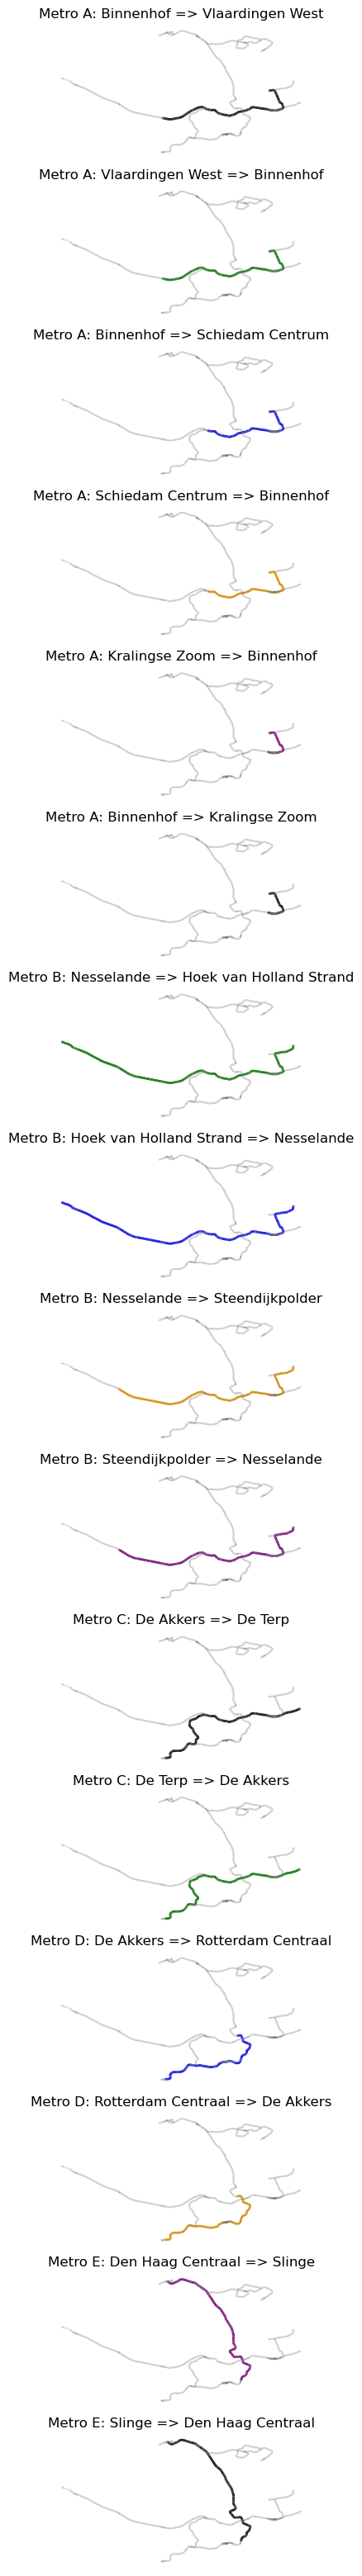

In [9]:
sub_order_route_dict, sub_shortest_path_pairs, sub_shortest_path_edges, sub_edges = metro(sub_stations, edges, nodes, sub_routes, city='Rotterdam')

In [10]:
sub_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,6305896,"LINESTRING (4.5164659 52.0638003, 4.5158864 52...",light_rail,None,0,0,1,56.959307,0.002278,56,"(0, 1)","(1, 0)"
1,6305933,"LINESTRING (4.403601 52.0622859, 4.4037107 52....",light_rail,None,1,2,3,417.845193,0.016714,417,"(2, 3)","(3, 2)"
2,6307148,"LINESTRING (4.3767271 51.9129032, 4.3777532 51...",subway,None,2,4,1273,621.092211,0.024844,621,"(4, 1273)","(1273, 4)"
3,6307148,"LINESTRING (4.384684 51.9155218, 4.3847438 51....",subway,None,3,1273,5,918.756300,0.036750,918,"(1273, 5)","(5, 1273)"
4,6307235,"LINESTRING (4.371436 51.9054786, 4.3714573 51....",subway,None,4,6,832,14.645059,0.000586,14,"(6, 832)","(832, 6)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1162431256,"LINESTRING (4.440498 52.015125, 4.4403605 52.0...",light_rail,None,1574,1265,1304,651.898528,0.026076,651,"(1265, 1304)","(1304, 1265)"
1575,1162431256,"LINESTRING (4.4369993 52.0205733, 4.4367535 52...",light_rail,None,1575,1304,435,236.651906,0.009466,236,"(1304, 435)","(435, 1304)"
1576,1162431257,"LINESTRING (4.4404337 52.0151102, 4.4404524 52...",light_rail,None,1576,1252,1266,3.523553,0.000141,3,"(1252, 1266)","(1266, 1252)"
1577,1162431262,"LINESTRING (4.4405164 52.0150958, 4.440498 52....",light_rail,None,1577,1253,1265,3.484981,0.000139,3,"(1253, 1265)","(1265, 1253)"


In [11]:
sub_shortest_path_edges

{'Metro A: Binnenhof => Vlaardingen West':         osm_id                                           geometry     railway  \
 0    459077281  LINESTRING (4.3435659 51.9031818, 4.3433886 51...  light_rail   
 1    459077281  LINESTRING (4.3390156 51.9022441, 4.3381403 51...  light_rail   
 2    662480800  LINESTRING (4.3187193 51.9031456, 4.3173213 51...  light_rail   
 3    663473523  LINESTRING (4.3208563 51.9027244, 4.3187193 51...  light_rail   
 4    663473525  LINESTRING (4.3150875 51.9038216, 4.3157774 51...  light_rail   
 ..         ...                                                ...         ...   
 104  687533232  LINESTRING (4.5474841 51.9608884, 4.547574 51....  light_rail   
 105  687533233  LINESTRING (4.5472086 51.9610784, 4.5473829 51...  light_rail   
 106  207627814  LINESTRING (4.5356879 51.9602878, 4.5362277 51...  light_rail   
 107  493956404  LINESTRING (4.5390861 51.9608809, 4.5393034 51...  light_rail   
 108  687533230  LINESTRING (4.5372953 51.9605876, 4.539

## Add columns to nodes

In [12]:
selected_routes = ['Metro A: Binnenhof => Vlaardingen West','Metro A: Vlaardingen West => Binnenhof','Metro B: Nesselande => Hoek van Holland Strand','Metro B: Hoek van Holland Strand => Nesselande','Metro C: De Akkers => De Terp','Metro C: De Terp => De Akkers','Metro D: De Akkers => Rotterdam Centraal','Metro D: Rotterdam Centraal => De Akkers','Metro E: Den Haag Centraal => Slinge','Metro E: Slinge => Den Haag Centraal']

In [13]:
sub_order_route_dict = {key: sub_order_route_dict[key] for key in selected_routes}
sub_order_route_dict

{'Metro A: Binnenhof => Vlaardingen West':     id                 name                      geometry     geo_x      geo_y
 0   47     Vlaardingen West  POINT (4.3150875 51.9038216)  4.315087  51.903822
 1    0  Vlaardingen Centrum  POINT (4.3435659 51.9031818)  4.343566  51.903182
 2    1     Vlaardingen Oost  POINT (4.3615059 51.9101388)  4.361506  51.910139
 3   22   Schiedam Nieuwland  POINT (4.3831887 51.9226748)  4.383189  51.922675
 4   16     Schiedam Centrum  POINT (4.4086615 51.9217737)  4.408662  51.921774
 5   45         Marconiplein  POINT (4.4328269 51.9132807)  4.432827  51.913281
 6   44           Delfshaven  POINT (4.4457184 51.9099984)  4.445718  51.909998
 7   43            Coolhaven  POINT (4.4582471 51.9095462)  4.458247  51.909546
 8   18             Dijkzigt  POINT (4.4660974 51.9122493)  4.466097  51.912249
 9   17      Eendrachtsplein  POINT (4.4737244 51.9163496)  4.473724   51.91635
 10   7                Beurs  POINT (4.4803692 51.9178996)  4.480369    51.917

In [14]:
sub_routes = sub_routes[sub_routes['name'].isin(selected_routes)].reset_index(drop=True)

In [15]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [16]:
sub_order_route_dict

{'Metro A: Binnenhof => Vlaardingen West':     id                 name                      geometry     geo_x  \
 0   47     Vlaardingen West  POINT (4.3150875 51.9038216)  4.315087   
 1    0  Vlaardingen Centrum  POINT (4.3435659 51.9031818)  4.343566   
 2    1     Vlaardingen Oost  POINT (4.3615059 51.9101388)  4.361506   
 3   22   Schiedam Nieuwland  POINT (4.3831887 51.9226748)  4.383189   
 4   16     Schiedam Centrum  POINT (4.4086615 51.9217737)  4.408662   
 5   45         Marconiplein  POINT (4.4328269 51.9132807)  4.432827   
 6   44           Delfshaven  POINT (4.4457184 51.9099984)  4.445718   
 7   43            Coolhaven  POINT (4.4582471 51.9095462)  4.458247   
 8   18             Dijkzigt  POINT (4.4660974 51.9122493)  4.466097   
 9   17      Eendrachtsplein  POINT (4.4737244 51.9163496)  4.473724   
 10   7                Beurs  POINT (4.4803692 51.9178996)  4.480369   
 11   2                Blaak  POINT (4.4890906 51.9200477)  4.489091   
 12   5            Oos

In [17]:
sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, nodes)

In [18]:
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.31509 51.90382),2,1108,Vlaardingen West,4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
1,POINT (4.34357 51.90318),2,1280,Vlaardingen Centrum,4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
2,POINT (4.36151 51.91014),2,1281,Vlaardingen Oost,4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
3,POINT (4.38319 51.92267),2,966,Schiedam Nieuwland,4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
4,POINT (4.40866 51.92177),2,670,Schiedam Centrum,4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C","A, B, C"
...,...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.46087 51.97540),2,1308,Rodenrijs,4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E,None
147,POINT (4.46225 51.95589),2,1300,Meijersplein / Airport,4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E,None
148,POINT (4.46448 51.94870),2,1375,Melanchthonweg,4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E,None
149,POINT (4.45826 51.93064),2,1299,Blijdorp,4.458260,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E,None


In [19]:
# sub_new_nodes.to_excel('./sub_new_nodes911_0.xlsx',header = True, index = False)

### retrive all transfer stations on each route

In [20]:
sub_transfer_stations_df = all_transfer_stations_df(sub_new_nodes)

In [21]:
len(sub_transfer_stations_df)

36

## Add columns to edges

In [26]:
sub_shortest_path_edges = {key: sub_shortest_path_edges[key] for key in selected_routes}

In [27]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [28]:
sub_shortest_path_edges

{'Metro A: Binnenhof => Vlaardingen West':         osm_id                                           geometry     railway  \
 0    459077281  LINESTRING (4.3435659 51.9031818, 4.3433886 51...  light_rail   
 1    459077281  LINESTRING (4.3390156 51.9022441, 4.3381403 51...  light_rail   
 2    662480800  LINESTRING (4.3187193 51.9031456, 4.3173213 51...  light_rail   
 3    663473523  LINESTRING (4.3208563 51.9027244, 4.3187193 51...  light_rail   
 4    663473525  LINESTRING (4.3150875 51.9038216, 4.3157774 51...  light_rail   
 ..         ...                                                ...         ...   
 104  687533232  LINESTRING (4.5474841 51.9608884, 4.547574 51....  light_rail   
 105  687533233  LINESTRING (4.5472086 51.9610784, 4.5473829 51...  light_rail   
 106  207627814  LINESTRING (4.5356879 51.9602878, 4.5362277 51...  light_rail   
 107  493956404  LINESTRING (4.5390861 51.9608809, 4.5393034 51...  light_rail   
 108  687533230  LINESTRING (4.5372953 51.9605876, 4.539

In [29]:
sub_new_edges = add_columns_to_edges(sub_shortest_path_edges,edges)

In [30]:
sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,6305896,"LINESTRING (4.5164659 52.0638003, 4.5158864 52...",light_rail,None,0,0,1,56.959307,0.002278,56,"(0, 1)","(1, 0)",NaN,NaN,NaN,NaN
1,6305933,"LINESTRING (4.403601 52.0622859, 4.4037107 52....",light_rail,None,1,2,3,417.845193,0.016714,417,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN
2,6307148,"LINESTRING (4.3767271 51.9129032, 4.3777532 51...",subway,None,2,4,1273,621.092211,0.024844,621,"(4, 1273)","(1273, 4)",1.0,Metro C: De Akkers => De Terp,subway,C
3,6307148,"LINESTRING (4.384684 51.9155218, 4.3847438 51....",subway,None,3,1273,5,918.756300,0.036750,918,"(1273, 5)","(5, 1273)",1.0,Metro C: De Akkers => De Terp,subway,C
4,6307235,"LINESTRING (4.371436 51.9054786, 4.3714573 51....",subway,None,4,6,832,14.645059,0.000586,14,"(6, 832)","(832, 6)",1.0,Metro C: De Akkers => De Terp,subway,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1162431256,"LINESTRING (4.440498 52.015125, 4.4403605 52.0...",light_rail,None,1574,1265,1304,651.898528,0.026076,651,"(1265, 1304)","(1304, 1265)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
1575,1162431256,"LINESTRING (4.4369993 52.0205733, 4.4367535 52...",light_rail,None,1575,1304,435,236.651906,0.009466,236,"(1304, 435)","(435, 1304)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
1576,1162431257,"LINESTRING (4.4404337 52.0151102, 4.4404524 52...",light_rail,None,1576,1252,1266,3.523553,0.000141,3,"(1252, 1266)","(1266, 1252)",1.0,Metro E: Den Haag Centraal => Slinge,subway,E
1577,1162431262,"LINESTRING (4.4405164 52.0150958, 4.440498 52....",light_rail,None,1577,1253,1265,3.484981,0.000139,3,"(1253, 1265)","(1265, 1253)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E


In [31]:
# sub_new_edges.to_excel('./sub_new_edges911_0.xlsx',header = True, index = False)

## Test 7: Rotterdam 7 -- s-no transfer, e-transfer, s_e has one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [32]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.602771960190587, 
    's_coordinates_y': 51.936118474530275, 
    'e_coordinates_x': 4.33667503836683, 
    'e_coordinates_y': 51.84682635134946
} 

In [33]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, sub_new_nodes)

In [34]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
69,POINT (4.60066 51.93601),2,820,De Terp,4.600662,51.936006,"(4.600662, 51.9360063)",Metro C: De Akkers => De Terp,subway,C,None


In [35]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
80,POINT (4.33448 51.84654),2,1267,Spijkenisse Centrum,4.334481,51.846537,"(4.3344807, 51.8465371)",Metro C: De Akkers => De Terp,subway,"C, D","C, D"


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [36]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [37]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of e_on_route is the same as s_on_route 

The next step is to find the same route----using function 's_e_same_routes'


### Find those same routes

In [38]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0   C



,ref
0,C


### Get all stations between s_e nodes and transfer nodes

In [39]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,sub_routes,start_node,end_node,sub_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                 name                      geometry     geo_x  \
 0   21              De Terp   POINT (4.600662 51.9360063)  4.600662   
 1   19      Capelle Centrum  POINT (4.5895721 51.9313618)  4.589572   
 2   22             Slotlaan  POINT (4.5783313 51.9284615)  4.578331   
 3   20          Capelsebrug  POINT (4.5580666 51.9213386)  4.558067   
 4   15       Kralingse Zoom  POINT (4.5333209 51.9215215)  4.533321   
 5   17      Voorschoterlaan  POINT (4.5130469 51.9249857)  4.513047   
 6   14          Gerdesiaweg   POINT (4.5058468 51.925888)  4.505847   
 7   16            Oostplein  POINT (4.4970223 51.9233516)  4.497022   
 8   24                Blaak  POINT (4.4888603 51.9197652)   4.48886   
 9   18                Beurs  POINT (4.4803884 51.9178668)  4.480388   
 10   6      Eendrachtsplein  POINT (4.4737535 51.9163189)  4.473753   
 11   7             Dijkzigt  POINT (4.4661327 51.9122274)  4.466133   
 12  11            Coolhaven  POINT (4.4583154 51.9094164)  4.45

In [40]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                 name                      geometry     geo_x  \
 0   21              De Terp   POINT (4.600662 51.9360063)  4.600662   
 1   19      Capelle Centrum  POINT (4.5895721 51.9313618)  4.589572   
 2   22             Slotlaan  POINT (4.5783313 51.9284615)  4.578331   
 3   20          Capelsebrug  POINT (4.5580666 51.9213386)  4.558067   
 4   15       Kralingse Zoom  POINT (4.5333209 51.9215215)  4.533321   
 5   17      Voorschoterlaan  POINT (4.5130469 51.9249857)  4.513047   
 6   14          Gerdesiaweg   POINT (4.5058468 51.925888)  4.505847   
 7   16            Oostplein  POINT (4.4970223 51.9233516)  4.497022   
 8   24                Blaak  POINT (4.4888603 51.9197652)   4.48886   
 9   18                Beurs  POINT (4.4803884 51.9178668)  4.480388   
 10   6      Eendrachtsplein  POINT (4.4737535 51.9163189)  4.473753   
 11   7             Dijkzigt  POINT (4.4661327 51.9122274)  4.466133   
 12  11            Coolhaven  POINT (4.4583154 51.9094164)  4.45

### Get all nodes and id_pairs of nodes between s_e nodes

In [41]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,sub_new_nodes)
btw_all_id_pairs_list

[    s_id  e_id
 0   1335   512
 1    512  1323
 2   1323  1313
 3   1313  1319
 4   1319  1363
 5   1363  1327
 6   1327  1275
 7   1275  1276
 8   1276  1285
 9   1285  1286
 10  1286  1287
 11  1287   820
 12   820  1333
 13  1333  1346
 14  1346  1356
 15  1356     5
 16     5  1273
 17  1273  1271
 18  1271   135
 19   135  1283
 20  1283  1376
 21  1376  1277
 22  1277  1267]

### Calculate shortest path and plot

In [42]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [43]:
btw_all_id_pairs_list_unique

[    s_id  e_id
 0   1335   512
 1    512  1323
 2   1323  1313
 3   1313  1319
 4   1319  1363
 5   1363  1327
 6   1327  1275
 7   1275  1276
 8   1276  1285
 9   1285  1286
 10  1286  1287
 11  1287   820
 12   820  1333
 13  1333  1346
 14  1346  1356
 15  1356     5
 16     5  1273
 17  1273  1271
 18  1271   135
 19   135  1283
 20  1283  1376
 21  1376  1277
 22  1277  1267]

In [44]:
G = create_ground_graph(edges, nodes)

In [45]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [46]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
550,207219684,"LINESTRING (4.5333209 51.9215215, 4.534672 51....",subway,None,550,512,627,221.952253,0.008878,221,"(512, 627)","(627, 512)"
551,207219684,"LINESTRING (4.5363149 51.9207772, 4.5364716 51...",subway,None,551,627,628,97.496193,0.003900,97,"(627, 628)","(628, 627)"
552,207219684,"LINESTRING (4.5376243 51.9204436, 4.5383592 51...",subway,None,552,628,515,54.442943,0.002178,54,"(628, 515)","(515, 628)"
553,207219684,"LINESTRING (4.5383592 51.9202618, 4.5387447 51...",subway,None,553,515,1335,1408.689076,0.056348,1408,"(515, 1335)","(1335, 515)"
543,207219681,"LINESTRING (4.5147559 51.9246525, 4.5148953 51...",subway,None,543,507,521,1181.562805,0.047263,1181,"(507, 521)","(521, 507)"
...,...,...,...,...,...,...,...,...,...,...,...,...
53,6308036,"LINESTRING (4.3344807 51.8465371, 4.3348537 51...",subway,None,53,1267,51,46.498587,0.001860,46,"(1267, 51)","(51, 1267)"
54,6308045,"LINESTRING (4.3348537 51.8468855, 4.3350113 51...",subway,None,54,51,52,623.903970,0.024956,623,"(51, 52)","(52, 51)"
98,130805607,"LINESTRING (4.3431757 51.8482677, 4.3448254 51...",subway,None,98,52,120,113.649627,0.004546,113,"(52, 120)","(120, 52)"
99,130805607,"LINESTRING (4.3448254 51.8482743, 4.3460374 51...",subway,None,99,120,49,83.495971,0.003340,83,"(120, 49)","(49, 120)"


In [47]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [48]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,207219684,"LINESTRING (4.5333209 51.9215215, 4.534672 51....",subway,None,550,512,627,221.952253,0.008878,221,"(512, 627)","(627, 512)",3.0
1,207219684,"LINESTRING (4.5363149 51.9207772, 4.5364716 51...",subway,None,551,627,628,97.496193,0.003900,97,"(627, 628)","(628, 627)",1.0
2,207219684,"LINESTRING (4.5376243 51.9204436, 4.5383592 51...",subway,None,552,628,515,54.442943,0.002178,54,"(628, 515)","(515, 628)",1.0
3,207219684,"LINESTRING (4.5383592 51.9202618, 4.5387447 51...",subway,None,553,515,1335,1408.689076,0.056348,1408,"(515, 1335)","(1335, 515)",1.0
4,207219681,"LINESTRING (4.5147559 51.9246525, 4.5148953 51...",subway,None,543,507,521,1181.562805,0.047263,1181,"(507, 521)","(521, 507)",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,6308036,"LINESTRING (4.3344807 51.8465371, 4.3348537 51...",subway,None,53,1267,51,46.498587,0.001860,46,"(1267, 51)","(51, 1267)",1.0
233,6308045,"LINESTRING (4.3348537 51.8468855, 4.3350113 51...",subway,None,54,51,52,623.903970,0.024956,623,"(51, 52)","(52, 51)",1.0
234,130805607,"LINESTRING (4.3431757 51.8482677, 4.3448254 51...",subway,None,98,52,120,113.649627,0.004546,113,"(52, 120)","(120, 52)",1.0
235,130805607,"LINESTRING (4.3448254 51.8482743, 4.3460374 51...",subway,None,99,120,49,83.495971,0.003340,83,"(120, 49)","(49, 120)",1.0


In [49]:
shortest_path_edges_way.time.sum()

2.0467668221769397

<Axes: >

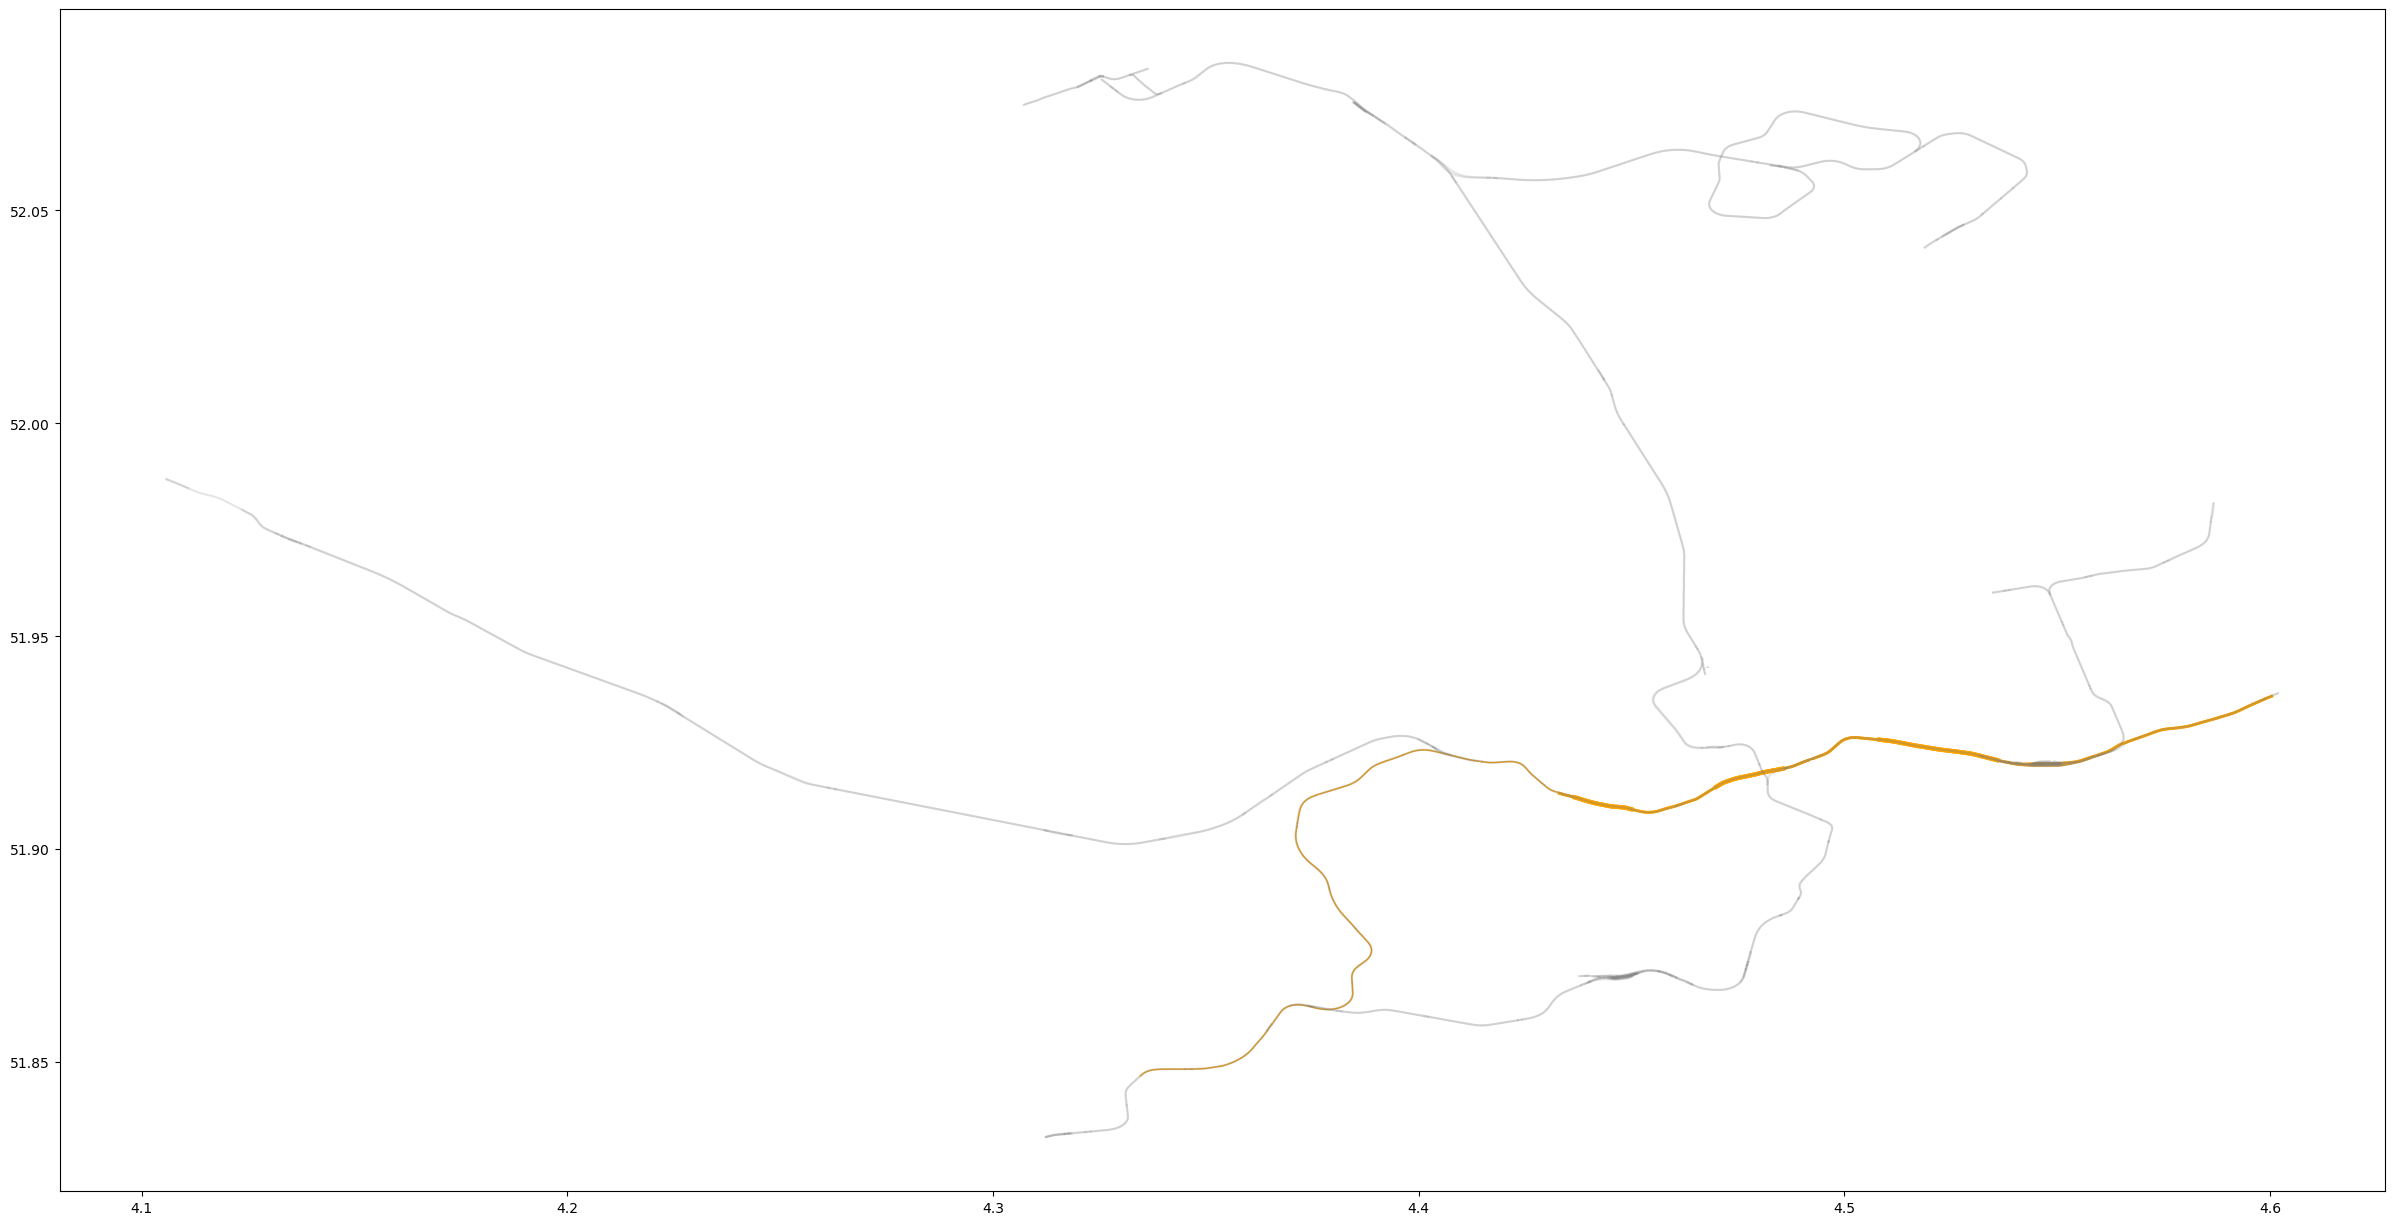

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 6: Rotterdam 6 -- s-no transfer, e-no transfer, s_e on one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [32]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.602771960190587, 
    's_coordinates_y': 51.936118474530275, 
    'e_coordinates_x': 4.384152022483966, 
    'e_coordinates_y': 51.88606794109593
} 

In [33]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, sub_new_nodes)

In [34]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
69,POINT (4.60066 51.93601),2,820,De Terp,4.600662,51.936006,"(4.600662, 51.9360063)",Metro C: De Akkers => De Terp,subway,C,None


In [35]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
76,POINT (4.38189 51.88497),2,135,Pernis,4.381892,51.884971,"(4.3818923, 51.8849705)",Metro C: De Akkers => De Terp,subway,C,None


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [36]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [37]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

s_node and e_node are on one same route 

The next step is to find the same route----using function 's_e_same_routes'


### Find those same routes

In [38]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0   C



,ref
0,C


### Get all stations between s_e nodes and transfer nodes

In [39]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,sub_routes,start_node,end_node,sub_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                 name                      geometry     geo_x  \
 0   21              De Terp   POINT (4.600662 51.9360063)  4.600662   
 1   19      Capelle Centrum  POINT (4.5895721 51.9313618)  4.589572   
 2   22             Slotlaan  POINT (4.5783313 51.9284615)  4.578331   
 3   20          Capelsebrug  POINT (4.5580666 51.9213386)  4.558067   
 4   15       Kralingse Zoom  POINT (4.5333209 51.9215215)  4.533321   
 5   17      Voorschoterlaan  POINT (4.5130469 51.9249857)  4.513047   
 6   14          Gerdesiaweg   POINT (4.5058468 51.925888)  4.505847   
 7   16            Oostplein  POINT (4.4970223 51.9233516)  4.497022   
 8   24                Blaak  POINT (4.4888603 51.9197652)   4.48886   
 9   18                Beurs  POINT (4.4803884 51.9178668)  4.480388   
 10   6      Eendrachtsplein  POINT (4.4737535 51.9163189)  4.473753   
 11   7             Dijkzigt  POINT (4.4661327 51.9122274)  4.466133   
 12  11            Coolhaven  POINT (4.4583154 51.9094164)  4.45

In [40]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id              name                      geometry     geo_x      geo_y  \
 0   21           De Terp   POINT (4.600662 51.9360063)  4.600662  51.936006   
 1   19   Capelle Centrum  POINT (4.5895721 51.9313618)  4.589572  51.931362   
 2   22          Slotlaan  POINT (4.5783313 51.9284615)  4.578331  51.928461   
 3   20       Capelsebrug  POINT (4.5580666 51.9213386)  4.558067  51.921339   
 4   15    Kralingse Zoom  POINT (4.5333209 51.9215215)  4.533321  51.921521   
 5   17   Voorschoterlaan  POINT (4.5130469 51.9249857)  4.513047  51.924986   
 6   14       Gerdesiaweg   POINT (4.5058468 51.925888)  4.505847  51.925888   
 7   16         Oostplein  POINT (4.4970223 51.9233516)  4.497022  51.923352   
 8   24             Blaak  POINT (4.4888603 51.9197652)   4.48886  51.919765   
 9   18             Beurs  POINT (4.4803884 51.9178668)  4.480388  51.917867   
 10   6   Eendrachtsplein  POINT (4.4737535 51.9163189)  4.473753  51.916319   
 11   7          Dijkzigt  POINT (4.4661

### Get all nodes and id_pairs of nodes between s_e nodes

In [41]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,sub_new_nodes)
btw_all_id_pairs_list

[    s_id  e_id
 0   1335   512
 1    512  1323
 2   1323  1313
 3   1313  1319
 4   1319  1363
 5   1363  1327
 6   1327  1275
 7   1275  1276
 8   1276  1285
 9   1285  1286
 10  1286  1287
 11  1287   820
 12   820  1333
 13  1333  1346
 14  1346  1356
 15  1356     5
 16     5  1273
 17  1273  1271
 18  1271   135]

### Calculate shortest path and plot

In [42]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [43]:
btw_all_id_pairs_list_unique

[    s_id  e_id
 0   1335   512
 1    512  1323
 2   1323  1313
 3   1313  1319
 4   1319  1363
 5   1363  1327
 6   1327  1275
 7   1275  1276
 8   1276  1285
 9   1285  1286
 10  1286  1287
 11  1287   820
 12   820  1333
 13  1333  1346
 14  1346  1356
 15  1356     5
 16     5  1273
 17  1273  1271
 18  1271   135]

In [44]:
G = create_ground_graph(edges, nodes)

In [45]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [46]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
550,207219684,"LINESTRING (4.5333209 51.9215215, 4.534672 51....",subway,None,550,512,627,221.952253,0.008878,221,"(512, 627)","(627, 512)"
551,207219684,"LINESTRING (4.5363149 51.9207772, 4.5364716 51...",subway,None,551,627,628,97.496193,0.003900,97,"(627, 628)","(628, 627)"
552,207219684,"LINESTRING (4.5376243 51.9204436, 4.5383592 51...",subway,None,552,628,515,54.442943,0.002178,54,"(628, 515)","(515, 628)"
553,207219684,"LINESTRING (4.5383592 51.9202618, 4.5387447 51...",subway,None,553,515,1335,1408.689076,0.056348,1408,"(515, 1335)","(1335, 515)"
543,207219681,"LINESTRING (4.5147559 51.9246525, 4.5148953 51...",subway,None,543,507,521,1181.562805,0.047263,1181,"(507, 521)","(521, 507)"
...,...,...,...,...,...,...,...,...,...,...,...,...
891,283376821,"LINESTRING (4.3790996 51.8902959, 4.3790339 51...",subway,None,891,825,827,92.172505,0.003687,92,"(825, 827)","(827, 825)"
892,283376821,"LINESTRING (4.3788899 51.8911143, 4.378705 51....",subway,None,892,827,57,354.072132,0.014163,354,"(827, 57)","(57, 827)"
1328,677013447,"LINESTRING (4.3818923 51.8849705, 4.3818012 51...",subway,None,1328,135,822,97.574039,0.003903,97,"(135, 822)","(822, 135)"
1344,686854524,"LINESTRING (4.3715797 51.9064563, 4.3716456 51...",subway,None,1344,7,195,46.306429,0.001852,46,"(7, 195)","(195, 7)"


In [47]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [48]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,207219684,"LINESTRING (4.5333209 51.9215215, 4.534672 51....",subway,None,550,512,627,221.952253,0.008878,221,"(512, 627)","(627, 512)",3.0
1,207219684,"LINESTRING (4.5363149 51.9207772, 4.5364716 51...",subway,None,551,627,628,97.496193,0.003900,97,"(627, 628)","(628, 627)",1.0
2,207219684,"LINESTRING (4.5376243 51.9204436, 4.5383592 51...",subway,None,552,628,515,54.442943,0.002178,54,"(628, 515)","(515, 628)",1.0
3,207219684,"LINESTRING (4.5383592 51.9202618, 4.5387447 51...",subway,None,553,515,1335,1408.689076,0.056348,1408,"(515, 1335)","(1335, 515)",1.0
4,207219681,"LINESTRING (4.5147559 51.9246525, 4.5148953 51...",subway,None,543,507,521,1181.562805,0.047263,1181,"(507, 521)","(521, 507)",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,283376821,"LINESTRING (4.3790996 51.8902959, 4.3790339 51...",subway,None,891,825,827,92.172505,0.003687,92,"(825, 827)","(827, 825)",1.0
207,283376821,"LINESTRING (4.3788899 51.8911143, 4.378705 51....",subway,None,892,827,57,354.072132,0.014163,354,"(827, 57)","(57, 827)",1.0
208,677013447,"LINESTRING (4.3818923 51.8849705, 4.3818012 51...",subway,None,1328,135,822,97.574039,0.003903,97,"(135, 822)","(822, 135)",1.0
209,686854524,"LINESTRING (4.3715797 51.9064563, 4.3716456 51...",subway,None,1344,7,195,46.306429,0.001852,46,"(7, 195)","(195, 7)",1.0


In [49]:
shortest_path_edges_way.time.sum()

1.7676539685862636

<Axes: >

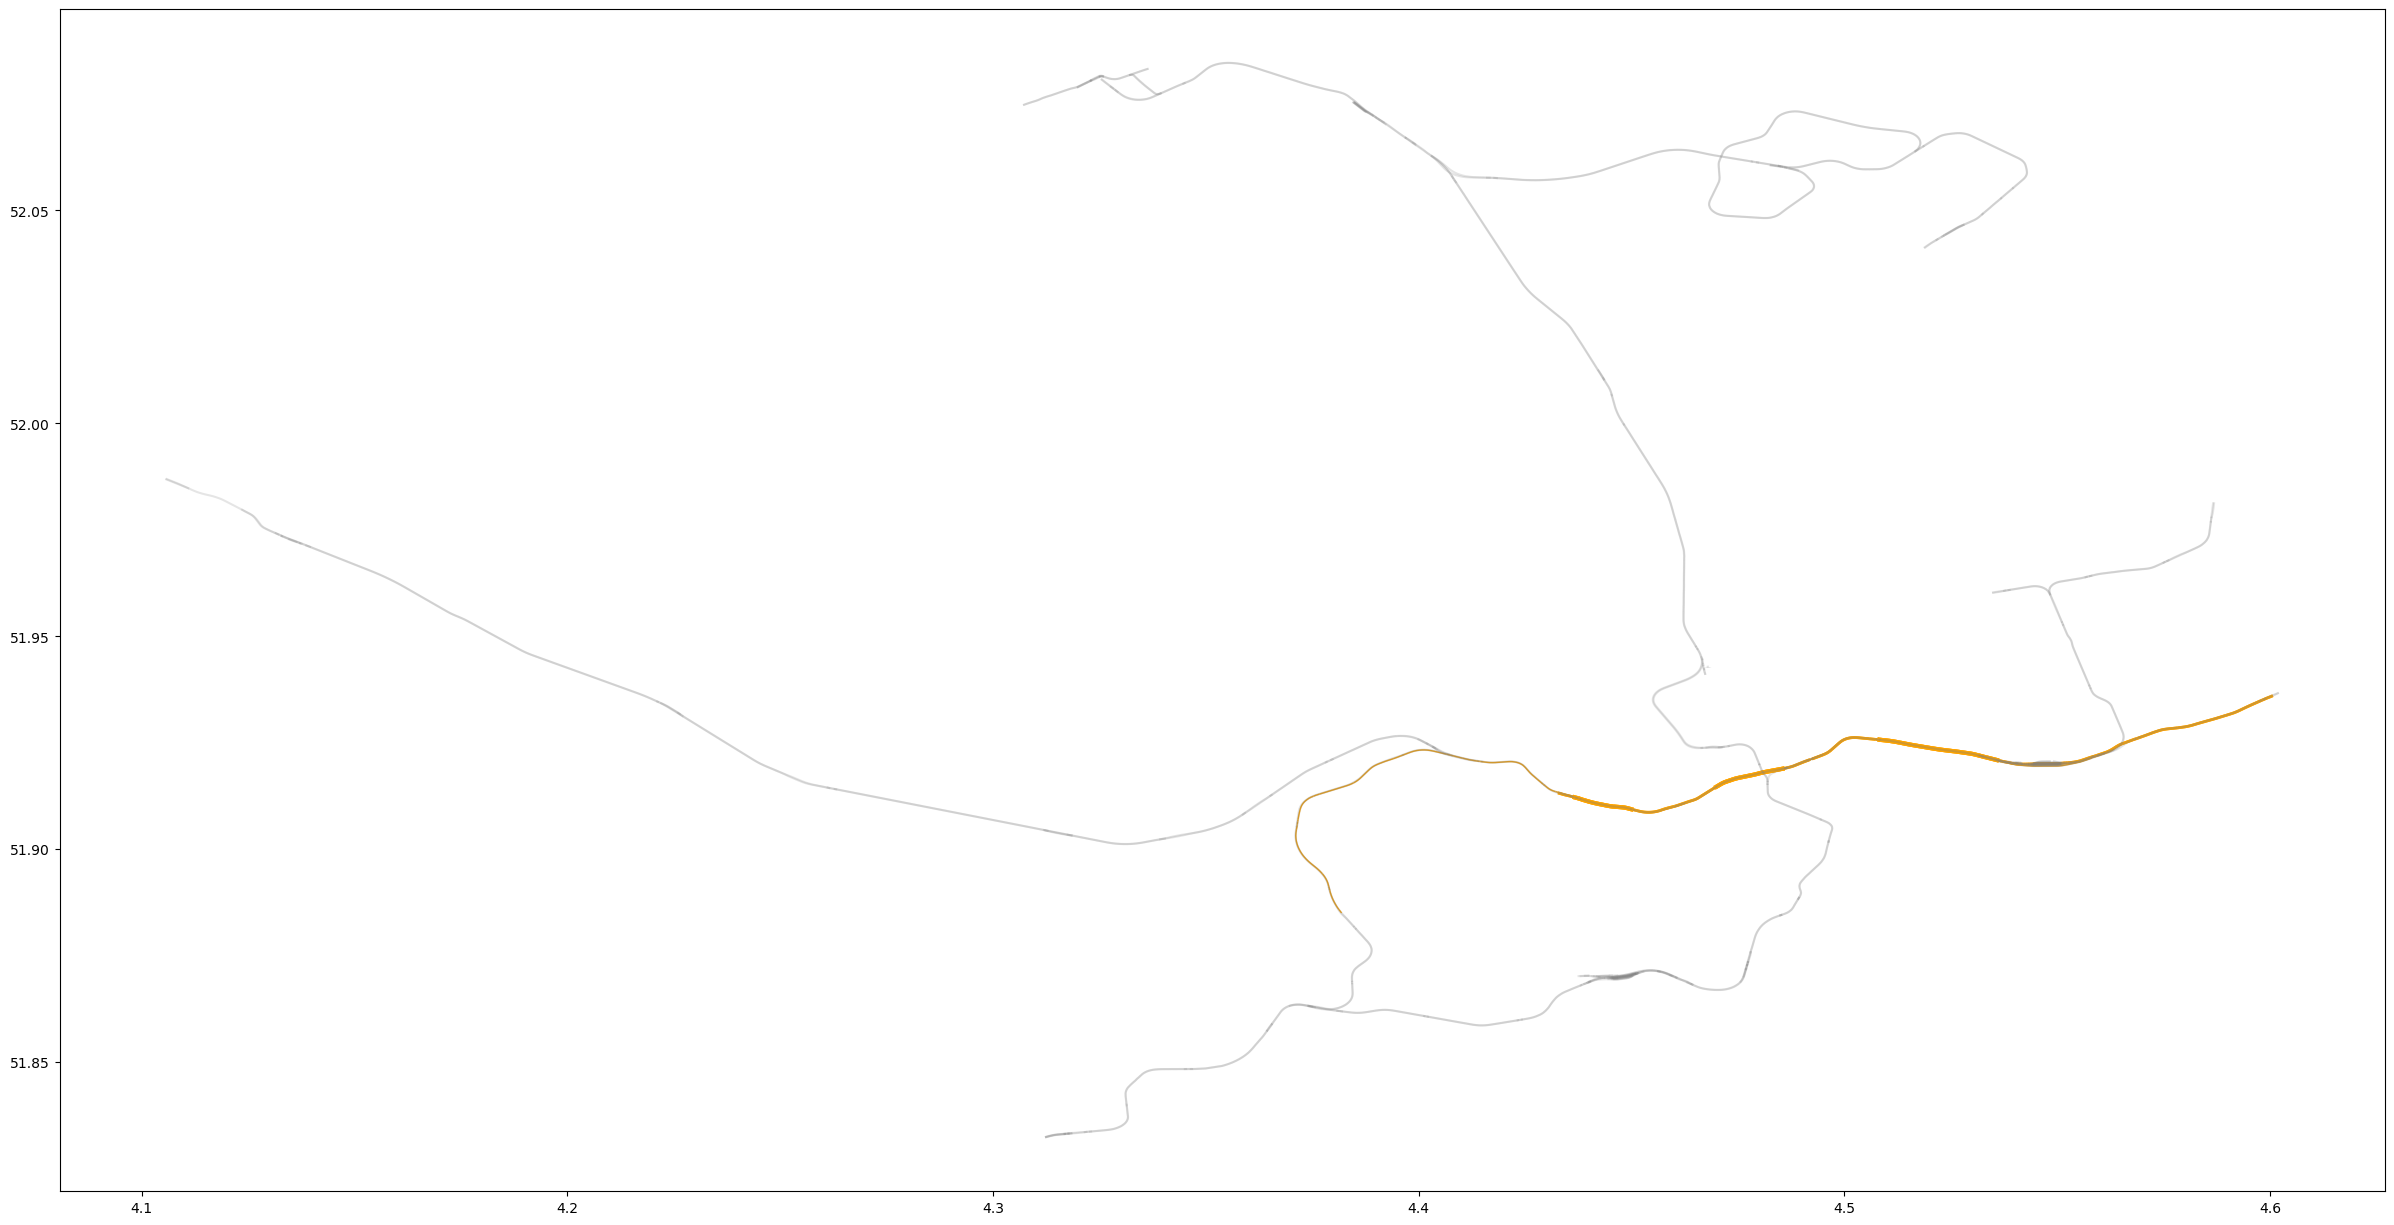

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 1: Rotterdam1 -- s-transfer, e-transfer, s_e on totally 2 same routes 

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [32]:
# donnot need to transfer and has two ways D,E
s_e_coordinates_t1 = {
    's_coordinates_x': 4.4746473, 
    's_coordinates_y': 51.9234388, 
    'e_coordinates_x': 4.4817401, 
    'e_coordinates_y': 51.9129404
} 

In [33]:
# start_node, end_node = s_e_node_df(s_e_coordinates_t1, sub_new_nodes_df)
start_node, end_node = s_e_node_df(s_e_coordinates_t1, sub_new_nodes)

In [34]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
119,POINT (4.47849 51.92323),2,1321,Stadhuis,4.478493,51.923227,"(4.4784926, 51.9232269)",Metro D: Rotterdam Centraal => De Akkers,subway,"D, E","D, E"


In [35]:
end_node 

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
117,POINT (4.48196 51.91403),2,1318,Leuvehaven,4.481963,51.914034,"(4.4819628, 51.914034)",Metro D: Rotterdam Centraal => De Akkers,subway,"D, E","D, E"


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [36]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [37]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

s_node and e_node are on several same routes 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [38]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on one same route:  ref
0   D
1   E



,ref
0,D
1,E


### Get all stations between s_e nodes and transfer nodes

In [39]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,sub_routes,start_node,end_node,sub_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                 name                      geometry     geo_x  \
 0   26            De Akkers  POINT (4.3198935 51.8333889)  4.319894   
 1   10         Heemraadlaan  POINT (4.3315954 51.8377527)  4.331595   
 2    8  Spijkenisse Centrum  POINT (4.3344414 51.8465547)  4.334441   
 3   11            Zalmplaat  POINT (4.3625755 51.8550454)  4.362576   
 4   16            Hoogvliet  POINT (4.3667549 51.8606237)  4.366755   
 5   14          Tussenwater  POINT (4.3768005 51.8626434)    4.3768   
 6   13           Poortugaal  POINT (4.3958008 51.8617402)  4.395801   
 7   12                Rhoon  POINT (4.4194841 51.8591504)  4.419484   
 8   15               Slinge  POINT (4.4776045 51.8745996)  4.477604   
 9    0            Zuidplein        POINT (4.4883 51.8869)    4.4883   
 10   1            Maashaven  POINT (4.4947288 51.8971985)  4.494729   
 11   2            Rijnhaven  POINT (4.4967671 51.9035882)  4.496767   
 12   6      Wilhelminaplein  POINT (4.4925598 51.9077135)   4.4

In [40]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[   id        name                      geometry     geo_x      geo_y  \
 15  5    Stadhuis  POINT (4.4784926 51.9232269)  4.478493  51.923227   
 14  7       Beurs  POINT (4.4803477 51.9190178)  4.480348  51.919018   
 13  4  Leuvehaven   POINT (4.4819628 51.914034)  4.481963  51.914034   
 
                              route_name_list ref   route  \
 15  Metro D: Rotterdam Centraal => De Akkers   D  subway   
 14  Metro D: Rotterdam Centraal => De Akkers   D  subway   
 13  Metro D: Rotterdam Centraal => De Akkers   D  subway   
 
            coordinate_value  
 15  (4.4784926, 51.9232269)  
 14  (4.4803477, 51.9190178)  
 13   (4.4819628, 51.914034)  ,
    id        name                      geometry     geo_x      geo_y  \
 7  16    Stadhuis  POINT (4.4784926 51.9232269)  4.478493  51.923227   
 6  18       Beurs  POINT (4.4803477 51.9190178)  4.480348  51.919018   
 5  15  Leuvehaven   POINT (4.4819628 51.914034)  4.481963  51.914034   
 
                         route_name_list 

### Get all nodes and id_pairs of nodes between s_e nodes

In [41]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,sub_new_nodes)
btw_all_id_pairs_list

[   s_id  e_id
 0  1318  1329
 1  1329  1321,
    s_id  e_id
 0  1318  1329
 1  1329  1321]

### Calculate shortest path and plot

In [42]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [43]:
btw_all_id_pairs_list_unique

[   s_id  e_id
 0  1318  1329
 1  1329  1321]

In [44]:
G = create_ground_graph(edges, nodes)

In [45]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [46]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
587,207219699,"LINESTRING (4.48141 51.9172524, 4.4814247 51.9...",subway,None,587,528,545,210.180756,0.008407,210,"(528, 545)","(545, 528)"
588,207219699,"LINESTRING (4.4819176 51.9154099, 4.4819295 51...",subway,None,588,545,543,40.108725,0.001604,40,"(545, 543)","(543, 545)"
589,207219699,"LINESTRING (4.4819295 51.9150494, 4.4819447 51...",subway,None,589,543,1318,112.971672,0.004519,112,"(543, 1318)","(1318, 543)"
605,207219702,"LINESTRING (4.4803477 51.9190178, 4.4805167 51...",subway,None,605,1329,528,210.376344,0.008415,210,"(1329, 528)","(528, 1329)"
602,207219702,"LINESTRING (4.4784926 51.9232269, 4.4785615 51...",subway,None,602,1321,551,367.844297,0.014714,367,"(1321, 551)","(551, 1321)"
603,207219702,"LINESTRING (4.4799283 51.9200466, 4.4800696 51...",subway,None,603,551,549,39.760331,0.001590,39,"(551, 549)","(549, 551)"
604,207219702,"LINESTRING (4.4800696 51.9197, 4.4803477 51.91...",subway,None,604,549,1329,78.258581,0.003130,78,"(549, 1329)","(1329, 549)"


In [47]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [48]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,207219699,"LINESTRING (4.48141 51.9172524, 4.4814247 51.9...",subway,None,587,528,545,210.180756,0.008407,210,"(528, 545)","(545, 528)",1.0
1,207219699,"LINESTRING (4.4819176 51.9154099, 4.4819295 51...",subway,None,588,545,543,40.108725,0.001604,40,"(545, 543)","(543, 545)",1.0
2,207219699,"LINESTRING (4.4819295 51.9150494, 4.4819447 51...",subway,None,589,543,1318,112.971672,0.004519,112,"(543, 1318)","(1318, 543)",1.0
3,207219702,"LINESTRING (4.4803477 51.9190178, 4.4805167 51...",subway,None,605,1329,528,210.376344,0.008415,210,"(1329, 528)","(528, 1329)",1.0
4,207219702,"LINESTRING (4.4784926 51.9232269, 4.4785615 51...",subway,None,602,1321,551,367.844297,0.014714,367,"(1321, 551)","(551, 1321)",1.0
5,207219702,"LINESTRING (4.4799283 51.9200466, 4.4800696 51...",subway,None,603,551,549,39.760331,0.001590,39,"(551, 549)","(549, 551)",1.0
6,207219702,"LINESTRING (4.4800696 51.9197, 4.4803477 51.91...",subway,None,604,549,1329,78.258581,0.003130,78,"(549, 1329)","(1329, 549)",1.0


In [49]:
shortest_path_edges_way.time.sum()

0.04238002830013918

<Axes: >

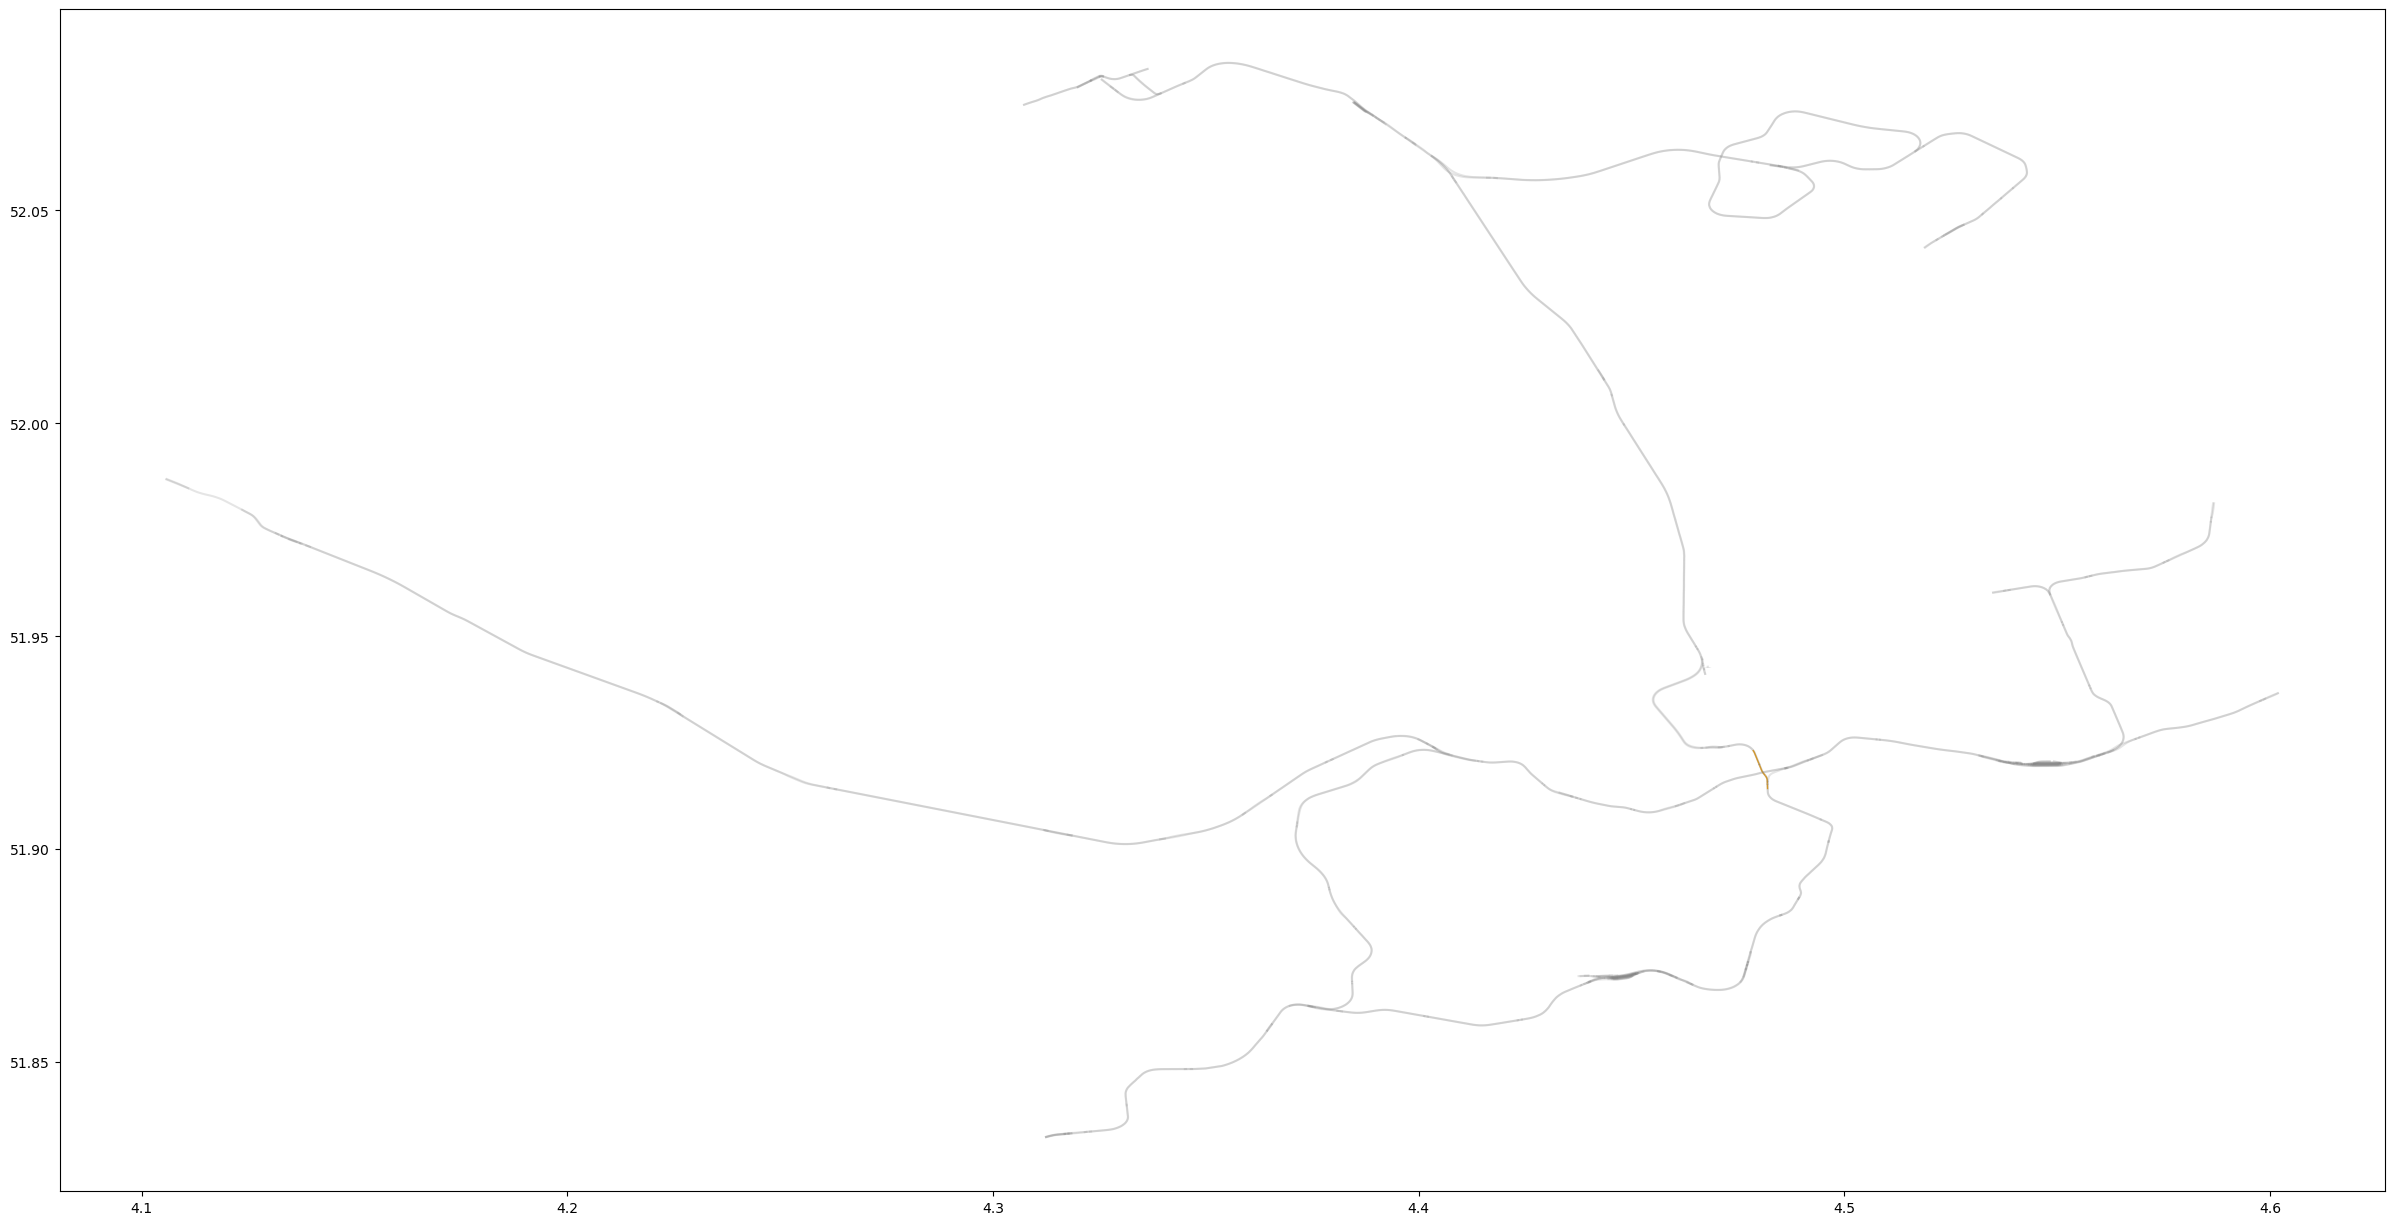

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

### get the nearst stations of s_e nodes  ---  shortest path between s_e nodes

In [33]:
s_node_matched_all_stations_dict = all_stations_on_matched_route(sub_order_route_dict, s_e_nodes_on_route_gdf)
s_node_matched_all_stations_dict

{'Metro D: Rotterdam Centraal => De Akkers':     id                 name                      geometry     geo_x  \
 0   26            De Akkers  POINT (4.3198935 51.8333889)  4.319894   
 1   10         Heemraadlaan  POINT (4.3315954 51.8377527)  4.331595   
 2    8  Spijkenisse Centrum  POINT (4.3344414 51.8465547)  4.334441   
 3   11            Zalmplaat  POINT (4.3625755 51.8550454)  4.362576   
 4   16            Hoogvliet  POINT (4.3667549 51.8606237)  4.366755   
 5   14          Tussenwater  POINT (4.3768005 51.8626434)    4.3768   
 6   13           Poortugaal  POINT (4.3958008 51.8617402)  4.395801   
 7   12                Rhoon  POINT (4.4194841 51.8591504)  4.419484   
 8   15               Slinge  POINT (4.4776045 51.8745996)  4.477604   
 9    0            Zuidplein        POINT (4.4883 51.8869)    4.4883   
 10   1            Maashaven  POINT (4.4947288 51.8971985)  4.494729   
 11   2            Rijnhaven  POINT (4.4967671 51.9035882)  4.496767   
 12   6      Wilhelm

In [34]:
e_node_matched_all_stations_dict = all_stations_on_matched_route(sub_order_route_dict, s_e_nodes_on_route_gdf)
e_node_matched_all_stations_dict

{'Metro D: Rotterdam Centraal => De Akkers':     id                 name                      geometry     geo_x  \
 0   26            De Akkers  POINT (4.3198935 51.8333889)  4.319894   
 1   10         Heemraadlaan  POINT (4.3315954 51.8377527)  4.331595   
 2    8  Spijkenisse Centrum  POINT (4.3344414 51.8465547)  4.334441   
 3   11            Zalmplaat  POINT (4.3625755 51.8550454)  4.362576   
 4   16            Hoogvliet  POINT (4.3667549 51.8606237)  4.366755   
 5   14          Tussenwater  POINT (4.3768005 51.8626434)    4.3768   
 6   13           Poortugaal  POINT (4.3958008 51.8617402)  4.395801   
 7   12                Rhoon  POINT (4.4194841 51.8591504)  4.419484   
 8   15               Slinge  POINT (4.4776045 51.8745996)  4.477604   
 9    0            Zuidplein        POINT (4.4883 51.8869)    4.4883   
 10   1            Maashaven  POINT (4.4947288 51.8971985)  4.494729   
 11   2            Rijnhaven  POINT (4.4967671 51.9035882)  4.496767   
 12   6      Wilhelm

In [35]:
start_node_coordinate = start_node.iloc[0]['coordinate_value']
start_node_coordinate

(4.4784926, 51.9232269)

In [36]:
end_node_coordinate = end_node.iloc[0]['coordinate_value']
end_node_coordinate

(4.4819628, 51.914034)

#### line1_between_s&e

In [37]:
line_name_df = s_e_nodes_on_route_gdf[['name']].reset_index(drop=True)
line_name_df

,name
0,Metro D: Rotterdam Centraal => De Akkers
1,Metro E: Den Haag Centraal => Slinge


In [38]:
line_name_df.iloc[0][0]

'Metro D: Rotterdam Centraal => De Akkers'

In [39]:
s_station_df1 = find_nearest_station(start_node_coordinate, s_node_matched_all_stations_dict[line_name_df.iloc[0][0]])
s_station_df1

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
15,5,Stadhuis,POINT (4.4784926 51.9232269),4.478493,51.923227,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4784926, 51.9232269)"


In [40]:
e_station_df1 = find_nearest_station(end_node_coordinate, e_node_matched_all_stations_dict[line_name_df.iloc[0][0]])
e_station_df1

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
13,4,Leuvehaven,POINT (4.4819628 51.914034),4.481963,51.914034,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4819628, 51.914034)"


In [41]:
# s_station_df1 = find_nearest_station(start_node_coordinate, s_node_matched_all_stations_dict['Metro D: Rotterdam Centraal => De Akkers'])
# s_station_df1
# e_station_df1 = find_nearest_station(end_node_coordinate, e_node_matched_all_stations_dict['Metro D: Rotterdam Centraal => De Akkers'])
# e_station_df1

#### get all stations between s_e stations

In [42]:
all_stations_way1 = s_node_matched_all_stations_dict[line_name_df.iloc[0][0]]

In [43]:
all_stations_way1

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
0,26,De Akkers,POINT (4.3198935 51.8333889),4.319894,51.833389,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3198935, 51.8333889)"
1,10,Heemraadlaan,POINT (4.3315954 51.8377527),4.331595,51.837753,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3315954, 51.8377527)"
2,8,Spijkenisse Centrum,POINT (4.3344414 51.8465547),4.334441,51.846555,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3344414, 51.8465547)"
3,11,Zalmplaat,POINT (4.3625755 51.8550454),4.362576,51.855045,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3625755, 51.8550454)"
4,16,Hoogvliet,POINT (4.3667549 51.8606237),4.366755,51.860624,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3667549, 51.8606237)"
5,14,Tussenwater,POINT (4.3768005 51.8626434),4.3768,51.862643,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3768005, 51.8626434)"
6,13,Poortugaal,POINT (4.3958008 51.8617402),4.395801,51.86174,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3958008, 51.8617402)"
7,12,Rhoon,POINT (4.4194841 51.8591504),4.419484,51.85915,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4194841, 51.8591504)"
8,15,Slinge,POINT (4.4776045 51.8745996),4.477604,51.8746,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4776045, 51.8745996)"
9,0,Zuidplein,POINT (4.4883 51.8869),4.4883,51.8869,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4883, 51.8869)"


In [44]:
s_index1 = s_station_df1.index[0]
e_index1 = e_station_df1.index[0]

In [45]:
s_e_between_stations_way1 = all_stations_way1.iloc[s_index1:e_index1-1:-1]

In [46]:
s_e_between_stations_way1

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
15,5,Stadhuis,POINT (4.4784926 51.9232269),4.478493,51.923227,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4784926, 51.9232269)"
14,7,Beurs,POINT (4.4803477 51.9190178),4.480348,51.919018,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4803477, 51.9190178)"
13,4,Leuvehaven,POINT (4.4819628 51.914034),4.481963,51.914034,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4819628, 51.914034)"


#### get all nodes and id_pairs of nodes between s_e nodes

In [47]:
s_e_between_nodes_way1 = sub_new_nodes.merge(s_e_between_stations_way1, on='coordinate_value', suffixes=('', '_drop'))
s_e_between_nodes_way1

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref,route,transfer,id_drop,name_drop,geometry_drop,geo_x_drop,geo_y_drop,route_name_list_drop,ref_drop,route_drop
0,POINT (4.48196 51.91403),2,1318,"(4.4819628, 51.914034)",Leuvehaven,4.481963,51.914034,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"(D, E)",4,Leuvehaven,POINT (4.4819628 51.914034),4.481963,51.914034,Metro D: Rotterdam Centraal => De Akkers,D,subway
1,POINT (4.47849 51.92323),2,1321,"(4.4784926, 51.9232269)",Stadhuis,4.478493,51.923227,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"(D, E)",5,Stadhuis,POINT (4.4784926 51.9232269),4.478493,51.923227,Metro D: Rotterdam Centraal => De Akkers,D,subway
2,POINT (4.48035 51.91902),2,1329,"(4.4803477, 51.9190178)",Beurs,4.480348,51.919018,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"(D, E)",7,Beurs,POINT (4.4803477 51.9190178),4.480348,51.919018,Metro D: Rotterdam Centraal => De Akkers,D,subway


In [48]:
id_pairs_way1 = pd.DataFrame(columns = ['s_id','e_id'])

for i in range(len(s_e_between_nodes_way1)-1):
    id_pairs_way1.loc[i,'s_id'] = s_e_between_nodes_way1.loc[i,'id']
    id_pairs_way1.loc[i,'e_id'] = s_e_between_nodes_way1.loc[i+1,'id']

id_pairs_way1

,s_id,e_id
0,1318,1321
1,1321,1329


#### calculate shortest path and plot

In [49]:
G = create_ground_graph(edges, nodes)

In [50]:
shortest_path_pairs_way1 = all_shortest_paths(G, id_pairs_way1, edges)

In [51]:
shortest_path_pairs_way1

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
587,207219699,"LINESTRING (4.48141 51.9172524, 4.4814247 51.9...",subway,None,587,528,545,210.180756,0.008407,210,"(528, 545)","(545, 528)"
588,207219699,"LINESTRING (4.4819176 51.9154099, 4.4819295 51...",subway,None,588,545,543,40.108725,0.001604,40,"(545, 543)","(543, 545)"
589,207219699,"LINESTRING (4.4819295 51.9150494, 4.4819447 51...",subway,None,589,543,1318,112.971672,0.004519,112,"(543, 1318)","(1318, 543)"
602,207219702,"LINESTRING (4.4784926 51.9232269, 4.4785615 51...",subway,None,602,1321,551,367.844297,0.014714,367,"(1321, 551)","(551, 1321)"
603,207219702,"LINESTRING (4.4799283 51.9200466, 4.4800696 51...",subway,None,603,551,549,39.760331,0.001590,39,"(551, 549)","(549, 551)"
604,207219702,"LINESTRING (4.4800696 51.9197, 4.4803477 51.91...",subway,None,604,549,1329,78.258581,0.003130,78,"(549, 1329)","(1329, 549)"
605,207219702,"LINESTRING (4.4803477 51.9190178, 4.4805167 51...",subway,None,605,1329,528,210.376344,0.008415,210,"(1329, 528)","(528, 1329)"
602,207219702,"LINESTRING (4.4784926 51.9232269, 4.4785615 51...",subway,None,602,1321,551,367.844297,0.014714,367,"(1321, 551)","(551, 1321)"
603,207219702,"LINESTRING (4.4799283 51.9200466, 4.4800696 51...",subway,None,603,551,549,39.760331,0.001590,39,"(551, 549)","(549, 551)"
604,207219702,"LINESTRING (4.4800696 51.9197, 4.4803477 51.91...",subway,None,604,549,1329,78.258581,0.003130,78,"(549, 1329)","(1329, 549)"


In [52]:
duplicate_row_count_way1, shortest_path_edges_way1, edges_way1 = edges_with_count_weight(shortest_path_pairs_way1, edges)

In [53]:
shortest_path_edges_way1

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,207219699,"LINESTRING (4.48141 51.9172524, 4.4814247 51.9...",subway,None,587,528,545,210.180756,0.008407,210,"(528, 545)","(545, 528)",1.0
1,207219699,"LINESTRING (4.4819176 51.9154099, 4.4819295 51...",subway,None,588,545,543,40.108725,0.001604,40,"(545, 543)","(543, 545)",1.0
2,207219699,"LINESTRING (4.4819295 51.9150494, 4.4819447 51...",subway,None,589,543,1318,112.971672,0.004519,112,"(543, 1318)","(1318, 543)",1.0
3,207219702,"LINESTRING (4.4784926 51.9232269, 4.4785615 51...",subway,None,602,1321,551,367.844297,0.014714,367,"(1321, 551)","(551, 1321)",2.0
4,207219702,"LINESTRING (4.4799283 51.9200466, 4.4800696 51...",subway,None,603,551,549,39.760331,0.001590,39,"(551, 549)","(549, 551)",2.0
5,207219702,"LINESTRING (4.4800696 51.9197, 4.4803477 51.91...",subway,None,604,549,1329,78.258581,0.003130,78,"(549, 1329)","(1329, 549)",2.0
6,207219702,"LINESTRING (4.4803477 51.9190178, 4.4805167 51...",subway,None,605,1329,528,210.376344,0.008415,210,"(1329, 528)","(528, 1329)",1.0
7,207219702,"LINESTRING (4.4784926 51.9232269, 4.4785615 51...",subway,None,602,1321,551,367.844297,0.014714,367,"(1321, 551)","(551, 1321)",2.0
8,207219702,"LINESTRING (4.4799283 51.9200466, 4.4800696 51...",subway,None,603,551,549,39.760331,0.001590,39,"(551, 549)","(549, 551)",2.0
9,207219702,"LINESTRING (4.4800696 51.9197, 4.4803477 51.91...",subway,None,604,549,1329,78.258581,0.003130,78,"(549, 1329)","(1329, 549)",2.0


In [54]:
shortest_path_edges_way1.time.sum()

0.06181455669181163

<Axes: >

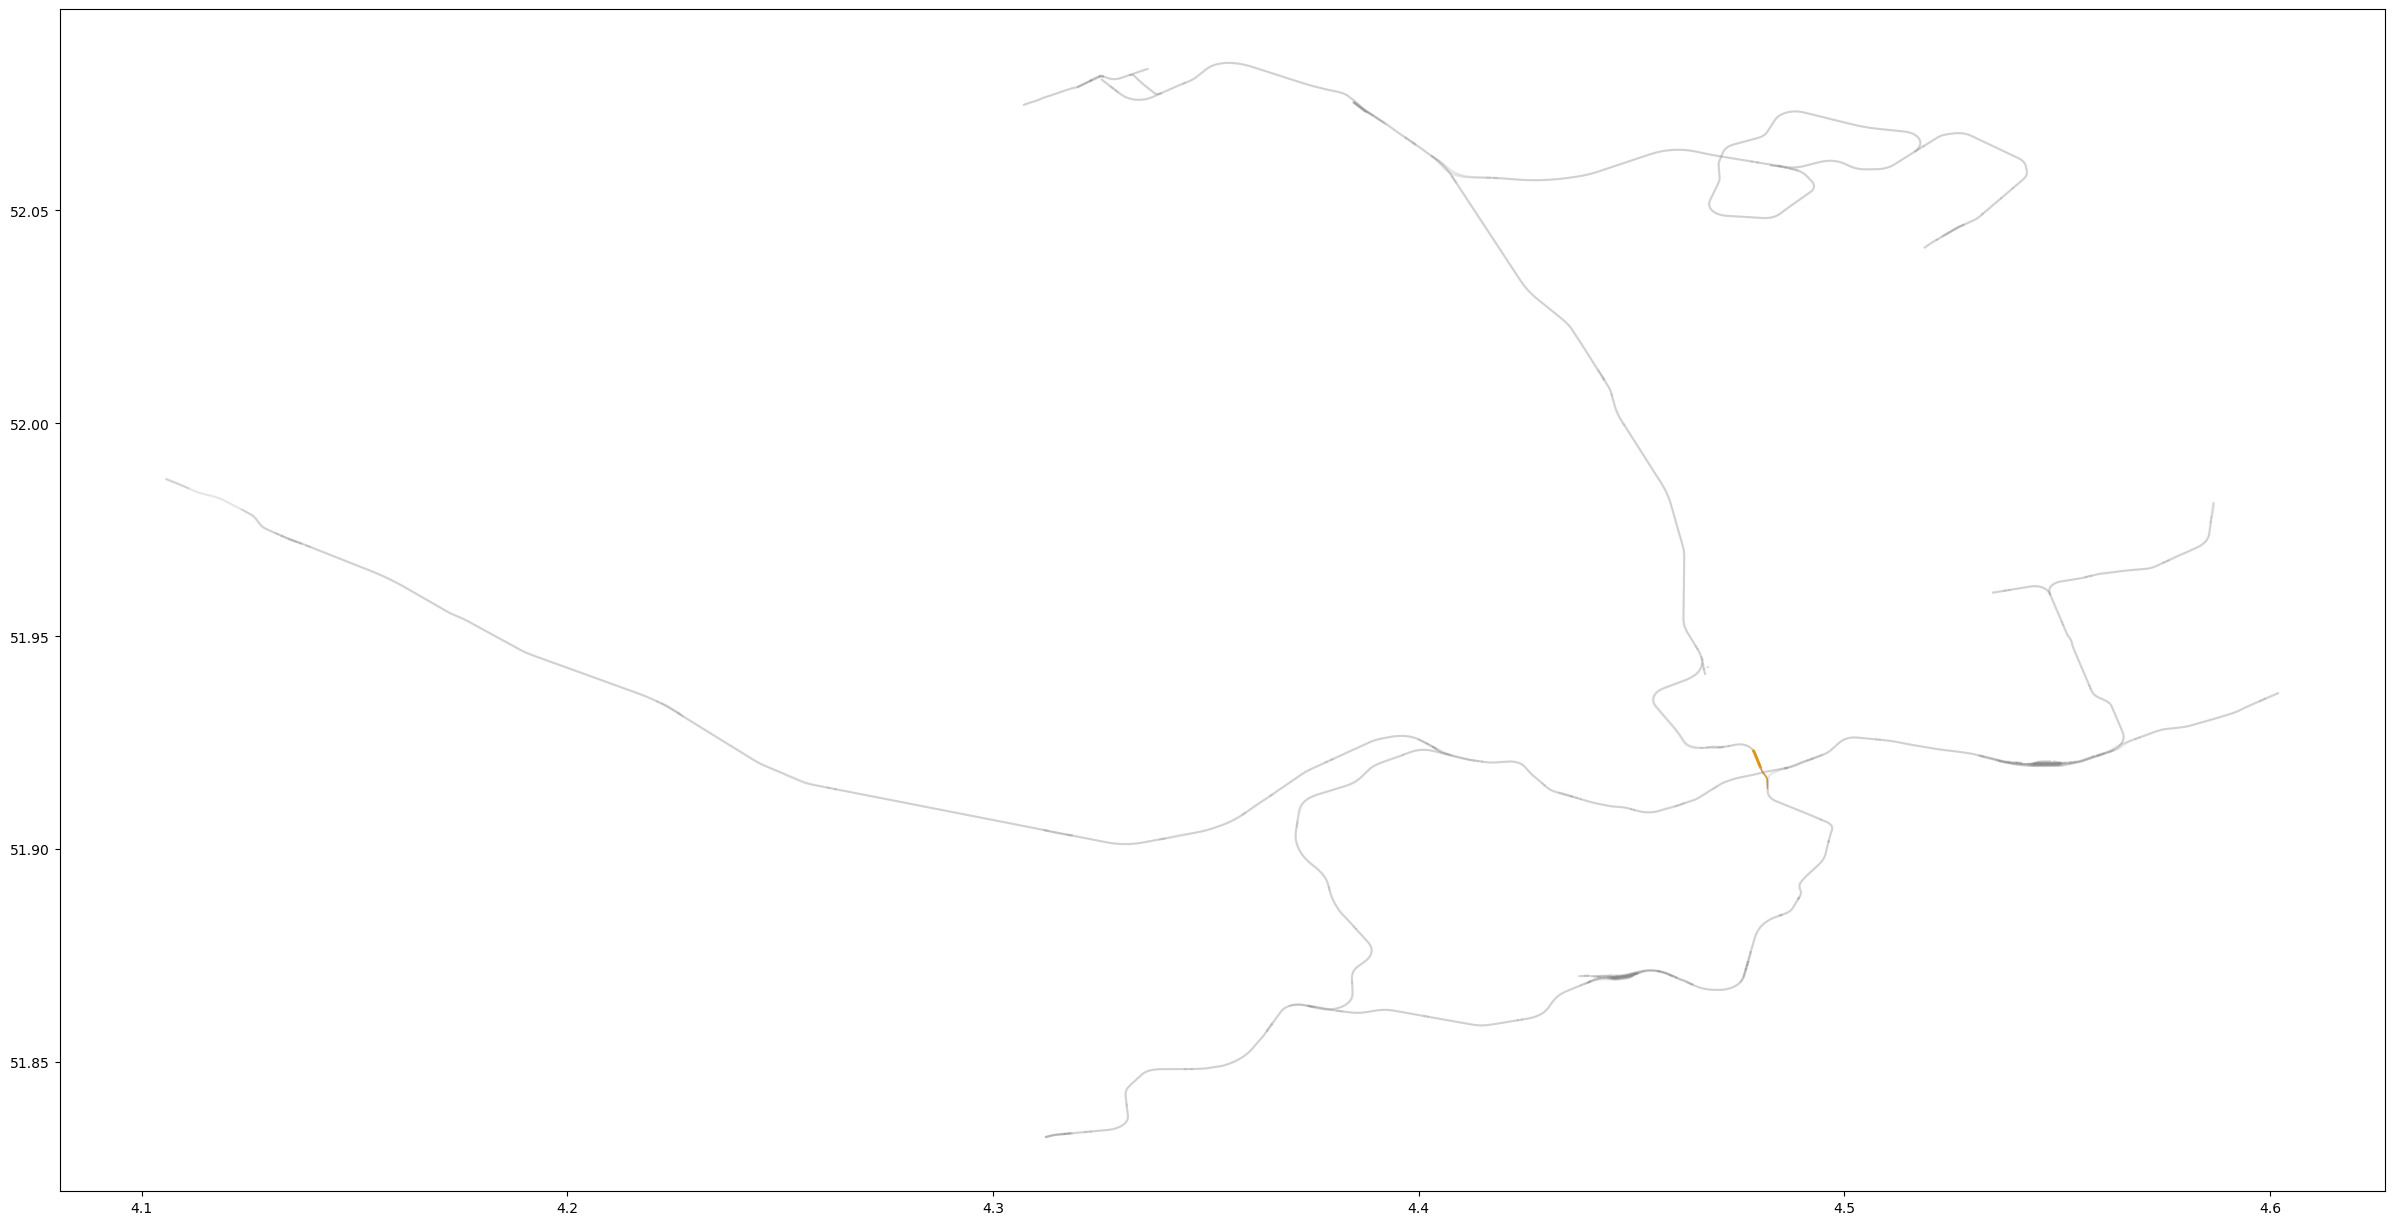

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way1.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way1.count_weight), color='orange')

In [47]:
s_station_df2 = find_nearest_station(start_node_coordinate, s_node_matched_all_stations_dict['Metro E: Den Haag Centraal => Slinge'])
s_station_df2

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
7,16,Stadhuis,POINT (4.4784926 51.9232269),4.478493,51.923227,Metro E: Den Haag Centraal => Slinge,E,subway,"(4.4784926, 51.9232269)"


In [48]:
e_station_df2 = find_nearest_station(end_node_coordinate, e_node_matched_all_stations_dict['Metro E: Den Haag Centraal => Slinge'])
e_station_df2

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
5,15,Leuvehaven,POINT (4.4819628 51.914034),4.481963,51.914034,Metro E: Den Haag Centraal => Slinge,E,subway,"(4.4819628, 51.914034)"


In [52]:
all_stations_way2 = s_node_matched_all_stations_dict['Metro E: Den Haag Centraal => Slinge']

In [53]:
s_index = s_station_df2.index[0]
e_index = e_station_df2.index[0]

In [54]:
s_e_between_stations_way2 = all_stations_way2.iloc[s_index:e_index-1:-1]  

In [55]:
s_e_between_stations_way2

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
7,16,Stadhuis,POINT (4.4784926 51.9232269),4.478493,51.923227,Metro E: Den Haag Centraal => Slinge,E,subway,"(4.4784926, 51.9232269)"
6,18,Beurs,POINT (4.4803477 51.9190178),4.480348,51.919018,Metro E: Den Haag Centraal => Slinge,E,subway,"(4.4803477, 51.9190178)"
5,15,Leuvehaven,POINT (4.4819628 51.914034),4.481963,51.914034,Metro E: Den Haag Centraal => Slinge,E,subway,"(4.4819628, 51.914034)"


In [58]:
s_e_between_nodes_way2 = sub_new_nodes.merge(s_e_between_stations_way2, on='coordinate_value', suffixes=('', '_drop'))
s_e_between_nodes_way2

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref,route,transfer,id_drop,name_drop,geometry_drop,geo_x_drop,geo_y_drop,route_name_list_drop,ref_drop,route_drop
0,POINT (4.48196 51.91403),2,1318,"(4.4819628, 51.914034)",Leuvehaven,4.481963,51.914034,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"(D, E)",15,Leuvehaven,POINT (4.4819628 51.914034),4.481963,51.914034,Metro E: Den Haag Centraal => Slinge,E,subway
1,POINT (4.47849 51.92323),2,1321,"(4.4784926, 51.9232269)",Stadhuis,4.478493,51.923227,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"(D, E)",16,Stadhuis,POINT (4.4784926 51.9232269),4.478493,51.923227,Metro E: Den Haag Centraal => Slinge,E,subway
2,POINT (4.48035 51.91902),2,1329,"(4.4803477, 51.9190178)",Beurs,4.480348,51.919018,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"(D, E)",18,Beurs,POINT (4.4803477 51.9190178),4.480348,51.919018,Metro E: Den Haag Centraal => Slinge,E,subway


In [59]:
id_pairs_way2 = pd.DataFrame(columns = ['s_id','e_id'])

for i in range(len(s_e_between_nodes_way2)-1):
    id_pairs_way2.loc[i,'s_id'] = s_e_between_nodes_way2.loc[i,'id']
    id_pairs_way2.loc[i,'e_id'] = s_e_between_nodes_way2.loc[i+1,'id']

id_pairs_way2

,s_id,e_id
0,1318,1321
1,1321,1329


## Test 2: Rotterdam 2 -- s-transfer, e-transfer, s_e on totally 3 same routes

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [32]:
s_e_coordinates_t2 = {
    's_coordinates_x': 4.449333627637281, 
    's_coordinates_y': 51.90933928551807, 
    'e_coordinates_x': 4.499070490137936, 
    'e_coordinates_y': 51.92423738222505
} 

In [33]:
start_node, end_node = s_e_node_df(s_e_coordinates_t2, sub_new_nodes)

In [34]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
6,POINT (4.44572 51.91000),2,1361,Delfshaven,4.445718,51.909998,"(4.4457184, 51.9099984)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C","A, B, C"


In [35]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
35,POINT (4.49702 51.92335),2,1319,Oostplein,4.497022,51.923352,"(4.4970223, 51.9233516)",Metro A: Vlaardingen West => Binnenhof,subway,"A, B, C","A, B, C"


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [36]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [37]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

s_node and e_node are on several same routes 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [38]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0   A
1   B
2   C



,ref
0,A
1,B
2,C


### Get all stations between s_e nodes and transfer nodes

In [39]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,sub_routes,start_node,end_node,sub_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                 name                      geometry     geo_x  \
 0   42            Binnenhof    POINT (4.535619 51.960392)  4.535619   
 1   19           Romeynshof  POINT (4.5428599 51.9615326)   4.54286   
 2   38            Graskruid  POINT (4.5495126 51.9572338)  4.549513   
 3   36            Alexander  POINT (4.5519357 51.9514315)  4.551936   
 4   39          Oosterflank  POINT (4.5546607 51.9452332)  4.554661   
 5   16          Prinsenlaan  POINT (4.5564294 51.9410889)  4.556429   
 6   17             Schenkel  POINT (4.5630324 51.9330353)  4.563032   
 7   13          Capelsebrug  POINT (4.5580666 51.9213386)  4.558067   
 8    8       Kralingse Zoom  POINT (4.5333209 51.9215215)  4.533321   
 9   10      Voorschoterlaan  POINT (4.5130469 51.9249857)  4.513047   
 10   7          Gerdesiaweg   POINT (4.5058468 51.925888)  4.505847   
 11   9            Oostplein  POINT (4.4970223 51.9233516)  4.497022   
 12  20                Blaak  POINT (4.4888603 51.9197652)   4.4

In [40]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id             name                      geometry     geo_x      geo_y  \
 17   5       Delfshaven  POINT (4.4456919 51.9099682)  4.445692  51.909968   
 16   4        Coolhaven  POINT (4.4583154 51.9094164)  4.458315  51.909416   
 15   3         Dijkzigt  POINT (4.4661327 51.9122274)  4.466133  51.912227   
 14   2  Eendrachtsplein  POINT (4.4737535 51.9163189)  4.473753  51.916319   
 13  11            Beurs  POINT (4.4803884 51.9178668)  4.480388  51.917867   
 12  20            Blaak  POINT (4.4888603 51.9197652)   4.48886  51.919765   
 11   9        Oostplein  POINT (4.4970223 51.9233516)  4.497022  51.923352   
 
                            route_name_list ref   route  \
 17  Metro A: Vlaardingen West => Binnenhof   A  subway   
 16  Metro A: Vlaardingen West => Binnenhof   A  subway   
 15  Metro A: Vlaardingen West => Binnenhof   A  subway   
 14  Metro A: Vlaardingen West => Binnenhof   A  subway   
 13  Metro A: Vlaardingen West => Binnenhof   A  subway   
 12  Metro A

### Get all nodes and id_pairs of nodes between s_e nodes

In [41]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,sub_new_nodes)
btw_all_id_pairs_list

[   s_id  e_id
 0  1319  1363
 1  1363  1327
 2  1327  1275
 3  1275  1276
 4  1276  1285
 5  1285  1286,
    s_id  e_id
 0  1319  1363
 1  1363  1327
 2  1327  1275
 3  1275  1276
 4  1276  1285
 5  1285  1286,
    s_id  e_id
 0  1319  1363
 1  1363  1327
 2  1327  1275
 3  1275  1276
 4  1276  1285
 5  1285  1286]

### Calculate shortest path and plot

In [42]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [43]:
btw_all_id_pairs_list_unique

[   s_id  e_id
 0  1319  1363
 1  1363  1327
 2  1327  1275
 3  1275  1276
 4  1276  1285
 5  1285  1286]

In [44]:
G = create_ground_graph(edges, nodes)

In [45]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [46]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
542,207219680,"LINESTRING (4.4888603 51.9197652, 4.4892364 51...",subway,None,542,1363,506,288.870683,0.011555,288,"(1363, 506)","(506, 1363)"
562,207219687,"LINESTRING (4.4963781 51.9228352, 4.4964688 51...",subway,None,562,518,1319,72.590348,0.002904,72,"(518, 1319)","(1319, 518)"
579,207219693,"LINESTRING (4.4924195 51.9211432, 4.4944717 51...",subway,None,579,506,518,332.329533,0.013293,332,"(506, 518)","(518, 506)"
539,207219679,"LINESTRING (4.4803884 51.9178668, 4.4806528 51...",subway,None,539,1327,546,401.319819,0.016053,401,"(1327, 546)","(546, 1327)"
540,207219679,"LINESTRING (4.4859606 51.9189334, 4.4862218 51...",subway,None,540,546,505,68.810164,0.002752,68,"(546, 505)","(505, 546)"
541,207219680,"LINESTRING (4.4869152 51.9191182, 4.4870521 51...",subway,None,541,505,1363,152.399667,0.006096,152,"(505, 1363)","(1363, 505)"
71,18089519,"LINESTRING (4.4737535 51.9163189, 4.473784 51....",subway,None,71,1275,55,143.657505,0.005746,143,"(1275, 55)","(55, 1275)"
538,207219679,"LINESTRING (4.4756766 51.9168166, 4.4783052 51...",subway,None,538,55,1327,344.708241,0.013788,344,"(55, 1327)","(1327, 55)"
68,18089519,"LINESTRING (4.4661327 51.9122274, 4.4661642 51...",subway,None,68,1276,1231,300.541186,0.012022,300,"(1276, 1231)","(1231, 1276)"
70,18089519,"LINESTRING (4.4700911 51.9146952, 4.4701328 51...",subway,None,70,1230,1275,312.157827,0.012486,312,"(1230, 1275)","(1275, 1230)"


In [47]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [48]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,207219680,"LINESTRING (4.4888603 51.9197652, 4.4892364 51...",subway,None,542,1363,506,288.870683,0.011555,288,"(1363, 506)","(506, 1363)",1.0
1,207219687,"LINESTRING (4.4963781 51.9228352, 4.4964688 51...",subway,None,562,518,1319,72.590348,0.002904,72,"(518, 1319)","(1319, 518)",1.0
2,207219693,"LINESTRING (4.4924195 51.9211432, 4.4944717 51...",subway,None,579,506,518,332.329533,0.013293,332,"(506, 518)","(518, 506)",1.0
3,207219679,"LINESTRING (4.4803884 51.9178668, 4.4806528 51...",subway,None,539,1327,546,401.319819,0.016053,401,"(1327, 546)","(546, 1327)",1.0
4,207219679,"LINESTRING (4.4859606 51.9189334, 4.4862218 51...",subway,None,540,546,505,68.810164,0.002752,68,"(546, 505)","(505, 546)",1.0
5,207219680,"LINESTRING (4.4869152 51.9191182, 4.4870521 51...",subway,None,541,505,1363,152.399667,0.006096,152,"(505, 1363)","(1363, 505)",1.0
6,18089519,"LINESTRING (4.4737535 51.9163189, 4.473784 51....",subway,None,71,1275,55,143.657505,0.005746,143,"(1275, 55)","(55, 1275)",1.0
7,207219679,"LINESTRING (4.4756766 51.9168166, 4.4783052 51...",subway,None,538,55,1327,344.708241,0.013788,344,"(55, 1327)","(1327, 55)",1.0
8,18089519,"LINESTRING (4.4661327 51.9122274, 4.4661642 51...",subway,None,68,1276,1231,300.541186,0.012022,300,"(1276, 1231)","(1231, 1276)",1.0
9,18089519,"LINESTRING (4.4700911 51.9146952, 4.4701328 51...",subway,None,70,1230,1275,312.157827,0.012486,312,"(1230, 1275)","(1275, 1230)",1.0


In [49]:
shortest_path_edges_way.time.sum()

0.16156426247796768

<Axes: >

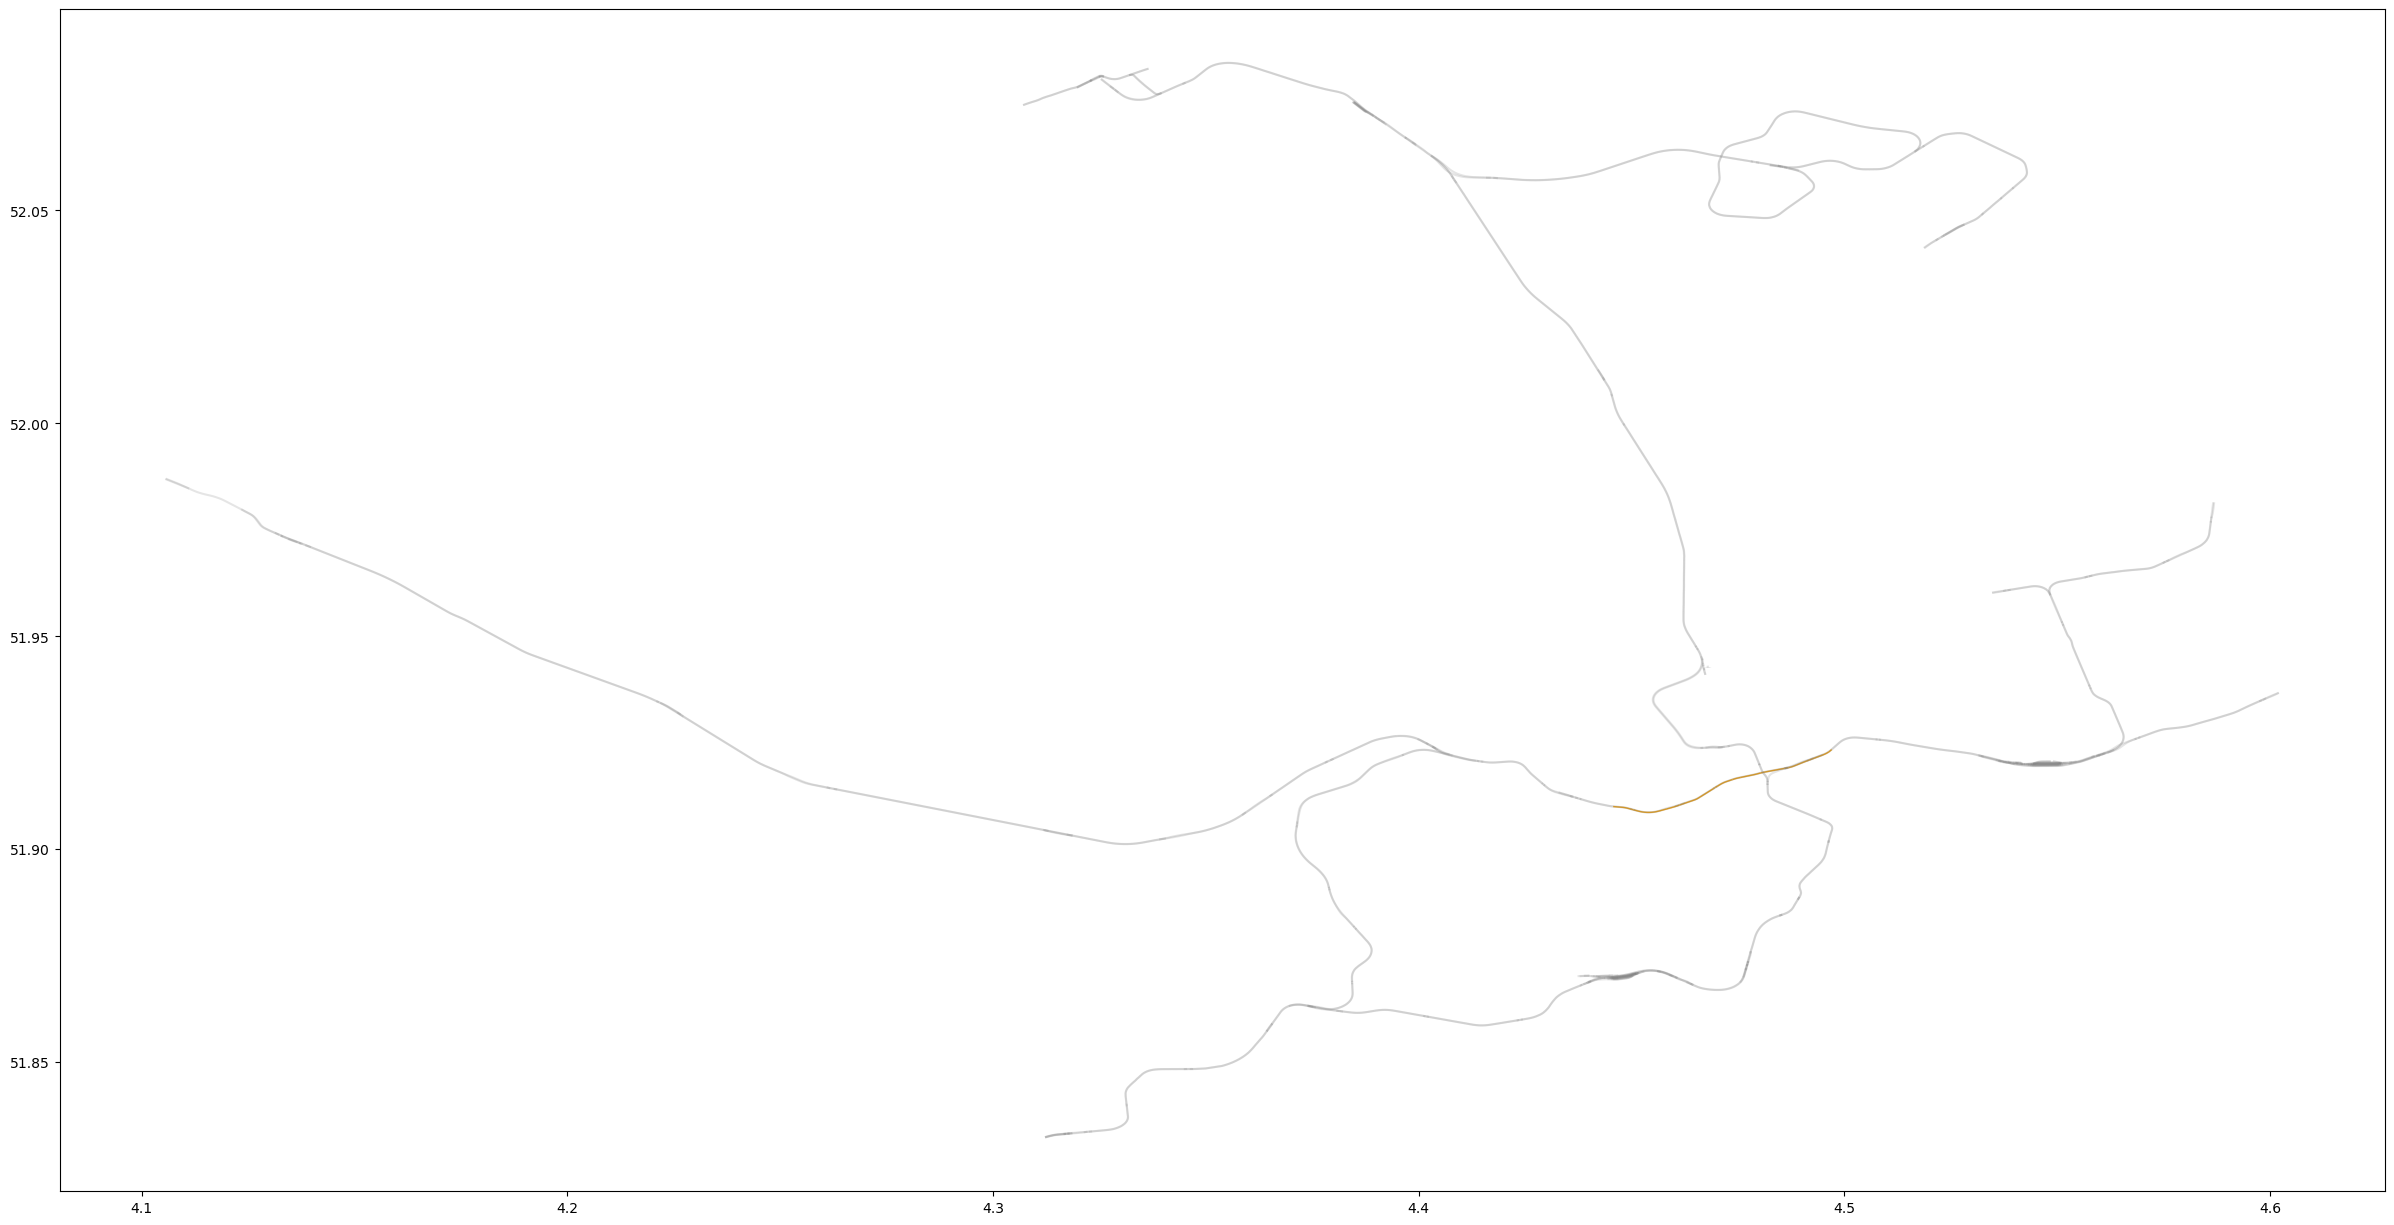

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

### find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [66]:
s_node_on_route_gdf, e_node_on_route_gdf = s_e_on_route_gdf(start_node, end_node, sub_routes)

In [67]:
s_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
0,2785672,subway,Vlaardingen West,Metro A: Binnenhof => Vlaardingen West,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
2,2785674,subway,Hoek van Holland Strand,Metro B: Nesselande => Hoek van Holland Strand,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
5,2785677,subway,De Akkers,Metro C: De Terp => De Akkers,C,Rail Rotterdam,None,"MULTILINESTRING ((4.59945 51.93557, 4.59948 51..."


In [68]:
e_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
1,2785673,subway,Binnenhof,Metro A: Vlaardingen West => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.31574 51.90364, 4.31591 51..."
3,2785675,subway,Nesselande,Metro B: Hoek van Holland Strand => Nesselande,B,Rail Rotterdam,None,"MULTILINESTRING ((4.10702 51.98639, 4.10550 51..."
4,2785676,subway,De Terp,Metro C: De Akkers => De Terp,C,Rail Rotterdam,None,"MULTILINESTRING ((4.31898 51.83329, 4.31899 51..."


In [69]:
s_node_on_route_gdf['ref']

0    A
2    B
5    C
Name: ref, dtype: object

In [70]:
e_node_on_route_gdf['ref']

1    A
3    B
4    C
Name: ref, dtype: object

In [71]:
s_node_on_route_gdf['ref'].equals(e_node_on_route_gdf['ref'])

False

In [72]:
s_node_on_route_gdf_reset = s_node_on_route_gdf['ref'].reset_index(drop=True)
e_node_on_route_gdf_reset = e_node_on_route_gdf['ref'].reset_index(drop=True)
result = s_node_on_route_gdf_reset.equals(e_node_on_route_gdf_reset)
print(result)

True


In [73]:
s_node_on_route_gdf_reset

0    A
1    B
2    C
Name: ref, dtype: object

In [74]:
e_node_on_route_gdf_reset

0    A
1    B
2    C
Name: ref, dtype: object

### Make judgement of s_e_on_route_gdf

In [75]:
s_e_nodes_on_route_gdf = judge_on_route(s_node_on_route_gdf, e_node_on_route_gdf)

s_node and e_node are on 3 same routes


In [76]:
s_e_nodes_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
0,2785672,subway,Vlaardingen West,Metro A: Binnenhof => Vlaardingen West,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
2,2785674,subway,Hoek van Holland Strand,Metro B: Nesselande => Hoek van Holland Strand,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
5,2785677,subway,De Akkers,Metro C: De Terp => De Akkers,C,Rail Rotterdam,None,"MULTILINESTRING ((4.59945 51.93557, 4.59948 51..."


### get the nearst stations of s_e nodes

### get all stations between s_e stations

### get all nodes and id_pairs of nodes between s_e nodes

### calculate shortest path and plot

## Test 3: Rotterdam 3 -- s-transfer, e-transfer, s_e has partially same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [32]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.469336738433579, 
    's_coordinates_y': 51.9261310662554, 
    'e_coordinates_x': 4.325485193192295, 
    'e_coordinates_y': 51.831836998376694
} 

In [33]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, sub_new_nodes)

In [34]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
150,POINT (4.46975 51.92404),2,1309,Rotterdam Centraal,4.469745,51.92404,"(4.4697452, 51.9240398)",Metro E: Slinge => Den Haag Centraal,subway,"D, E","D, E"


In [35]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
82,POINT (4.31990 51.83328),2,89,De Akkers,4.319902,51.833277,"(4.3199021, 51.8332768)",Metro C: De Akkers => De Terp,subway,"C, D","C, D"


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [36]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [37]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

Some of e_on_route is the same as some of s_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [38]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0   D



,ref
0,D


### Get all stations between s_e nodes and transfer nodes

In [39]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,sub_routes,start_node,end_node,sub_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                 name                      geometry     geo_x  \
 0   25   Rotterdam Centraal   POINT (4.4698149 51.923895)  4.469815   
 1   10             Stadhuis  POINT (4.4785436 51.9232449)  4.478544   
 2   12                Beurs   POINT (4.480404 51.9190265)  4.480404   
 3    9           Leuvehaven  POINT (4.4820214 51.9140338)  4.482021   
 4   11      Wilhelminaplein  POINT (4.4925955 51.9077405)  4.492596   
 5   15            Rijnhaven    POINT (4.4968239 51.90358)  4.496824   
 6    7            Maashaven  POINT (4.4947847 51.8971895)  4.494785   
 7   14            Zuidplein  POINT (4.4883544 51.8868895)  4.488354   
 8   13               Slinge  POINT (4.4777958 51.8745817)  4.477796   
 9    2                Rhoon  POINT (4.4194958 51.8591157)  4.419496   
 10   3           Poortugaal  POINT (4.3957852 51.8617079)  4.395785   
 11   6          Tussenwater  POINT (4.3767863 51.8626126)  4.376786   
 12  16            Hoogvliet    POINT (4.36681 51.8606106)   4.3

In [40]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                 name                      geometry     geo_x  \
 0   25   Rotterdam Centraal   POINT (4.4698149 51.923895)  4.469815   
 1   10             Stadhuis  POINT (4.4785436 51.9232449)  4.478544   
 2   12                Beurs   POINT (4.480404 51.9190265)  4.480404   
 3    9           Leuvehaven  POINT (4.4820214 51.9140338)  4.482021   
 4   11      Wilhelminaplein  POINT (4.4925955 51.9077405)  4.492596   
 5   15            Rijnhaven    POINT (4.4968239 51.90358)  4.496824   
 6    7            Maashaven  POINT (4.4947847 51.8971895)  4.494785   
 7   14            Zuidplein  POINT (4.4883544 51.8868895)  4.488354   
 8   13               Slinge  POINT (4.4777958 51.8745817)  4.477796   
 9    2                Rhoon  POINT (4.4194958 51.8591157)  4.419496   
 10   3           Poortugaal  POINT (4.3957852 51.8617079)  4.395785   
 11   6          Tussenwater  POINT (4.3767863 51.8626126)  4.376786   
 12  16            Hoogvliet    POINT (4.36681 51.8606106)   4.3

### Get all nodes and id_pairs of nodes between s_e nodes

In [41]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,sub_new_nodes)
btw_all_id_pairs_list

[    s_id  e_id
 0   1376  1277
 1   1277  1267
 2   1267  1278
 3   1278    89
 4     89   492
 5    492  1322
 6   1322  1330
 7   1330  1317
 8   1317  1326
 9   1326  1373
 10  1373  1289
 11  1289  1372
 12  1372   211
 13   211    45
 14    45    36
 15    36  1279]

### Calculate shortest path and plot

In [42]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [43]:
btw_all_id_pairs_list_unique

[    s_id  e_id
 0   1376  1277
 1   1277  1267
 2   1267  1278
 3   1278    89
 4     89   492
 5    492  1322
 6   1322  1330
 7   1330  1317
 8   1317  1326
 9   1326  1373
 10  1373  1289
 11  1289  1372
 12  1372   211
 13   211    45
 14    45    36
 15    36  1279]

In [44]:
G = create_ground_graph(edges, nodes)

In [45]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [46]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
36,6307956,"LINESTRING (4.3664562 51.8601194, 4.36681 51.8...",subway,None,36,39,1376,59.824504,0.002393,59,"(39, 1376)","(1376, 39)"
41,6307958,"LINESTRING (4.3657761 51.8591869, 4.3664562 51...",subway,None,41,42,39,113.809888,0.004552,113,"(42, 39)","(39, 42)"
74,18098593,"LINESTRING (4.363819 51.8564711, 4.3641906 51....",subway,None,74,59,60,62.651019,0.002506,62,"(59, 60)","(60, 59)"
128,138032038,"LINESTRING (4.3642858 51.857128, 4.3645173 51....",subway,spur,128,124,125,41.987616,0.001680,41,"(124, 125)","(125, 124)"
129,138032042,"LINESTRING (4.3653809 51.8586734, 4.3649215 51...",subway,siding,129,126,125,145.790308,0.005832,145,"(126, 125)","(125, 126)"
...,...,...,...,...,...,...,...,...,...,...,...,...
29,6307948,"LINESTRING (4.3806491 51.8619995, 4.3822106 51...",subway,None,29,1219,1218,109.829818,0.004393,109,"(1219, 1218)","(1218, 1219)"
30,6307948,"LINESTRING (4.3822106 51.8617989, 4.382401 51....",subway,None,30,1218,33,466.519450,0.018661,466,"(1218, 33)","(33, 1218)"
32,6307951,"LINESTRING (4.3888777 51.8618425, 4.3896234 51...",subway,None,32,33,35,53.084601,0.002123,53,"(33, 35)","(35, 33)"
33,6307952,"LINESTRING (4.3896234 51.8619633, 4.3899154 51...",subway,None,33,35,36,433.128768,0.017325,433,"(35, 36)","(36, 35)"


In [47]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [48]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,6307956,"LINESTRING (4.3664562 51.8601194, 4.36681 51.8...",subway,None,36,39,1376,59.824504,0.002393,59,"(39, 1376)","(1376, 39)",2.0
1,6307958,"LINESTRING (4.3657761 51.8591869, 4.3664562 51...",subway,None,41,42,39,113.809888,0.004552,113,"(42, 39)","(39, 42)",2.0
2,18098593,"LINESTRING (4.363819 51.8564711, 4.3641906 51....",subway,None,74,59,60,62.651019,0.002506,62,"(59, 60)","(60, 59)",1.0
3,138032038,"LINESTRING (4.3642858 51.857128, 4.3645173 51....",subway,spur,128,124,125,41.987616,0.001680,41,"(124, 125)","(125, 124)",1.0
4,138032042,"LINESTRING (4.3653809 51.8586734, 4.3649215 51...",subway,siding,129,126,125,145.790308,0.005832,145,"(126, 125)","(125, 126)",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,6307948,"LINESTRING (4.3806491 51.8619995, 4.3822106 51...",subway,None,29,1219,1218,109.829818,0.004393,109,"(1219, 1218)","(1218, 1219)",1.0
236,6307948,"LINESTRING (4.3822106 51.8617989, 4.382401 51....",subway,None,30,1218,33,466.519450,0.018661,466,"(1218, 33)","(33, 1218)",1.0
237,6307951,"LINESTRING (4.3888777 51.8618425, 4.3896234 51...",subway,None,32,33,35,53.084601,0.002123,53,"(33, 35)","(35, 33)",1.0
238,6307952,"LINESTRING (4.3896234 51.8619633, 4.3899154 51...",subway,None,33,35,36,433.128768,0.017325,433,"(35, 36)","(36, 35)",1.0


In [49]:
shortest_path_edges_way.time.sum()

1.670252638960835

<Axes: >

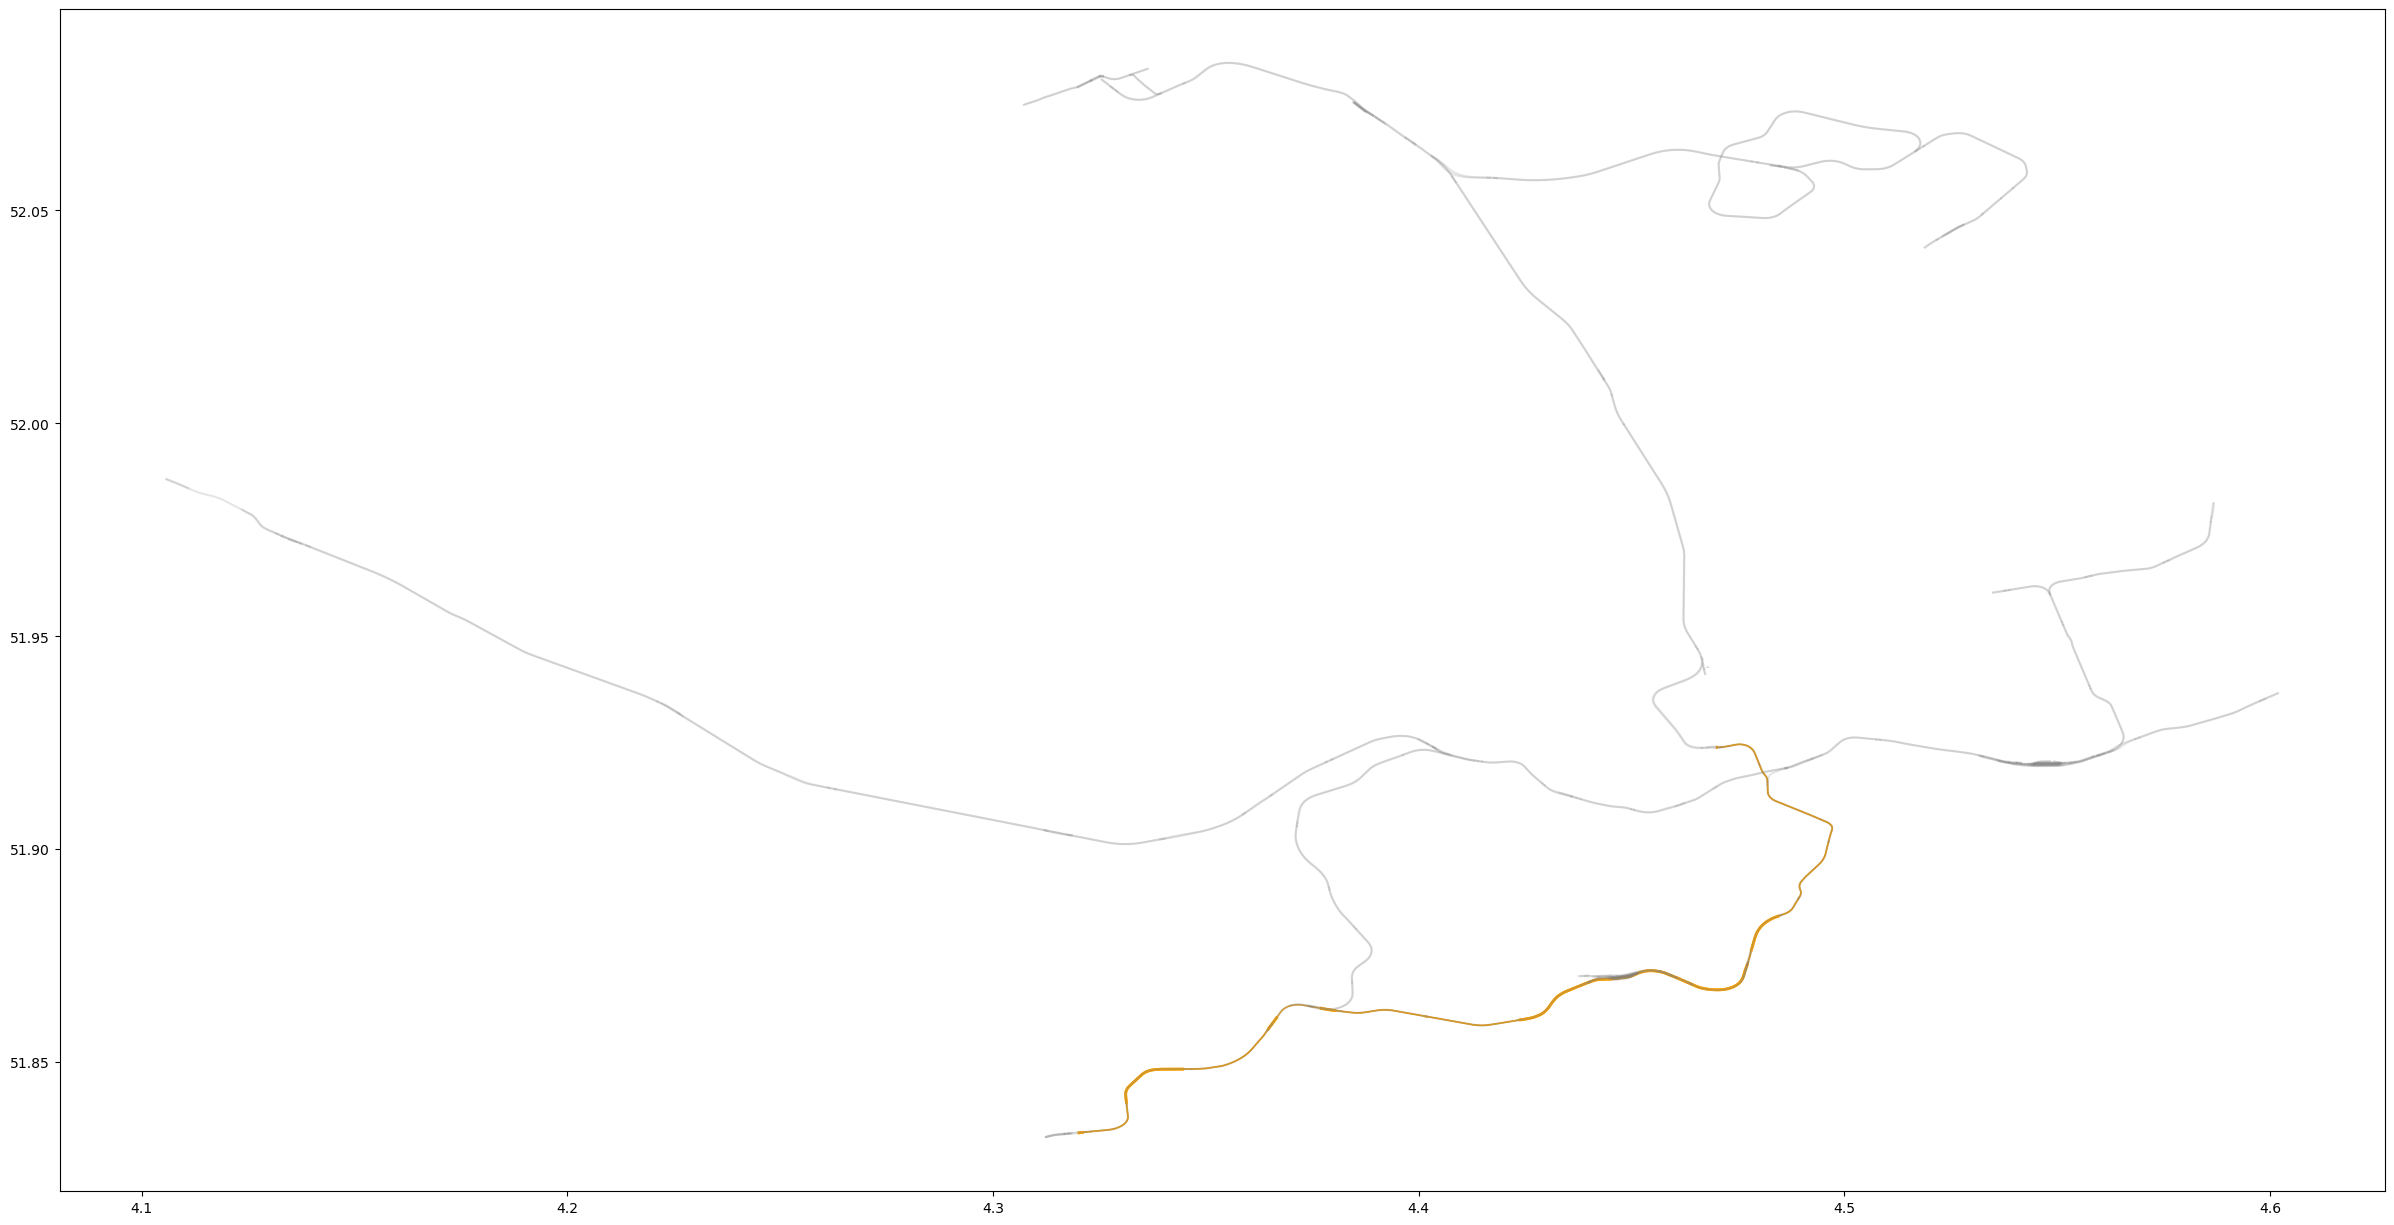

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 4: Rotterdam 4 -- s-transfer, e-no transfer, s_e has one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [32]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.483305936774938, 
    's_coordinates_y': 51.91033987991742, 
    'e_coordinates_x': 4.471927555456692, 
    'e_coordinates_y': 51.94896547377741
} 

In [33]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, sub_new_nodes)

In [34]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
100,POINT (4.48202 51.91403),2,1317,Leuvehaven,4.482021,51.914034,"(4.4820214, 51.9140338)",Metro D: De Akkers => Rotterdam Centraal,subway,"D, E","D, E"


In [35]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
123,POINT (4.46470 51.94824),2,1374,Melanchthonweg,4.464698,51.948236,"(4.4646984, 51.9482363)",Metro E: Den Haag Centraal => Slinge,subway,E,None


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [36]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [37]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of s_on_route is the same as e_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [38]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
1   E



,ref
1,E


### Get all stations between s_e nodes and transfer nodes

In [39]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,sub_routes,start_node,end_node,sub_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                    name                      geometry     geo_x  \
 0   23                  Slinge    POINT (4.47766 51.8745956)   4.47766   
 1   24               Zuidplein        POINT (4.4883 51.8869)    4.4883   
 2   25               Maashaven  POINT (4.4947288 51.8971985)  4.494729   
 3    3               Rijnhaven  POINT (4.4967671 51.9035882)  4.496767   
 4   17         Wilhelminaplein  POINT (4.4925598 51.9077135)   4.49256   
 5   15              Leuvehaven   POINT (4.4819628 51.914034)  4.481963   
 6   18                   Beurs  POINT (4.4803477 51.9190178)  4.480348   
 7   16                Stadhuis  POINT (4.4784926 51.9232269)  4.478493   
 8   14      Rotterdam Centraal  POINT (4.4698293 51.9237763)  4.469829   
 9    8                Blijdorp  POINT (4.4580891 51.9305871)  4.458089   
 10  19          Melanchthonweg  POINT (4.4646984 51.9482363)  4.464698   
 11   9  Meijersplein / Airport  POINT (4.4621931 51.9558934)  4.462193   
 12  13               Rod

In [40]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                name                      geometry     geo_x      geo_y  \
 5   15          Leuvehaven   POINT (4.4819628 51.914034)  4.481963  51.914034   
 6   18               Beurs  POINT (4.4803477 51.9190178)  4.480348  51.919018   
 7   16            Stadhuis  POINT (4.4784926 51.9232269)  4.478493  51.923227   
 8   14  Rotterdam Centraal  POINT (4.4698293 51.9237763)  4.469829  51.923776   
 9    8            Blijdorp  POINT (4.4580891 51.9305871)  4.458089  51.930587   
 10  19      Melanchthonweg  POINT (4.4646984 51.9482363)  4.464698  51.948236   
 
                          route_name_list ref   route         coordinate_value  
 5   Metro E: Den Haag Centraal => Slinge   E  subway   (4.4819628, 51.914034)  
 6   Metro E: Den Haag Centraal => Slinge   E  subway  (4.4803477, 51.9190178)  
 7   Metro E: Den Haag Centraal => Slinge   E  subway  (4.4784926, 51.9232269)  
 8   Metro E: Den Haag Centraal => Slinge   E  subway  (4.4698293, 51.9237763)  
 9   Metro E: Den H

### Get all nodes and id_pairs of nodes between s_e nodes

In [41]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,sub_new_nodes)
btw_all_id_pairs_list

[   s_id  e_id
 0  1318  1329
 1  1329  1321
 2  1321  1310
 3  1310  1298
 4  1298  1374]

### Calculate shortest path and plot

In [42]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [43]:
btw_all_id_pairs_list_unique

[   s_id  e_id
 0  1318  1329
 1  1329  1321
 2  1321  1310
 3  1310  1298
 4  1298  1374]

In [44]:
G = create_ground_graph(edges, nodes)

In [45]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [46]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
587,207219699,"LINESTRING (4.48141 51.9172524, 4.4814247 51.9...",subway,None,587,528,545,210.180756,0.008407,210,"(528, 545)","(545, 528)"
588,207219699,"LINESTRING (4.4819176 51.9154099, 4.4819295 51...",subway,None,588,545,543,40.108725,0.001604,40,"(545, 543)","(543, 545)"
589,207219699,"LINESTRING (4.4819295 51.9150494, 4.4819447 51...",subway,None,589,543,1318,112.971672,0.004519,112,"(543, 1318)","(1318, 543)"
605,207219702,"LINESTRING (4.4803477 51.9190178, 4.4805167 51...",subway,None,605,1329,528,210.376344,0.008415,210,"(1329, 528)","(528, 1329)"
602,207219702,"LINESTRING (4.4784926 51.9232269, 4.4785615 51...",subway,None,602,1321,551,367.844297,0.014714,367,"(1321, 551)","(551, 1321)"
603,207219702,"LINESTRING (4.4799283 51.9200466, 4.4800696 51...",subway,None,603,551,549,39.760331,0.001590,39,"(551, 549)","(549, 551)"
604,207219702,"LINESTRING (4.4800696 51.9197, 4.4803477 51.91...",subway,None,604,549,1329,78.258581,0.003130,78,"(549, 1329)","(1329, 549)"
513,207198649,"LINESTRING (4.471423 51.9239234, 4.4725149 51....",subway,None,513,496,495,82.592731,0.003304,82,"(496, 495)","(495, 496)"
514,207198649,"LINESTRING (4.4725849 51.9241111, 4.4729336 51...",subway,None,514,495,497,36.397713,0.001456,36,"(495, 497)","(497, 495)"
601,207219702,"LINESTRING (4.4730916 51.9242054, 4.4741094 51...",subway,None,601,497,1321,437.814771,0.017513,437,"(497, 1321)","(1321, 497)"


In [47]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [48]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,207219699,"LINESTRING (4.48141 51.9172524, 4.4814247 51.9...",subway,None,587,528,545,210.180756,0.008407,210,"(528, 545)","(545, 528)",1.0
1,207219699,"LINESTRING (4.4819176 51.9154099, 4.4819295 51...",subway,None,588,545,543,40.108725,0.001604,40,"(545, 543)","(543, 545)",1.0
2,207219699,"LINESTRING (4.4819295 51.9150494, 4.4819447 51...",subway,None,589,543,1318,112.971672,0.004519,112,"(543, 1318)","(1318, 543)",1.0
3,207219702,"LINESTRING (4.4803477 51.9190178, 4.4805167 51...",subway,None,605,1329,528,210.376344,0.008415,210,"(1329, 528)","(528, 1329)",1.0
4,207219702,"LINESTRING (4.4784926 51.9232269, 4.4785615 51...",subway,None,602,1321,551,367.844297,0.014714,367,"(1321, 551)","(551, 1321)",1.0
5,207219702,"LINESTRING (4.4799283 51.9200466, 4.4800696 51...",subway,None,603,551,549,39.760331,0.001590,39,"(551, 549)","(549, 551)",1.0
6,207219702,"LINESTRING (4.4800696 51.9197, 4.4803477 51.91...",subway,None,604,549,1329,78.258581,0.003130,78,"(549, 1329)","(1329, 549)",1.0
7,207198649,"LINESTRING (4.471423 51.9239234, 4.4725149 51....",subway,None,513,496,495,82.592731,0.003304,82,"(496, 495)","(495, 496)",1.0
8,207198649,"LINESTRING (4.4725849 51.9241111, 4.4729336 51...",subway,None,514,495,497,36.397713,0.001456,36,"(495, 497)","(497, 495)",1.0
9,207219702,"LINESTRING (4.4730916 51.9242054, 4.4741094 51...",subway,None,601,497,1321,437.814771,0.017513,437,"(497, 1321)","(1321, 497)",1.0


In [49]:
shortest_path_edges_way.time.sum()

0.2149868676219214

<Axes: >

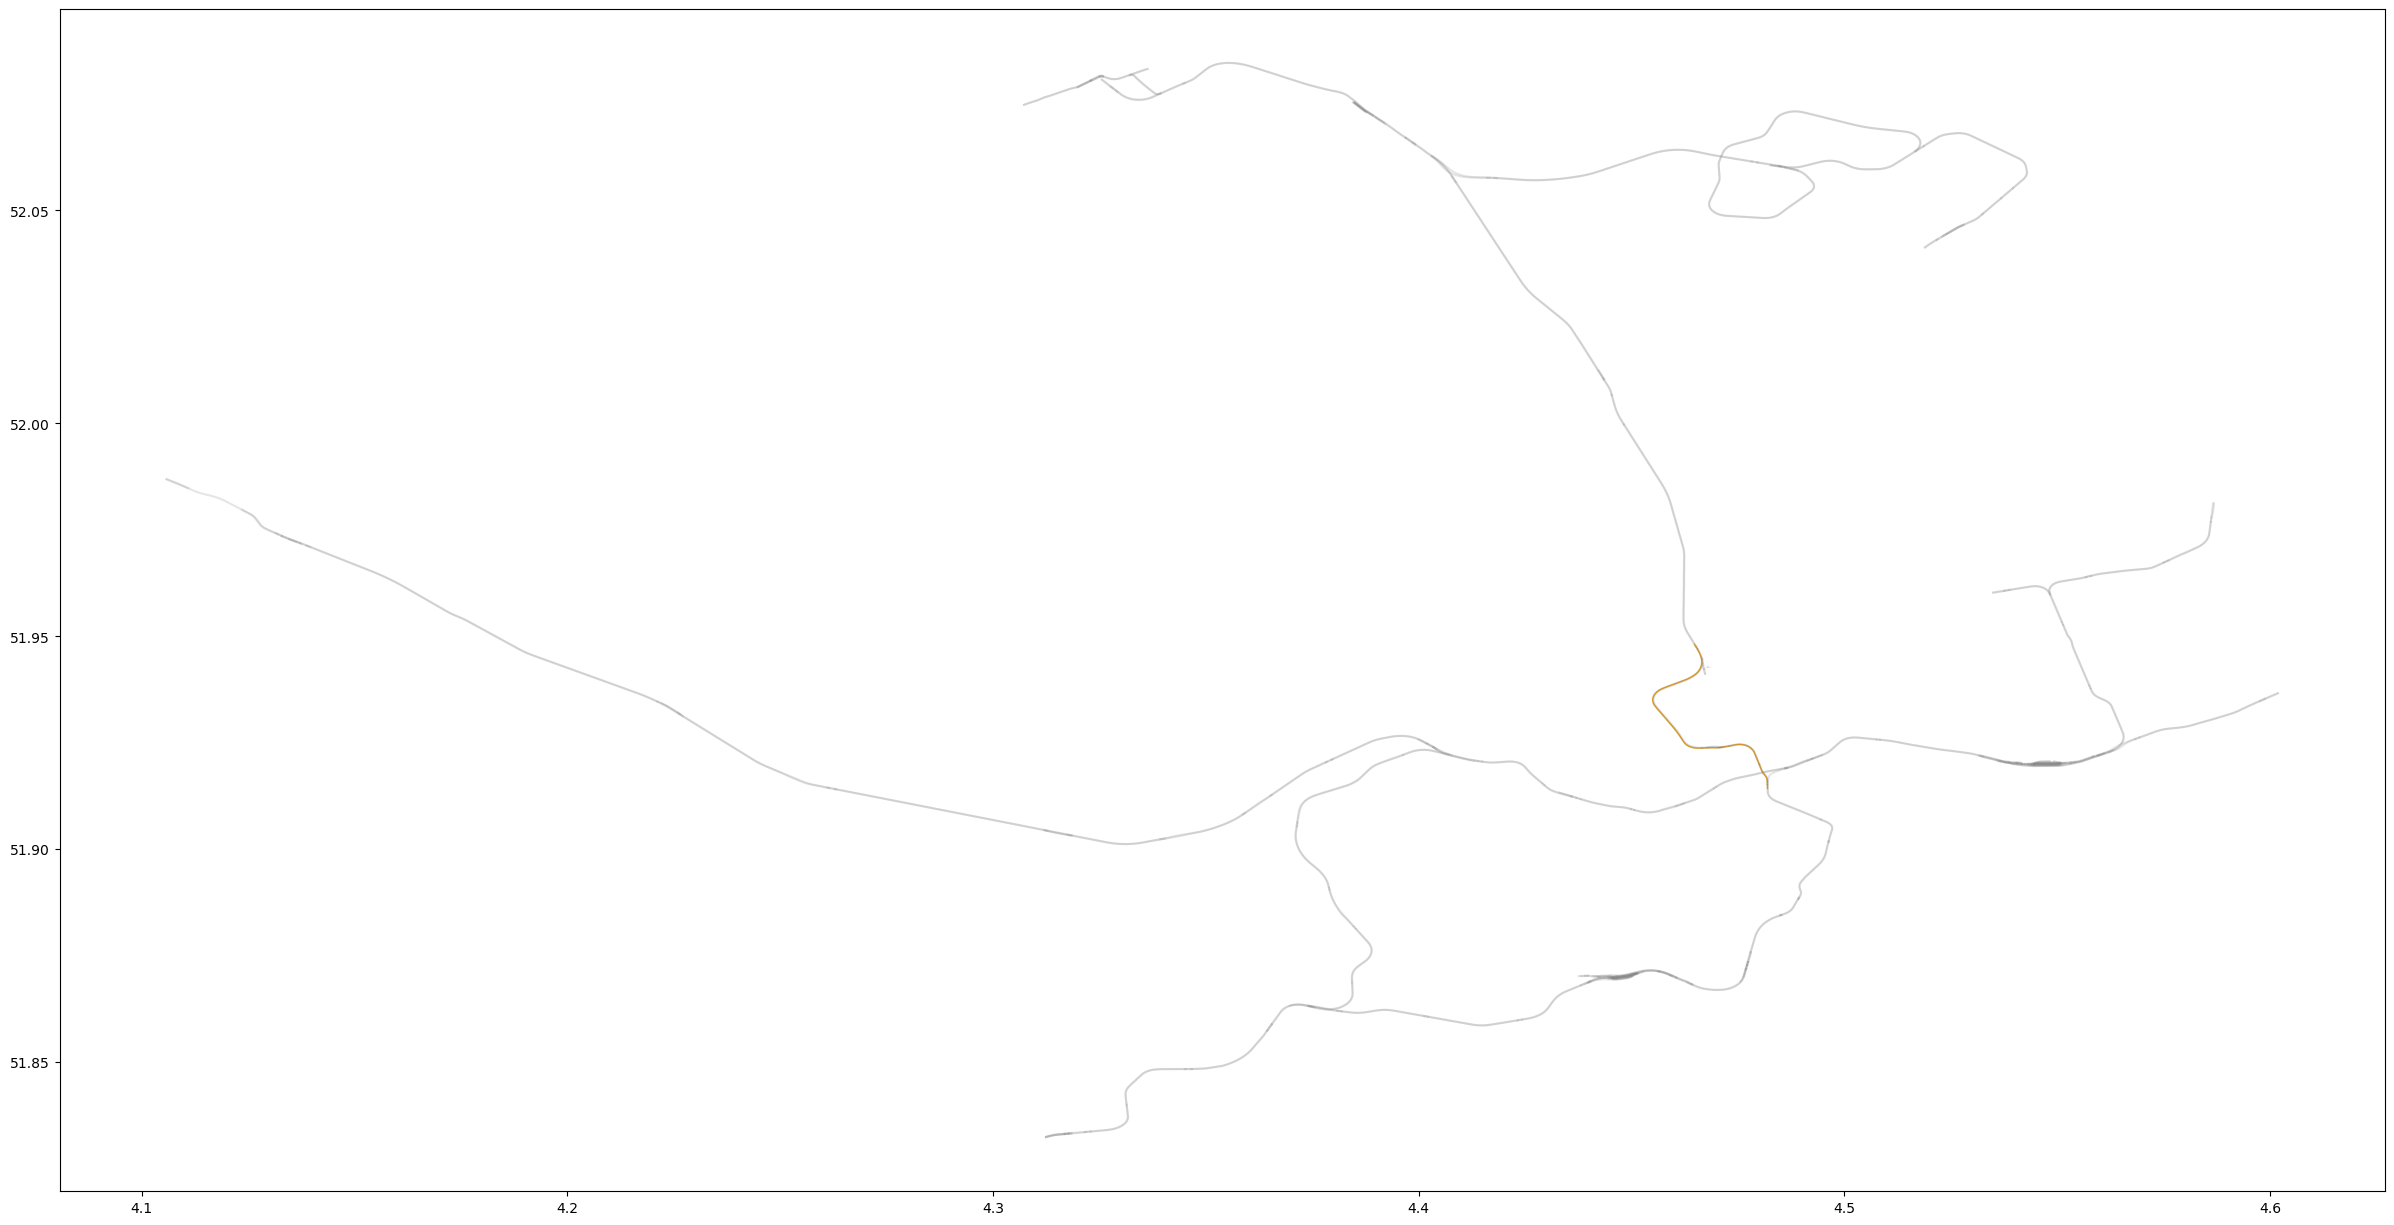

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

### find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [30]:
s_node_on_route_gdf, e_node_on_route_gdf = s_e_on_route_gdf(start_node, end_node, sub_routes)

In [31]:
s_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
6,2785504,subway,Rotterdam Centraal,Metro D: De Akkers => Rotterdam Centraal,D,Rail Rotterdam,None,"MULTILINESTRING ((4.31898 51.83329, 4.31899 51..."
9,2777287,subway,Den Haag Centraal,Metro E: Slinge => Den Haag Centraal,E,Rail Rotterdam,None,"MULTILINESTRING ((4.47052 51.92395, 4.47044 51..."


In [32]:
e_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
8,2777286,subway,Slinge,Metro E: Den Haag Centraal => Slinge,E,Rail Rotterdam,None,"MULTILINESTRING ((4.32649 52.07994, 4.32529 52..."


### Make judgement of s_e_on_route_gdf

In [33]:
def judge_on_route(s_node_on_route_gdf, e_node_on_route_gdf):   # version3
    s_on_route_ref = s_node_on_route_gdf[['ref']].reset_index(drop=True)
    e_on_route_ref = e_node_on_route_gdf[['ref']].reset_index(drop=True)

    length_s_on_route_ref = len(s_on_route_ref)
    length_e_on_route_ref = len(e_on_route_ref)

    if length_s_on_route_ref < 1:
        print("There is something wrong with function----s_e_on_route_gdf")

    
    elif length_s_on_route_ref == 1:
        if length_e_on_route_ref > 1:
            s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)
            if s_e_on_route.duplicated().sum() == 1:
                print(f"One of e_on_route is the same as s_on_route:{s_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of the rest of e_on_route and s_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref
            else:
                print(f"None of e_on_route is the same as s_on_route:{s_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of all e_on_route and s_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref

        elif length_e_on_route_ref == 1:
            if s_on_route_ref.equals(e_on_route_ref) == True:
                print(f"s_node and e_node are on one same route:{s_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find all stations between start_node and end_node, then calculate shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref
            else:
                print(f"s_node and e_node are on two different routes:{s_on_route_ref.loc[0,'ref']},{e_on_route_ref.loc[0,'ref']}")
                print(f"The next step is to find transfer station of {s_on_route_ref.loc[0,'ref']} and {e_on_route_ref.loc[0,'ref']}, then find all stations between start_node and end_node, finally calculate shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref

        else:
            print("There is something wrong with function----s_e_on_route_gdf")


    else:
        s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)
        if length_e_on_route_ref > 1:
            if s_e_on_route.duplicated().sum() == len(s_on_route_ref):
                print(f"s_node and e_node are on several same routes:{s_on_route_ref.ref.tolist()}\n")
                print("The next step is to find all stations between start_node and end_node on each route,then calculate shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref        
            elif s_e_on_route.duplicated().sum() == 0:
                print("Any of e_on_route is not the same as any of s_on_route")
                print("The next step is to enumerate different transfer routes through permutation and combination, obtain all transfer stations, then find all stations between the start node/transfer stations/end node, and finally calculate the shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref            
            else:
                s_e_same_route = s_e_on_route[s_e_on_route['ref'].duplicated()]
                print(f"Some of e_on_route is the same as some of s_on_route:{s_e_same_route.ref.tolist()}\n")
                print("The next step is to enumerate different transfer routes through permutation and combination, obtain all transfer stations, then find all stations between the start node/transfer stations/end node, and finally calculate the shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref            
            
        elif length_e_on_route_ref == 1:
            if s_e_on_route.duplicated().sum() == 1:
                print(f"One of s_on_route is the same as e_on_route:{e_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of the rest of s_on_route and e_on_route, then find all stations between start_node, tansfer stations and end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref        
            else:
                print(f"None of s_on_route is the same as e_on_route:{e_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of all s_on_route and e_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref
        
        else:
            print("There is something wrong with function----s_e_on_route_gdf")

In [34]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_node_on_route_gdf, e_node_on_route_gdf)

One of s_on_route is the same as e_on_route:E

The next step is to find transfer stations of the rest of s_on_route and e_on_route, then find all stations between start_node, tansfer stations and end_node, finally calculate shortest path----using function ''


In [35]:
s_on_route_ref

,ref
0,D
1,E


In [36]:
e_on_route_ref

,ref
0,E


In [34]:
s_on_route_ref = s_node_on_route_gdf[['ref']].reset_index(drop=True)
e_on_route_ref = e_node_on_route_gdf[['ref']].reset_index(drop=True)

In [35]:
s_on_route_ref

,ref
0,D
1,E


In [36]:
e_on_route_ref

,ref
0,E


In [37]:
e_on_route_ref.loc[0,'ref']

'E'

In [38]:
s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)
s_e_on_route

,ref
0,D
1,E
2,E


In [39]:
s_on_route_ref.equals(e_on_route_ref)

False

In [40]:
length_s_on_route_ref = len(s_on_route_ref)
length_s_on_route_ref 

2

In [41]:
length_e_on_route_ref = len(e_on_route_ref)
length_e_on_route_ref

1

In [43]:
if length_s_on_route_ref < 1:
    print("There is something wrong with function----s_e_on_route_gdf")

    
elif length_s_on_route_ref == 1:
    if length_e_on_route_ref > 1:
        s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)
        if s_e_on_route.duplicated().sum() == 1:
            print(f"One of e_on_route is the same as s_on_route:{s_on_route_ref.loc[0,'ref']}\n")
            print("The next step is to find transfer stations of the rest of e_on_route and s_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
            
        else:
            print(f"None of e_on_route is the same as s_on_route:{s_on_route_ref.loc[0,'ref']}\n")
            print("The next step is to find transfer stations of all e_on_route and s_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")

    elif length_e_on_route_ref == 1:
        if s_on_route_ref.equals(e_on_route_ref) == True:
            print(f"s_node and e_node are on one same route:{s_on_route_ref.loc[0,'ref']}\n")
            print("The next step is to find all stations between start_node and end_node, then calculate shortest path----using function '' ")
            # s_e_nodes_on_route_gdf = s_node_on_route_gdf
            # print(s_e_nodes_on_route_gdf)
            # return s_e_nodes_on_route_gdf
            
        else:
            print(f"s_node and e_node are on two different routes:{s_on_route_ref.loc[0,'ref']},{e_on_route_ref.loc[0,'ref']}")
            print(f"The next step is to find transfer station of {s_on_route_ref.loc[0,'ref']} and {e_on_route_ref.loc[0,'ref']}, then find all stations between start_node and end_node, finally calculate shortest path----using function '' ")

    else:
        print("There is something wrong with function----s_e_on_route_gdf")


else:
    s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)
    if length_e_on_route_ref > 1:
        if s_e_on_route.duplicated().sum() == len(s_on_route_ref):
            print(f"s_node and e_node are on several same routes:{s_on_route_ref.ref.tolist()}\n")
            print("The next step is to find all stations between start_node and end_node on each route,then calculate shortest path----using function '' ")
        
        elif s_e_on_route.duplicated().sum() == 0:
            print("Any of e_on_route is not the same as any of s_on_route")
            print("The next step is to enumerate different transfer routes through permutation and combination, obtain all transfer stations, then find all stations between the start node/transfer stations/end node, and finally calculate the shortest path----using function '' ")
            
        else:
            s_e_same_route = s_e_on_route[s_e_on_route['ref'].duplicated()]
            print(f"Some of e_on_route is the same as some of s_on_route:{s_e_same_route.ref.tolist()}\n")
            print("The next step is to enumerate different transfer routes through permutation and combination, obtain all transfer stations, then find all stations between the start node/transfer stations/end node, and finally calculate the shortest path----using function '' ")
            
            
    elif length_e_on_route_ref == 1:
        if s_e_on_route.duplicated().sum() == 1:
            print(f"One of s_on_route is the same as e_on_route:{e_on_route_ref.loc[0,'ref']}\n")
            print("The next step is to find transfer stations of the rest of s_on_route and e_on_route, then find all stations between start_node, tansfer stations and end_node, finally calculate shortest path----using function ''")
        
        else:
            print(f"None of s_on_route is the same as e_on_route:{e_on_route_ref.loc[0,'ref']}\n")
            print("The next step is to find transfer stations of all s_on_route and e_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
    else:
        print("There is something wrong with function----s_e_on_route_gdf")

One of s_on_route is the same as e_on_route:E

The next step is to find transfer stations of the rest of s_on_route and e_on_route, then find all stations between start_node, tansfer stations and end_node, finally calculate shortest path----using function ''


In [50]:
s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)

In [51]:
s_e_on_route[s_e_on_route.duplicated()==False]

,ref
0,D
1,E


In [59]:
data = {'ref': ['D', 'E', 'F','D', 'E', 'A']}
df = pd.DataFrame(data)

# 使用duplicated()函数查找重复行，并使用sum()计算重复元素的个数
duplicate_count = df.duplicated().sum()

print("重复元素个数:", duplicate_count)

重复元素个数: 2


In [65]:
df

,ref
0,D
1,E
2,F
3,D
4,E
5,A


In [60]:
df.ref.tolist() 

['D', 'E', 'F', 'D', 'E', 'A']

In [64]:
df3 = df.drop_duplicates()
df3

,ref
0,D
1,E
2,F
5,A


In [67]:
data = {'ref': ['D', 'E', 'F', 'D', 'E', 'A']}
df = pd.DataFrame(data)

# 使用duplicated方法找到重复的元素
duplicated_elements = df[df['ref'].duplicated()]

# 构建新的 DataFrame
new_df = duplicated_elements[['ref']].copy()

In [69]:
df['ref'].duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
Name: ref, dtype: bool

In [68]:
duplicated_elements

,ref
3,D
4,E


In [33]:
s_e_nodes_on_route_gdf = judge_on_route(s_node_on_route_gdf, e_node_on_route_gdf)

NameError: name 'judge_on_route' is not defined

In [35]:
s_e_nodes_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry,s_or_e
0,2785504,subway,Rotterdam Centraal,Metro D: De Akkers => Rotterdam Centraal,D,Rail Rotterdam,None,"MULTILINESTRING ((4.31898 51.83329, 4.31899 51...",s
1,2777287,subway,Den Haag Centraal,Metro E: Slinge => Den Haag Centraal,E,Rail Rotterdam,None,"MULTILINESTRING ((4.47052 51.92395, 4.47044 51...",s
2,2777286,subway,Slinge,Metro E: Den Haag Centraal => Slinge,E,Rail Rotterdam,None,"MULTILINESTRING ((4.32649 52.07994, 4.32529 52...",e


### get the nearst stations of s_e nodes

### get all stations between s_e stations

### get all nodes and id_pairs of nodes between s_e nodes

### calculate shortest path and plot

## Test 5: Rotterdam 5 -- s-transfer, e-no transfer, s_e has one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [32]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.4777044514008155, 
    's_coordinates_y': 51.91784551875491, 
    'e_coordinates_x': 4.476658662403528, 
    'e_coordinates_y': 51.94561955479317
} 

In [33]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, sub_new_nodes)

In [34]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
10,POINT (4.48037 51.91790),2,1328,Beurs,4.480369,51.9179,"(4.4803692, 51.9178996)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C, D, E","A, B, C, D, E"


In [35]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
123,POINT (4.46470 51.94824),2,1374,Melanchthonweg,4.464698,51.948236,"(4.4646984, 51.9482363)",Metro E: Den Haag Centraal => Slinge,subway,E,None


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [36]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [37]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of s_on_route is the same as e_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [38]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
4   E



,ref
4,E


### Get all stations between s_e nodes and transfer nodes

In [39]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,sub_routes,start_node,end_node,sub_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                    name                      geometry     geo_x  \
 0   23                  Slinge    POINT (4.47766 51.8745956)   4.47766   
 1   24               Zuidplein        POINT (4.4883 51.8869)    4.4883   
 2   25               Maashaven  POINT (4.4947288 51.8971985)  4.494729   
 3    3               Rijnhaven  POINT (4.4967671 51.9035882)  4.496767   
 4   17         Wilhelminaplein  POINT (4.4925598 51.9077135)   4.49256   
 5   15              Leuvehaven   POINT (4.4819628 51.914034)  4.481963   
 6   18                   Beurs  POINT (4.4803477 51.9190178)  4.480348   
 7   16                Stadhuis  POINT (4.4784926 51.9232269)  4.478493   
 8   14      Rotterdam Centraal  POINT (4.4698293 51.9237763)  4.469829   
 9    8                Blijdorp  POINT (4.4580891 51.9305871)  4.458089   
 10  19          Melanchthonweg  POINT (4.4646984 51.9482363)  4.464698   
 11   9  Meijersplein / Airport  POINT (4.4621931 51.9558934)  4.462193   
 12  13               Rod

In [40]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                name                      geometry     geo_x      geo_y  \
 6   18               Beurs  POINT (4.4803477 51.9190178)  4.480348  51.919018   
 7   16            Stadhuis  POINT (4.4784926 51.9232269)  4.478493  51.923227   
 8   14  Rotterdam Centraal  POINT (4.4698293 51.9237763)  4.469829  51.923776   
 9    8            Blijdorp  POINT (4.4580891 51.9305871)  4.458089  51.930587   
 10  19      Melanchthonweg  POINT (4.4646984 51.9482363)  4.464698  51.948236   
 
                          route_name_list ref   route         coordinate_value  
 6   Metro E: Den Haag Centraal => Slinge   E  subway  (4.4803477, 51.9190178)  
 7   Metro E: Den Haag Centraal => Slinge   E  subway  (4.4784926, 51.9232269)  
 8   Metro E: Den Haag Centraal => Slinge   E  subway  (4.4698293, 51.9237763)  
 9   Metro E: Den Haag Centraal => Slinge   E  subway  (4.4580891, 51.9305871)  
 10  Metro E: Den Haag Centraal => Slinge   E  subway  (4.4646984, 51.9482363)  ]

### Get all nodes and id_pairs of nodes between s_e nodes

In [41]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,sub_new_nodes)
btw_all_id_pairs_list

[   s_id  e_id
 0  1329  1321
 1  1321  1310
 2  1310  1298
 3  1298  1374]

### Calculate shortest path and plot

In [42]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [43]:
btw_all_id_pairs_list_unique

[   s_id  e_id
 0  1329  1321
 1  1321  1310
 2  1310  1298
 3  1298  1374]

In [44]:
G = create_ground_graph(edges, nodes)

In [45]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [46]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
602,207219702,"LINESTRING (4.4784926 51.9232269, 4.4785615 51...",subway,None,602,1321,551,367.844297,0.014714,367,"(1321, 551)","(551, 1321)"
603,207219702,"LINESTRING (4.4799283 51.9200466, 4.4800696 51...",subway,None,603,551,549,39.760331,0.001590,39,"(551, 549)","(549, 551)"
604,207219702,"LINESTRING (4.4800696 51.9197, 4.4803477 51.91...",subway,None,604,549,1329,78.258581,0.003130,78,"(549, 1329)","(1329, 549)"
513,207198649,"LINESTRING (4.471423 51.9239234, 4.4725149 51....",subway,None,513,496,495,82.592731,0.003304,82,"(496, 495)","(495, 496)"
514,207198649,"LINESTRING (4.4725849 51.9241111, 4.4729336 51...",subway,None,514,495,497,36.397713,0.001456,36,"(495, 497)","(497, 495)"
601,207219702,"LINESTRING (4.4730916 51.9242054, 4.4741094 51...",subway,None,601,497,1321,437.814771,0.017513,437,"(497, 1321)","(1321, 497)"
1038,450671384,"LINESTRING (4.4698293 51.9237763, 4.4699089 51...",subway,None,1038,1310,496,111.131889,0.004445,111,"(1310, 496)","(496, 1310)"
492,207188709,"LINESTRING (4.4580891 51.9305871, 4.4581568 51...",subway,None,492,1298,480,652.642705,0.026106,652,"(1298, 480)","(480, 1298)"
1036,450671383,"LINESTRING (4.4621655 51.9252945, 4.4623437 51...",subway,None,1036,480,498,355.895430,0.014236,355,"(480, 498)","(498, 480)"
1037,450671384,"LINESTRING (4.4661848 51.9237081, 4.4668228 51...",subway,None,1037,498,1310,250.943931,0.010038,250,"(498, 1310)","(1310, 498)"


In [47]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [48]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,207219702,"LINESTRING (4.4784926 51.9232269, 4.4785615 51...",subway,None,602,1321,551,367.844297,0.014714,367,"(1321, 551)","(551, 1321)",1.0
1,207219702,"LINESTRING (4.4799283 51.9200466, 4.4800696 51...",subway,None,603,551,549,39.760331,0.001590,39,"(551, 549)","(549, 551)",1.0
2,207219702,"LINESTRING (4.4800696 51.9197, 4.4803477 51.91...",subway,None,604,549,1329,78.258581,0.003130,78,"(549, 1329)","(1329, 549)",1.0
3,207198649,"LINESTRING (4.471423 51.9239234, 4.4725149 51....",subway,None,513,496,495,82.592731,0.003304,82,"(496, 495)","(495, 496)",1.0
4,207198649,"LINESTRING (4.4725849 51.9241111, 4.4729336 51...",subway,None,514,495,497,36.397713,0.001456,36,"(495, 497)","(497, 495)",1.0
5,207219702,"LINESTRING (4.4730916 51.9242054, 4.4741094 51...",subway,None,601,497,1321,437.814771,0.017513,437,"(497, 1321)","(1321, 497)",1.0
6,450671384,"LINESTRING (4.4698293 51.9237763, 4.4699089 51...",subway,None,1038,1310,496,111.131889,0.004445,111,"(1310, 496)","(496, 1310)",1.0
7,207188709,"LINESTRING (4.4580891 51.9305871, 4.4581568 51...",subway,None,492,1298,480,652.642705,0.026106,652,"(1298, 480)","(480, 1298)",1.0
8,450671383,"LINESTRING (4.4621655 51.9252945, 4.4623437 51...",subway,None,1036,480,498,355.895430,0.014236,355,"(480, 498)","(498, 480)",1.0
9,450671384,"LINESTRING (4.4661848 51.9237081, 4.4668228 51...",subway,None,1037,498,1310,250.943931,0.010038,250,"(498, 1310)","(1310, 498)",1.0


In [49]:
shortest_path_edges_way.time.sum()

0.1920413677134547

<Axes: >

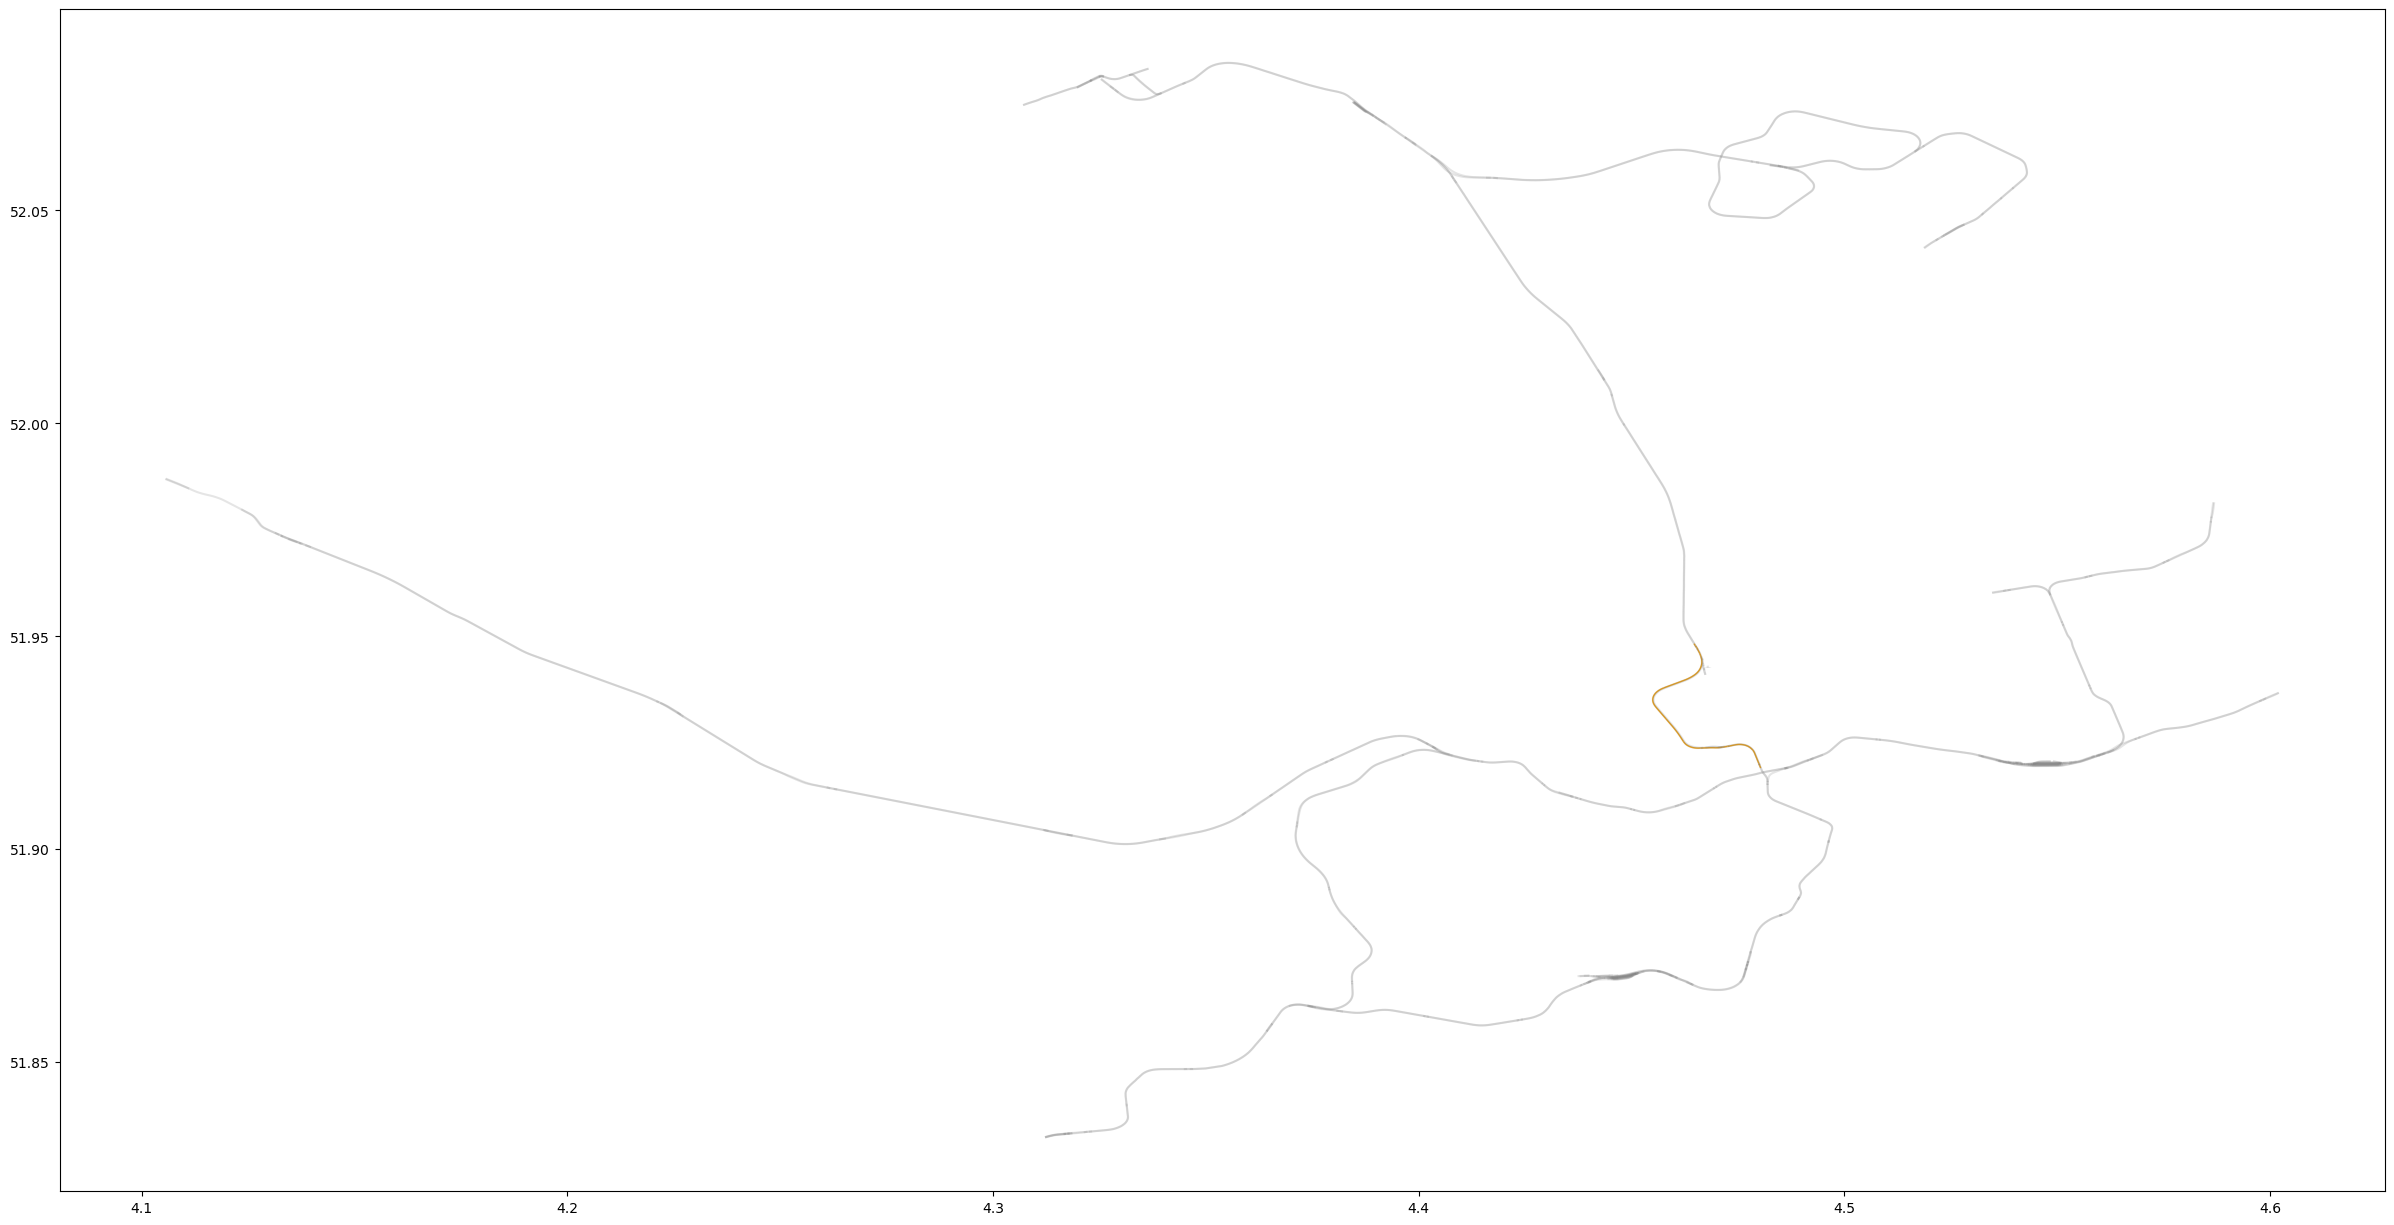

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

### find the route which the s_e nodes are on

In [36]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

In [37]:
s_on_route_ref

,ref
0,A
1,B
2,C
3,D
4,E


In [38]:
e_on_route_ref

,ref
0,E


### Make judgement of s_e_on_route_gdf

In [39]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of s_on_route is the same as e_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


In [40]:
s_on_route_ref

,ref
0,A
1,B
2,C
3,D
4,E


In [41]:
e_on_route_ref

,ref
0,E


### find those same routes when s_e_nodes are on different routes

In [42]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on one same route:  ref
4   E



,ref
4,E


### get all stations between s_e nodes and transfer nodes

In [43]:
def s_e_on_route_gdf(start_node, end_node, routes_df):
    routes_gdf = gpd.GeoDataFrame(routes_df.copy())
    s_e_node_gdf = gpd.GeoDataFrame(pd.concat([start_node.copy(), end_node.copy()],ignore_index=True))

    s_node_on_route_gdf = routes_gdf[routes_gdf.geometry.intersects(s_e_node_gdf.iloc[0].geometry)]
    e_node_on_route_gdf = routes_gdf[routes_gdf.geometry.intersects(s_e_node_gdf.iloc[1].geometry)]
    
    return s_node_on_route_gdf, e_node_on_route_gdf

In [44]:
s_node_on_route_gdf, e_node_on_route_gdf = s_e_on_route_gdf(start_node, end_node, sub_routes)

In [45]:
s_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
0,2785672,subway,Vlaardingen West,Metro A: Binnenhof => Vlaardingen West,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
2,2785674,subway,Hoek van Holland Strand,Metro B: Nesselande => Hoek van Holland Strand,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
5,2785677,subway,De Akkers,Metro C: De Terp => De Akkers,C,Rail Rotterdam,None,"MULTILINESTRING ((4.59945 51.93557, 4.59948 51..."


In [46]:
e_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
8,2777286,subway,Slinge,Metro E: Den Haag Centraal => Slinge,E,Rail Rotterdam,None,"MULTILINESTRING ((4.32649 52.07994, 4.32529 52..."


In [48]:
sub_routes

,osm_id,route,to,name,ref,network,service,geometry
0,2785672,subway,Vlaardingen West,Metro A: Binnenhof => Vlaardingen West,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
1,2785673,subway,Binnenhof,Metro A: Vlaardingen West => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.31574 51.90364, 4.31591 51..."
2,2785674,subway,Hoek van Holland Strand,Metro B: Nesselande => Hoek van Holland Strand,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
3,2785675,subway,Nesselande,Metro B: Hoek van Holland Strand => Nesselande,B,Rail Rotterdam,None,"MULTILINESTRING ((4.10702 51.98639, 4.10550 51..."
4,2785676,subway,De Terp,Metro C: De Akkers => De Terp,C,Rail Rotterdam,None,"MULTILINESTRING ((4.31898 51.83329, 4.31899 51..."
5,2785677,subway,De Akkers,Metro C: De Terp => De Akkers,C,Rail Rotterdam,None,"MULTILINESTRING ((4.59945 51.93557, 4.59948 51..."
6,2785504,subway,Rotterdam Centraal,Metro D: De Akkers => Rotterdam Centraal,D,Rail Rotterdam,None,"MULTILINESTRING ((4.31898 51.83329, 4.31899 51..."
7,2785505,subway,De Akkers,Metro D: Rotterdam Centraal => De Akkers,D,Rail Rotterdam,None,"MULTILINESTRING ((4.47052 51.92395, 4.47044 51..."
8,2777286,subway,Slinge,Metro E: Den Haag Centraal => Slinge,E,Rail Rotterdam,None,"MULTILINESTRING ((4.32649 52.07994, 4.32529 52..."
9,2777287,subway,Den Haag Centraal,Metro E: Slinge => Den Haag Centraal,E,Rail Rotterdam,None,"MULTILINESTRING ((4.47052 51.92395, 4.47044 51..."


In [53]:
s_e_same_route_df_new = pd.merge(s_e_same_routes_df,sub_routes,on='ref',how='left')
s_e_same_route_df_new

,ref,osm_id,route,to,name,network,service,geometry
0,E,2777286,subway,Slinge,Metro E: Den Haag Centraal => Slinge,Rail Rotterdam,None,"MULTILINESTRING ((4.32649 52.07994, 4.32529 52..."
1,E,2777287,subway,Den Haag Centraal,Metro E: Slinge => Den Haag Centraal,Rail Rotterdam,None,"MULTILINESTRING ((4.47052 51.92395, 4.47044 51..."


In [57]:
sub_routes_gdf = gpd.GeoDataFrame(sub_routes.copy())
s_e_node_gdf = gpd.GeoDataFrame(pd.concat([start_node.copy(), end_node.copy()],ignore_index=True))
e_node_on_route_gdf = sub_routes_gdf[sub_routes_gdf.geometry.intersects(s_e_node_gdf.iloc[1].geometry)]
e_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
8,2777286,subway,Slinge,Metro E: Den Haag Centraal => Slinge,E,Rail Rotterdam,None,"MULTILINESTRING ((4.32649 52.07994, 4.32529 52..."


In [62]:
s_e_same_route_gdf = pd.merge(s_e_same_route_df_new,e_node_on_route_gdf,how='inner')
s_e_same_route_gdf

,ref,osm_id,route,to,name,network,service,geometry
0,E,2777286,subway,Slinge,Metro E: Den Haag Centraal => Slinge,Rail Rotterdam,None,"MULTILINESTRING ((4.32649 52.07994, 4.32529 52..."


In [63]:
matched_route_all_stations_dict = all_stations_on_matched_route(sub_order_route_dict, s_e_same_route_gdf)
matched_route_all_stations_dict

{'Metro E: Den Haag Centraal => Slinge':     id                    name                      geometry     geo_x  \
 0   23                  Slinge    POINT (4.47766 51.8745956)   4.47766   
 1   24               Zuidplein        POINT (4.4883 51.8869)    4.4883   
 2   25               Maashaven  POINT (4.4947288 51.8971985)  4.494729   
 3    3               Rijnhaven  POINT (4.4967671 51.9035882)  4.496767   
 4   17         Wilhelminaplein  POINT (4.4925598 51.9077135)   4.49256   
 5   15              Leuvehaven   POINT (4.4819628 51.914034)  4.481963   
 6   18                   Beurs  POINT (4.4803477 51.9190178)  4.480348   
 7   16                Stadhuis  POINT (4.4784926 51.9232269)  4.478493   
 8   14      Rotterdam Centraal  POINT (4.4698293 51.9237763)  4.469829   
 9    8                Blijdorp  POINT (4.4580891 51.9305871)  4.458089   
 10  19          Melanchthonweg  POINT (4.4646984 51.9482363)  4.464698   
 11   9  Meijersplein / Airport  POINT (4.4621931 51.9558934

In [75]:
dfs = list(matched_route_all_stations_dict.values())
df1 = dfs[0]
df1

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
0,26,De Akkers,POINT (4.3198935 51.8333889),4.319894,51.833389,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3198935, 51.8333889)"
1,10,Heemraadlaan,POINT (4.3315954 51.8377527),4.331595,51.837753,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3315954, 51.8377527)"
2,8,Spijkenisse Centrum,POINT (4.3344414 51.8465547),4.334441,51.846555,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3344414, 51.8465547)"
3,11,Zalmplaat,POINT (4.3625755 51.8550454),4.362576,51.855045,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3625755, 51.8550454)"
4,16,Hoogvliet,POINT (4.3667549 51.8606237),4.366755,51.860624,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3667549, 51.8606237)"
5,14,Tussenwater,POINT (4.3768005 51.8626434),4.3768,51.862643,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3768005, 51.8626434)"
6,13,Poortugaal,POINT (4.3958008 51.8617402),4.395801,51.86174,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3958008, 51.8617402)"
7,12,Rhoon,POINT (4.4194841 51.8591504),4.419484,51.85915,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4194841, 51.8591504)"
8,15,Slinge,POINT (4.4776045 51.8745996),4.477604,51.8746,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4776045, 51.8745996)"
9,0,Zuidplein,POINT (4.4883 51.8869),4.4883,51.8869,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4883, 51.8869)"


In [ ]:
def s_e_same_route_gdf():
    s_e_same_route_df_new = pd.merge(sub_routes,s_e_same_routes_df,on='ref',how='left')

### get all nodes and id_pairs of nodes between s_e nodes

### calculate shortest path and plot

### find tranfer stations between different routes which s_e_nodes are on--transfer how many times????-twice

In [43]:
data1 = {'ref': ['D','E']}
# data2 = {'ref': ['A','B', 'C', 'D']}
data2 = {'ref': ['A','B','C']}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [44]:
s_e_same_routes_df12 = s_e_same_routes(df1,df2)
s_e_same_routes_df12

s_node and e_node are on totally different routes

The next step is to find transfer station of s_on_route:['D', 'E'] and e_on_route:['A', 'B', 'C']


,ref


In [70]:
type(sub_transfer_stations_df['ref'])

pandas.core.series.Series

In [71]:
sub_transfer_stations_df['ref']

0              A, B
1              A, B
2              A, B
3              A, B
4           A, B, C
5           A, B, C
6           A, B, C
7           A, B, C
8           A, B, C
9           A, B, C
10    A, B, C, D, E
11          A, B, C
12          A, B, C
13          A, B, C
14          A, B, C
15          A, B, C
16          A, B, C
17             A, B
18             A, B
19             A, B
20             A, B
21             A, B
22             C, D
23             C, D
24             C, D
25             C, D
26             C, D
27             C, D
28             D, E
29             D, E
30             D, E
31             D, E
32             D, E
33             D, E
34             D, E
35             D, E
Name: ref, dtype: object

In [72]:
sub_transfer_stations_list = sub_transfer_stations_df['ref'].tolist()
sub_transfer_stations_list

['A, B',
 'A, B',
 'A, B',
 'A, B',
 'A, B, C',
 'A, B, C',
 'A, B, C',
 'A, B, C',
 'A, B, C',
 'A, B, C',
 'A, B, C, D, E',
 'A, B, C',
 'A, B, C',
 'A, B, C',
 'A, B, C',
 'A, B, C',
 'A, B, C',
 'A, B',
 'A, B',
 'A, B',
 'A, B',
 'A, B',
 'C, D',
 'C, D',
 'C, D',
 'C, D',
 'C, D',
 'C, D',
 'D, E',
 'D, E',
 'D, E',
 'D, E',
 'D, E',
 'D, E',
 'D, E',
 'D, E']

In [80]:
data1 = ['A,B,C,D,E', 'A,B,D', 'C,D', 'D,E']
data2 = ['E,A', 'F,D', 'A,D']

# 将data1中的元素转换为集合
data1_sets = [set(item.split(',')) for item in data1]

for item2 in data2:
    set2 = set(item2.split(','))
    for i, set1 in enumerate(data1_sets):
        if set2.issubset(set1):
            print(f"data2的元素 '{item2}' 包含在 data1 的元素 '{data1[i]}' 中")
            break
    else:
        print(f"data2的元素 '{item2}' 未包含在任何data1的元素中")

data2的元素 'E,A' 包含在 data1 的元素 'A,B,C,D,E' 中
data2的元素 'F,D' 未包含在任何data1的元素中
data2的元素 'A,D' 包含在 data1 的元素 'A,B,C,D,E' 中


In [ ]:
s_e_on_route_pairs 

## Add columns to nodes--try to revise version1 failed

In [12]:
selected_routes = ['Metro A: Binnenhof => Vlaardingen West','Metro A: Vlaardingen West => Binnenhof','Metro B: Nesselande => Hoek van Holland Strand','Metro B: Hoek van Holland Strand => Nesselande','Metro C: De Akkers => De Terp','Metro C: De Terp => De Akkers','Metro D: De Akkers => Rotterdam Centraal','Metro D: Rotterdam Centraal => De Akkers','Metro E: Den Haag Centraal => Slinge','Metro E: Slinge => Den Haag Centraal']

In [13]:
sub_order_route_dict = {key: sub_order_route_dict[key] for key in selected_routes}
sub_order_route_dict

{'Metro A: Binnenhof => Vlaardingen West':     id                 name                      geometry     geo_x      geo_y
 0   47     Vlaardingen West  POINT (4.3150875 51.9038216)  4.315087  51.903822
 1    0  Vlaardingen Centrum  POINT (4.3435659 51.9031818)  4.343566  51.903182
 2    1     Vlaardingen Oost  POINT (4.3615059 51.9101388)  4.361506  51.910139
 3   22   Schiedam Nieuwland  POINT (4.3831887 51.9226748)  4.383189  51.922675
 4   16     Schiedam Centrum  POINT (4.4086615 51.9217737)  4.408662  51.921774
 5   45         Marconiplein  POINT (4.4328269 51.9132807)  4.432827  51.913281
 6   44           Delfshaven  POINT (4.4457184 51.9099984)  4.445718  51.909998
 7   43            Coolhaven  POINT (4.4582471 51.9095462)  4.458247  51.909546
 8   18             Dijkzigt  POINT (4.4660974 51.9122493)  4.466097  51.912249
 9   17      Eendrachtsplein  POINT (4.4737244 51.9163496)  4.473724   51.91635
 10   7                Beurs  POINT (4.4803692 51.9178996)  4.480369    51.917

In [14]:
sub_routes = sub_routes[sub_routes['name'].isin(selected_routes)].reset_index(drop=True)

In [15]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [16]:
sub_order_route_dict

{'Metro A: Binnenhof => Vlaardingen West':     id                 name                      geometry     geo_x  \
 0   47     Vlaardingen West  POINT (4.3150875 51.9038216)  4.315087   
 1    0  Vlaardingen Centrum  POINT (4.3435659 51.9031818)  4.343566   
 2    1     Vlaardingen Oost  POINT (4.3615059 51.9101388)  4.361506   
 3   22   Schiedam Nieuwland  POINT (4.3831887 51.9226748)  4.383189   
 4   16     Schiedam Centrum  POINT (4.4086615 51.9217737)  4.408662   
 5   45         Marconiplein  POINT (4.4328269 51.9132807)  4.432827   
 6   44           Delfshaven  POINT (4.4457184 51.9099984)  4.445718   
 7   43            Coolhaven  POINT (4.4582471 51.9095462)  4.458247   
 8   18             Dijkzigt  POINT (4.4660974 51.9122493)  4.466097   
 9   17      Eendrachtsplein  POINT (4.4737244 51.9163496)  4.473724   
 10   7                Beurs  POINT (4.4803692 51.9178996)  4.480369   
 11   2                Blaak  POINT (4.4890906 51.9200477)  4.489091   
 12   5            Oos

In [17]:
aggregation_functions = {
    'name': 'first',
    # 'coordinate_value': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [18]:
# sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, aggregation_functions, nodes)

In [19]:
# def add_columns_to_nodes(order_route_dict, aggregation_functions, nodes):
        
#     for key, df in order_route_dict.items():
#         new_df = create_tuple_column(df)
#         order_route_dict[key] = new_df
        
#     order_route_stations_df = pd.concat(order_route_dict.values()).reset_index(drop=True)
#     new_order_route_stations_df = order_route_stations_df.groupby('coordinate_value').agg(aggregation_functions).reset_index()
#     new_nodes = pd.merge(nodes, new_order_route_stations_df, on='geometry', how='outer')
#     new_nodes['transfer'] = new_nodes['ref'].apply(check_ref)
#     new_nodes['transfer'] = new_nodes['transfer'].apply(check_transfer)
    
#     new_nodes_gdf = gpd.GeoDataFrame(new_nodes.copy())
#     new_nodes_gdf['geo_x'] = new_nodes_gdf.geometry.x
#     new_nodes_gdf['geo_y'] = new_nodes_gdf.geometry.y
#     new_nodes_gdf['coordinate_value'] = list(zip(new_nodes_gdf['geo_x'], new_nodes_gdf['geo_y']))
#     new_nodes = new_nodes_gdf
#     new_nodes = new_nodes.dropna(subset=['name'])
    
#     return new_nodes

In [20]:
# for key, df in order_route_dict.items():
#     new_df = create_tuple_column(df)
#     order_route_dict[key] = new_df
    
# order_route_stations_df = pd.concat(order_route_dict.values()).reset_index(drop=True)
# new_order_route_stations_df = order_route_stations_df.groupby('coordinate_value').agg(aggregation_functions).reset_index()

In [21]:
for key, df in sub_order_route_dict.items():
        new_df = create_tuple_column(df)
        sub_order_route_dict[key] = new_df

sub_order_route_stations_df = pd.concat(sub_order_route_dict.values()).reset_index(drop=True)
# sub_order_route_stations_df.to_excel('./sub_order_route_stations_df1.xlsx',header=True,index=False)
# sub_order_route_stations_df = sub_order_route_stations_df.drop_duplicates(subset='coordinate_value')
# sub_order_route_stations_df.to_excel('./sub_order_route_stations_df2.xlsx',header=True,index=False)
sub_new_order_route_stations_df = sub_order_route_stations_df.groupby('coordinate_value').agg(aggregation_functions).reset_index()
sub_new_order_route_stations_df

,coordinate_value,name,geometry,geo_x,geo_y,route_name_list,ref,route
0,"(4.1056731, 51.9868574)",Hoek van Holland Strand,POINT (4.1056731 51.9868574),4.105673,51.986857,Metro B: Hoek van Holland Strand => Nesselande,B,subway
1,"(4.1057812, 51.9869455)",Hoek van Holland Strand,POINT (4.1057812 51.9869455),4.105781,51.986945,Metro B: Nesselande => Hoek van Holland Strand,B,subway
2,"(4.1273157, 51.9770415)",Hoek van Holland Haven,POINT (4.1273157 51.9770415),4.127316,51.977041,Metro B: Nesselande => Hoek van Holland Strand,B,subway
3,"(4.1275874, 51.9764225)",Hoek van Holland Haven,POINT (4.1275874 51.9764225),4.127587,51.976422,Metro B: Hoek van Holland Strand => Nesselande,B,subway
4,"(4.2246083, 51.9326957)",Steendijkpolder,POINT (4.2246083 51.9326957),4.224608,51.932696,Metro B: Hoek van Holland Strand => Nesselande,B,subway
...,...,...,...,...,...,...,...,...
146,"(4.5866641, 51.9796734)",Nesselande,POINT (4.5866641 51.9796734),4.586664,51.979673,Metro B: Hoek van Holland Strand => Nesselande,B,subway
147,"(4.5895479, 51.931394)",Capelle Centrum,POINT (4.5895479 51.931394),4.589548,51.931394,Metro C: De Terp => De Akkers,C,subway
148,"(4.5895721, 51.9313618)",Capelle Centrum,POINT (4.5895721 51.9313618),4.589572,51.931362,Metro C: De Akkers => De Terp,C,subway
149,"(4.600555, 51.9360939)",De Terp,POINT (4.600555 51.9360939),4.600555,51.936094,Metro C: De Terp => De Akkers,C,subway


In [22]:
# sub_new_order_route_stations_df.to_excel('./sub_new_order_route_stations_df2drop.xlsx',header=True,index=False)

In [23]:
sub_new_order_route_stations_df.to_excel('./sub_new_order_route_stations_df1.xlsx',header=True,index=False)

In [24]:
sub_new_nodes = pd.merge(nodes, sub_new_order_route_stations_df, on='geometry', how='outer')
sub_new_nodes_gdf = gpd.GeoDataFrame(sub_new_nodes.copy())
sub_new_nodes_gdf['geo_x'] = sub_new_nodes_gdf.geometry.x
sub_new_nodes_gdf['geo_y'] = sub_new_nodes_gdf.geometry.y
sub_new_nodes_gdf['coordinate_value'] = list(zip(sub_new_nodes_gdf['geo_x'], sub_new_nodes_gdf['geo_y']))
sub_new_nodes = sub_new_nodes_gdf
sub_new_nodes = sub_new_nodes.dropna(subset=['name'])
sub_new_nodes

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref,route
5,POINT (4.39401 51.92120),2,5,"(4.3940136, 51.921202)",Parkweg,4.394014,51.921202,Metro C: De Akkers => De Terp,C,subway
10,POINT (4.49677 51.90359),2,10,"(4.4967671, 51.9035882)",Rijnhaven,4.496767,51.903588,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway
36,POINT (4.39579 51.86171),2,36,"(4.3957852, 51.8617079)",Poortugaal,4.395785,51.861708,Metro D: De Akkers => Rotterdam Centraal,D,subway
45,POINT (4.41950 51.85912),2,45,"(4.4194958, 51.8591157)",Rhoon,4.419496,51.859116,Metro D: De Akkers => Rotterdam Centraal,D,subway
89,POINT (4.31990 51.83328),2,89,"(4.3199021, 51.8332768)",De Akkers,4.319902,51.833277,"Metro C: De Akkers => De Terp, Metro D: De Akk...","C, D",subway
...,...,...,...,...,...,...,...,...,...,...
1386,POINT (4.31503 51.90372),2,1386,"(4.3150312, 51.9037243)",Vlaardingen West,4.315031,51.903724,Metro B: Hoek van Holland Strand => Nesselande,B,subway
1387,POINT (4.23521 51.92617),2,1387,"(4.2352056, 51.9261681)",Maassluis West,4.235206,51.926168,Metro B: Hoek van Holland Strand => Nesselande,B,subway
1388,POINT (4.12759 51.97642),2,1388,"(4.1275874, 51.9764225)",Hoek van Holland Haven,4.127587,51.976422,Metro B: Hoek van Holland Strand => Nesselande,B,subway
1389,POINT (4.12732 51.97704),2,1389,"(4.1273157, 51.9770415)",Hoek van Holland Haven,4.127316,51.977041,Metro B: Nesselande => Hoek van Holland Strand,B,subway


In [25]:
sub_new_nodes.to_excel('./sub_new_nodes906_1.xlsx',header=True,index=False)

In [26]:
# add_transfer_to_new_nodes

In [27]:
nodes_ref_transfer = sub_new_nodes.copy()
nodes_ref_transfer = nodes_ref_transfer[['name','ref']]
nodes_ref_transfer = nodes_ref_transfer.drop_duplicates()
nodes_ref_transfer.reset_index(drop=True,inplace=True)
nodes_ref_transfer = nodes_ref_transfer.groupby('name').agg({'ref': lambda x: ', '.join(x)})
nodes_ref_transfer.reset_index(inplace=True)
nodes_ref_transfer

,name,ref
0,Alexander,"A, B"
1,Ambachtsland,B
2,Berkel Westpolder,E
3,Beurs,"A, B, C, D, E"
4,Binnenhof,A
...,...,...
66,Voorburg 't Loo,E
67,Voorschoterlaan,"A, B, C"
68,Wilhelminaplein,"D, E"
69,Zalmplaat,"C, D"


In [28]:
sub_new_nodes = pd.merge(sub_new_nodes, nodes_ref_transfer, on='name', how='left')
sub_new_nodes

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref_x,route,ref_y
0,POINT (4.39401 51.92120),2,5,"(4.3940136, 51.921202)",Parkweg,4.394014,51.921202,Metro C: De Akkers => De Terp,C,subway,C
1,POINT (4.49677 51.90359),2,10,"(4.4967671, 51.9035882)",Rijnhaven,4.496767,51.903588,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"D, E"
2,POINT (4.39579 51.86171),2,36,"(4.3957852, 51.8617079)",Poortugaal,4.395785,51.861708,Metro D: De Akkers => Rotterdam Centraal,D,subway,D
3,POINT (4.41950 51.85912),2,45,"(4.4194958, 51.8591157)",Rhoon,4.419496,51.859116,Metro D: De Akkers => Rotterdam Centraal,D,subway,D
4,POINT (4.31990 51.83328),2,89,"(4.3199021, 51.8332768)",De Akkers,4.319902,51.833277,"Metro C: De Akkers => De Terp, Metro D: De Akk...","C, D",subway,"C, D"
...,...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.31503 51.90372),2,1386,"(4.3150312, 51.9037243)",Vlaardingen West,4.315031,51.903724,Metro B: Hoek van Holland Strand => Nesselande,B,subway,"A, A, B"
147,POINT (4.23521 51.92617),2,1387,"(4.2352056, 51.9261681)",Maassluis West,4.235206,51.926168,Metro B: Hoek van Holland Strand => Nesselande,B,subway,B
148,POINT (4.12759 51.97642),2,1388,"(4.1275874, 51.9764225)",Hoek van Holland Haven,4.127587,51.976422,Metro B: Hoek van Holland Strand => Nesselande,B,subway,B
149,POINT (4.12732 51.97704),2,1389,"(4.1273157, 51.9770415)",Hoek van Holland Haven,4.127316,51.977041,Metro B: Nesselande => Hoek van Holland Strand,B,subway,B


In [29]:
sub_new_nodes.to_excel('./sub_new_nodes906_2.xlsx',header=True,index=False)

In [30]:
sub_new_nodes['transfer'] = sub_new_nodes['ref_y'].apply(check_ref)
sub_new_nodes['transfer'] = sub_new_nodes['transfer'].apply(check_transfer)

In [31]:
sub_new_nodes

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref_x,route,ref_y,transfer
0,POINT (4.39401 51.92120),2,5,"(4.3940136, 51.921202)",Parkweg,4.394014,51.921202,Metro C: De Akkers => De Terp,C,subway,C,None
1,POINT (4.49677 51.90359),2,10,"(4.4967671, 51.9035882)",Rijnhaven,4.496767,51.903588,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"D, E","(D, E)"
2,POINT (4.39579 51.86171),2,36,"(4.3957852, 51.8617079)",Poortugaal,4.395785,51.861708,Metro D: De Akkers => Rotterdam Centraal,D,subway,D,None
3,POINT (4.41950 51.85912),2,45,"(4.4194958, 51.8591157)",Rhoon,4.419496,51.859116,Metro D: De Akkers => Rotterdam Centraal,D,subway,D,None
4,POINT (4.31990 51.83328),2,89,"(4.3199021, 51.8332768)",De Akkers,4.319902,51.833277,"Metro C: De Akkers => De Terp, Metro D: De Akk...","C, D",subway,"C, D","(C, D)"
...,...,...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.31503 51.90372),2,1386,"(4.3150312, 51.9037243)",Vlaardingen West,4.315031,51.903724,Metro B: Hoek van Holland Strand => Nesselande,B,subway,"A, A, B","(A, A, B)"
147,POINT (4.23521 51.92617),2,1387,"(4.2352056, 51.9261681)",Maassluis West,4.235206,51.926168,Metro B: Hoek van Holland Strand => Nesselande,B,subway,B,None
148,POINT (4.12759 51.97642),2,1388,"(4.1275874, 51.9764225)",Hoek van Holland Haven,4.127587,51.976422,Metro B: Hoek van Holland Strand => Nesselande,B,subway,B,None
149,POINT (4.12732 51.97704),2,1389,"(4.1273157, 51.9770415)",Hoek van Holland Haven,4.127316,51.977041,Metro B: Nesselande => Hoek van Holland Strand,B,subway,B,None


In [32]:
sub_new_nodes.to_excel('./sub_new_nodes907.xlsx',header = True, index = False)

## Add columns to nodes--try to revise version2 successed

In [12]:
selected_routes = ['Metro A: Binnenhof => Vlaardingen West','Metro A: Vlaardingen West => Binnenhof','Metro B: Nesselande => Hoek van Holland Strand','Metro B: Hoek van Holland Strand => Nesselande','Metro C: De Akkers => De Terp','Metro C: De Terp => De Akkers','Metro D: De Akkers => Rotterdam Centraal','Metro D: Rotterdam Centraal => De Akkers','Metro E: Den Haag Centraal => Slinge','Metro E: Slinge => Den Haag Centraal']

In [13]:
sub_order_route_dict = {key: sub_order_route_dict[key] for key in selected_routes}
sub_order_route_dict

{'Metro A: Binnenhof => Vlaardingen West':     id                 name                      geometry     geo_x      geo_y
 0   47     Vlaardingen West  POINT (4.3150875 51.9038216)  4.315087  51.903822
 1    0  Vlaardingen Centrum  POINT (4.3435659 51.9031818)  4.343566  51.903182
 2    1     Vlaardingen Oost  POINT (4.3615059 51.9101388)  4.361506  51.910139
 3   22   Schiedam Nieuwland  POINT (4.3831887 51.9226748)  4.383189  51.922675
 4   16     Schiedam Centrum  POINT (4.4086615 51.9217737)  4.408662  51.921774
 5   45         Marconiplein  POINT (4.4328269 51.9132807)  4.432827  51.913281
 6   44           Delfshaven  POINT (4.4457184 51.9099984)  4.445718  51.909998
 7   43            Coolhaven  POINT (4.4582471 51.9095462)  4.458247  51.909546
 8   18             Dijkzigt  POINT (4.4660974 51.9122493)  4.466097  51.912249
 9   17      Eendrachtsplein  POINT (4.4737244 51.9163496)  4.473724   51.91635
 10   7                Beurs  POINT (4.4803692 51.9178996)  4.480369    51.917

In [14]:
sub_routes = sub_routes[sub_routes['name'].isin(selected_routes)].reset_index(drop=True)

In [15]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [16]:
sub_order_route_dict

{'Metro A: Binnenhof => Vlaardingen West':     id                 name                      geometry     geo_x  \
 0   47     Vlaardingen West  POINT (4.3150875 51.9038216)  4.315087   
 1    0  Vlaardingen Centrum  POINT (4.3435659 51.9031818)  4.343566   
 2    1     Vlaardingen Oost  POINT (4.3615059 51.9101388)  4.361506   
 3   22   Schiedam Nieuwland  POINT (4.3831887 51.9226748)  4.383189   
 4   16     Schiedam Centrum  POINT (4.4086615 51.9217737)  4.408662   
 5   45         Marconiplein  POINT (4.4328269 51.9132807)  4.432827   
 6   44           Delfshaven  POINT (4.4457184 51.9099984)  4.445718   
 7   43            Coolhaven  POINT (4.4582471 51.9095462)  4.458247   
 8   18             Dijkzigt  POINT (4.4660974 51.9122493)  4.466097   
 9   17      Eendrachtsplein  POINT (4.4737244 51.9163496)  4.473724   
 10   7                Beurs  POINT (4.4803692 51.9178996)  4.480369   
 11   2                Blaak  POINT (4.4890906 51.9200477)  4.489091   
 12   5            Oos

In [18]:
for key, df in sub_order_route_dict.items():
        new_df = create_tuple_column(df)
        sub_order_route_dict[key] = new_df

sub_order_route_stations_df = pd.concat(sub_order_route_dict.values()).reset_index(drop=True)
sub_order_route_stations_df.to_excel('./sub_order_route_stations_df_add0.xlsx',header=True,index=False)

In [19]:
stations_name_ref = sub_order_route_stations_df.copy()
stations_name_ref = stations_name_ref[['name','ref']]
stations_name_ref.to_excel('./stations_name_ref.xlsx',header=True,index=False)

In [20]:
stations_name_ref = stations_name_ref.drop_duplicates()
stations_name_ref

,name,ref
0,Vlaardingen West,A
1,Vlaardingen Centrum,A
2,Vlaardingen Oost,A
3,Schiedam Nieuwland,A
4,Schiedam Centrum,A
...,...,...
216,Forepark,E
217,Leidschendam-Voorburg,E
218,Voorburg 't Loo,E
219,Den Haag Laan van NOI,E


In [21]:
stations_name_ref.reset_index(drop=True,inplace=True)
stations_name_ref = stations_name_ref.groupby('name').agg({'ref': lambda x: ', '.join(x)})
stations_name_ref.reset_index(inplace=True)
stations_name_ref

,name,ref
0,Alexander,"A, B"
1,Ambachtsland,B
2,Berkel Westpolder,E
3,Beurs,"A, B, C, D, E"
4,Binnenhof,A
...,...,...
66,Voorburg 't Loo,E
67,Voorschoterlaan,"A, B, C"
68,Wilhelminaplein,"D, E"
69,Zalmplaat,"C, D"


In [22]:
sub_order_route_stations_df = pd.merge(sub_order_route_stations_df, stations_name_ref, on='name', how='left')
sub_order_route_stations_df

,id,name,geometry,geo_x,geo_y,route_name_list,ref_x,route,coordinate_value,ref_y
0,47,Vlaardingen West,POINT (4.3150875 51.9038216),4.315087,51.903822,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3150875, 51.9038216)","A, B"
1,0,Vlaardingen Centrum,POINT (4.3435659 51.9031818),4.343566,51.903182,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3435659, 51.9031818)","A, B"
2,1,Vlaardingen Oost,POINT (4.3615059 51.9101388),4.361506,51.910139,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3615059, 51.9101388)","A, B"
3,22,Schiedam Nieuwland,POINT (4.3831887 51.9226748),4.383189,51.922675,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3831887, 51.9226748)","A, B"
4,16,Schiedam Centrum,POINT (4.4086615 51.9217737),4.408662,51.921774,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.4086615, 51.9217737)","A, B, C"
...,...,...,...,...,...,...,...,...,...,...
239,16,Wilhelminaplein,POINT (4.4925955 51.9077405),4.492596,51.907741,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4925955, 51.9077405)","D, E"
240,19,Rijnhaven,POINT (4.4968239 51.90358),4.496824,51.90358,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4968239, 51.90358)","D, E"
241,2,Maashaven,POINT (4.4947847 51.8971895),4.494785,51.89719,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4947847, 51.8971895)","D, E"
242,18,Zuidplein,POINT (4.4883544 51.8868895),4.488354,51.88689,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4883544, 51.8868895)","D, E"


In [23]:
sub_order_route_stations_df.to_excel('./sub_order_route_stations_df_add1.xlsx',header=True,index=False)

In [24]:
sub_order_route_stations_df = sub_order_route_stations_df.drop_duplicates(subset='coordinate_value').reset_index(drop=True)
sub_order_route_stations_df

,id,name,geometry,geo_x,geo_y,route_name_list,ref_x,route,coordinate_value,ref_y
0,47,Vlaardingen West,POINT (4.3150875 51.9038216),4.315087,51.903822,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3150875, 51.9038216)","A, B"
1,0,Vlaardingen Centrum,POINT (4.3435659 51.9031818),4.343566,51.903182,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3435659, 51.9031818)","A, B"
2,1,Vlaardingen Oost,POINT (4.3615059 51.9101388),4.361506,51.910139,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3615059, 51.9101388)","A, B"
3,22,Schiedam Nieuwland,POINT (4.3831887 51.9226748),4.383189,51.922675,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3831887, 51.9226748)","A, B"
4,16,Schiedam Centrum,POINT (4.4086615 51.9217737),4.408662,51.921774,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.4086615, 51.9217737)","A, B, C"
...,...,...,...,...,...,...,...,...,...,...
146,12,Rodenrijs,POINT (4.4608735 51.9754027),4.460873,51.975403,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4608735, 51.9754027)",E
147,8,Meijersplein / Airport,POINT (4.4622518 51.955892),4.462252,51.955892,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4622518, 51.955892)",E
148,20,Melanchthonweg,POINT (4.4644824 51.9486955),4.464482,51.948695,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4644824, 51.9486955)",E
149,7,Blijdorp,POINT (4.4582602 51.9306444),4.45826,51.930644,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4582602, 51.9306444)",E


In [25]:
sub_order_route_stations_df.to_excel('./sub_order_route_stations_df_add2.xlsx',header=True,index=False)

In [26]:
sub_order_route_stations_df = sub_order_route_stations_df[['name','geometry','geo_x','geo_y','coordinate_value','route_name_list','route','ref_y']]
sub_order_route_stations_df

,name,geometry,geo_x,geo_y,coordinate_value,route_name_list,route,ref_y
0,Vlaardingen West,POINT (4.3150875 51.9038216),4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
1,Vlaardingen Centrum,POINT (4.3435659 51.9031818),4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
2,Vlaardingen Oost,POINT (4.3615059 51.9101388),4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
3,Schiedam Nieuwland,POINT (4.3831887 51.9226748),4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
4,Schiedam Centrum,POINT (4.4086615 51.9217737),4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C"
...,...,...,...,...,...,...,...,...
146,Rodenrijs,POINT (4.4608735 51.9754027),4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E
147,Meijersplein / Airport,POINT (4.4622518 51.955892),4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E
148,Melanchthonweg,POINT (4.4644824 51.9486955),4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E
149,Blijdorp,POINT (4.4582602 51.9306444),4.45826,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E


In [27]:
sub_order_route_stations_df.rename(columns={'ref_y': 'ref'}, inplace=True)
sub_order_route_stations_df

,name,geometry,geo_x,geo_y,coordinate_value,route_name_list,route,ref
0,Vlaardingen West,POINT (4.3150875 51.9038216),4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
1,Vlaardingen Centrum,POINT (4.3435659 51.9031818),4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
2,Vlaardingen Oost,POINT (4.3615059 51.9101388),4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
3,Schiedam Nieuwland,POINT (4.3831887 51.9226748),4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
4,Schiedam Centrum,POINT (4.4086615 51.9217737),4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C"
...,...,...,...,...,...,...,...,...
146,Rodenrijs,POINT (4.4608735 51.9754027),4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E
147,Meijersplein / Airport,POINT (4.4622518 51.955892),4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E
148,Melanchthonweg,POINT (4.4644824 51.9486955),4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E
149,Blijdorp,POINT (4.4582602 51.9306444),4.45826,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E


In [28]:
sub_new_nodes = pd.merge(nodes, sub_order_route_stations_df, on='geometry', how='right')
sub_new_nodes_gdf = gpd.GeoDataFrame(sub_new_nodes.copy())
sub_new_nodes_gdf['geo_x'] = sub_new_nodes_gdf.geometry.x
sub_new_nodes_gdf['geo_y'] = sub_new_nodes_gdf.geometry.y
sub_new_nodes_gdf['coordinate_value'] = list(zip(sub_new_nodes_gdf['geo_x'], sub_new_nodes_gdf['geo_y']))
sub_new_nodes = sub_new_nodes_gdf
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref
0,POINT (4.31509 51.90382),2,1108,Vlaardingen West,4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
1,POINT (4.34357 51.90318),2,1280,Vlaardingen Centrum,4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
2,POINT (4.36151 51.91014),2,1281,Vlaardingen Oost,4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
3,POINT (4.38319 51.92267),2,966,Schiedam Nieuwland,4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
4,POINT (4.40866 51.92177),2,670,Schiedam Centrum,4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C"
...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.46087 51.97540),2,1308,Rodenrijs,4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E
147,POINT (4.46225 51.95589),2,1300,Meijersplein / Airport,4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E
148,POINT (4.46448 51.94870),2,1375,Melanchthonweg,4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E
149,POINT (4.45826 51.93064),2,1299,Blijdorp,4.458260,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E


In [29]:
sub_new_nodes['transfer'] = None
def fill_transfer(row):
    if ',' in row['ref']:
        return row['ref']
    else:
        return None

sub_new_nodes['transfer'] = sub_new_nodes.apply(fill_transfer, axis=1)

In [30]:
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.31509 51.90382),2,1108,Vlaardingen West,4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
1,POINT (4.34357 51.90318),2,1280,Vlaardingen Centrum,4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
2,POINT (4.36151 51.91014),2,1281,Vlaardingen Oost,4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
3,POINT (4.38319 51.92267),2,966,Schiedam Nieuwland,4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
4,POINT (4.40866 51.92177),2,670,Schiedam Centrum,4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C","A, B, C"
...,...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.46087 51.97540),2,1308,Rodenrijs,4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E,None
147,POINT (4.46225 51.95589),2,1300,Meijersplein / Airport,4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E,None
148,POINT (4.46448 51.94870),2,1375,Melanchthonweg,4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E,None
149,POINT (4.45826 51.93064),2,1299,Blijdorp,4.458260,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E,None


In [31]:
sub_new_nodes.to_excel('./sub_new_nodes911.xlsx',header = True, index = False)

In [31]:
# add_transfer(tuple)_to_new_nodes

In [32]:
sub_new_nodes['transfer'] = sub_new_nodes['ref'].apply(check_ref)
sub_new_nodes['transfer'] = sub_new_nodes['transfer'].apply(check_transfer)

In [33]:
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.31509 51.90382),2,1108,Vlaardingen West,4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","(A, B)"
1,POINT (4.34357 51.90318),2,1280,Vlaardingen Centrum,4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","(A, B)"
2,POINT (4.36151 51.91014),2,1281,Vlaardingen Oost,4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","(A, B)"
3,POINT (4.38319 51.92267),2,966,Schiedam Nieuwland,4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","(A, B)"
4,POINT (4.40866 51.92177),2,670,Schiedam Centrum,4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C","(A, B, C)"
...,...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.46087 51.97540),2,1308,Rodenrijs,4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E,None
147,POINT (4.46225 51.95589),2,1300,Meijersplein / Airport,4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E,None
148,POINT (4.46448 51.94870),2,1375,Melanchthonweg,4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E,None
149,POINT (4.45826 51.93064),2,1299,Blijdorp,4.458260,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E,None


In [34]:
sub_new_nodes.to_excel('./sub_new_nodes911_1.xlsx',header = True, index = False)

## Add columns to edges--no revise

In [35]:
sub_shortest_path_edges = {key: sub_shortest_path_edges[key] for key in selected_routes}

In [36]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [37]:
sub_shortest_path_edges

{'Metro A: Binnenhof => Vlaardingen West':         osm_id                                           geometry     railway  \
 0    459077281  LINESTRING (4.3435659 51.9031818, 4.3433886 51...  light_rail   
 1    459077281  LINESTRING (4.3390156 51.9022441, 4.3381403 51...  light_rail   
 2    662480800  LINESTRING (4.3187193 51.9031456, 4.3173213 51...  light_rail   
 3    663473523  LINESTRING (4.3208563 51.9027244, 4.3187193 51...  light_rail   
 4    663473525  LINESTRING (4.3150875 51.9038216, 4.3157774 51...  light_rail   
 ..         ...                                                ...         ...   
 104  687533232  LINESTRING (4.5474841 51.9608884, 4.547574 51....  light_rail   
 105  687533233  LINESTRING (4.5472086 51.9610784, 4.5473829 51...  light_rail   
 106  207627814  LINESTRING (4.5356879 51.9602878, 4.5362277 51...  light_rail   
 107  493956404  LINESTRING (4.5390861 51.9608809, 4.5393034 51...  light_rail   
 108  687533230  LINESTRING (4.5372953 51.9605876, 4.539

In [38]:
aggregation_functions = {
    'geometry': 'first',
    # 'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [39]:
sub_new_edges =  add_columns_to_edges(sub_shortest_path_edges, aggregation_functions, sub_edges)

In [40]:
sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,route_name_list,ref,route
0,6305896,"LINESTRING (4.5164659 52.0638003, 4.5158864 52...",light_rail,None,0,0,1,56.959307,0.002278,56,"(0, 1)","(1, 0)",NaN,NaN,NaN
1,6305933,"LINESTRING (4.403601 52.0622859, 4.4037107 52....",light_rail,None,1,2,3,417.845193,0.016714,417,"(2, 3)","(3, 2)",NaN,NaN,NaN
2,6307148,"LINESTRING (4.3767271 51.9129032, 4.3777532 51...",subway,None,2,4,1273,621.092211,0.024844,621,"(4, 1273)","(1273, 4)",Metro C: De Akkers => De Terp,C,subway
3,6307148,"LINESTRING (4.384684 51.9155218, 4.3847438 51....",subway,None,3,1273,5,918.756300,0.036750,918,"(1273, 5)","(5, 1273)",Metro C: De Akkers => De Terp,C,subway
4,6307235,"LINESTRING (4.371436 51.9054786, 4.3714573 51....",subway,None,4,6,832,14.645059,0.000586,14,"(6, 832)","(832, 6)","Metro C: De Akkers => De Terp, Metro C: De Ter...","C, C",subway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1162431256,"LINESTRING (4.440498 52.015125, 4.4403605 52.0...",light_rail,None,1574,1265,1304,651.898528,0.026076,651,"(1265, 1304)","(1304, 1265)",Metro E: Slinge => Den Haag Centraal,E,subway
1575,1162431256,"LINESTRING (4.4369993 52.0205733, 4.4367535 52...",light_rail,None,1575,1304,435,236.651906,0.009466,236,"(1304, 435)","(435, 1304)",Metro E: Slinge => Den Haag Centraal,E,subway
1576,1162431257,"LINESTRING (4.4404337 52.0151102, 4.4404524 52...",light_rail,None,1576,1252,1266,3.523553,0.000141,3,"(1252, 1266)","(1266, 1252)",Metro E: Den Haag Centraal => Slinge,E,subway
1577,1162431262,"LINESTRING (4.4405164 52.0150958, 4.440498 52....",light_rail,None,1577,1253,1265,3.484981,0.000139,3,"(1253, 1265)","(1265, 1253)",Metro E: Slinge => Den Haag Centraal,E,subway


## Add columns to edges--try to revise version successed

In [20]:
sub_shortest_path_edges = {key: sub_shortest_path_edges[key] for key in selected_routes}

In [21]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [22]:
sub_shortest_path_edges

{'Metro A: Binnenhof => Vlaardingen West':         osm_id                                           geometry     railway  \
 0    459077281  LINESTRING (4.3435659 51.9031818, 4.3433886 51...  light_rail   
 1    459077281  LINESTRING (4.3390156 51.9022441, 4.3381403 51...  light_rail   
 2    662480800  LINESTRING (4.3187193 51.9031456, 4.3173213 51...  light_rail   
 3    663473523  LINESTRING (4.3208563 51.9027244, 4.3187193 51...  light_rail   
 4    663473525  LINESTRING (4.3150875 51.9038216, 4.3157774 51...  light_rail   
 ..         ...                                                ...         ...   
 104  687533232  LINESTRING (4.5474841 51.9608884, 4.547574 51....  light_rail   
 105  687533233  LINESTRING (4.5472086 51.9610784, 4.5473829 51...  light_rail   
 106  207627814  LINESTRING (4.5356879 51.9602878, 4.5362277 51...  light_rail   
 107  493956404  LINESTRING (4.5390861 51.9608809, 4.5393034 51...  light_rail   
 108  687533230  LINESTRING (4.5372953 51.9605876, 4.539

In [39]:
sub_shortest_path_edges_df = pd.concat(sub_shortest_path_edges.values()).reset_index(drop=True)

In [40]:
sub_shortest_path_edges_df

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,ref,route
0,459077281,"LINESTRING (4.3435659 51.9031818, 4.3433886 51...",light_rail,None,1155,1280,1091,330.183151,0.013207,330,"(1280, 1091)","(1091, 1280)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway
1,459077281,"LINESTRING (4.3390156 51.9022441, 4.3381403 51...",light_rail,None,1156,1091,977,1259.569852,0.050383,1259,"(1091, 977)","(977, 1091)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway
2,662480800,"LINESTRING (4.3187193 51.9031456, 4.3173213 51...",light_rail,spur,1297,982,1083,99.695884,0.003988,99,"(982, 1083)","(1083, 982)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway
3,663473523,"LINESTRING (4.3208563 51.9027244, 4.3187193 51...",light_rail,None,1318,1105,982,154.321897,0.006173,154,"(1105, 982)","(982, 1105)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway
4,663473525,"LINESTRING (4.3150875 51.9038216, 4.3157774 51...",light_rail,None,1320,1108,1083,161.314225,0.006453,161,"(1108, 1083)","(1083, 1108)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,184173356,"LINESTRING (4.4867855 51.885111, 4.4868814 51....",subway,None,268,250,1372,228.183251,0.009127,228,"(250, 1372)","(1372, 250)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway
1355,309656219,"LINESTRING (4.4780641 51.8759905, 4.4782056 51...",subway,None,906,838,1209,1082.253187,0.043290,1082,"(838, 1209)","(1209, 838)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway
1356,309656219,"LINESTRING (4.4847378 51.8843139, 4.4848126 51...",subway,None,907,1209,1207,54.353582,0.002174,54,"(1209, 1207)","(1207, 1209)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway
1357,309656219,"LINESTRING (4.485427 51.8845523, 4.4858518 51....",subway,None,908,1207,250,112.491968,0.004500,112,"(1207, 250)","(250, 1207)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway


In [41]:
sub_shortest_path_edges_df.to_excel('./sub_shortest_path_edges_df_add1.xlsx',header=True,index=False)

In [42]:
edges_id_ref = sub_shortest_path_edges_df.copy()
edges_id_ref = edges_id_ref[['id','ref']]
edges_id_ref

,id,ref
0,1155,A
1,1156,A
2,1297,A
3,1318,A
4,1320,A
...,...,...
1354,268,E
1355,906,E
1356,907,E
1357,908,E


In [43]:
edges_id_ref = edges_id_ref.drop_duplicates()
edges_id_ref

,id,ref
0,1155,A
1,1156,A
2,1297,A
3,1318,A
4,1320,A
...,...,...
1351,270,E
1352,271,E
1354,268,E
1356,907,E


In [44]:
edges_id_ref.reset_index(drop=True,inplace=True)
edges_id_ref = edges_id_ref.groupby('id').agg({'ref': lambda x: ', '.join(x)})
edges_id_ref.reset_index(inplace=True)
edges_id_ref

,id,ref
0,2,C
1,3,C
2,4,C
3,5,C
4,6,C
...,...,...
842,1574,E
843,1575,E
844,1576,E
845,1577,E


In [45]:
sub_shortest_path_edges_df = pd.merge(sub_shortest_path_edges_df, edges_id_ref, on='id', how='left')
sub_shortest_path_edges_df

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,ref_x,route,ref_y
0,459077281,"LINESTRING (4.3435659 51.9031818, 4.3433886 51...",light_rail,None,1155,1280,1091,330.183151,0.013207,330,"(1280, 1091)","(1091, 1280)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,"A, B"
1,459077281,"LINESTRING (4.3390156 51.9022441, 4.3381403 51...",light_rail,None,1156,1091,977,1259.569852,0.050383,1259,"(1091, 977)","(977, 1091)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,"A, B"
2,662480800,"LINESTRING (4.3187193 51.9031456, 4.3173213 51...",light_rail,spur,1297,982,1083,99.695884,0.003988,99,"(982, 1083)","(1083, 982)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,A
3,663473523,"LINESTRING (4.3208563 51.9027244, 4.3187193 51...",light_rail,None,1318,1105,982,154.321897,0.006173,154,"(1105, 982)","(982, 1105)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,"A, B"
4,663473525,"LINESTRING (4.3150875 51.9038216, 4.3157774 51...",light_rail,None,1320,1108,1083,161.314225,0.006453,161,"(1108, 1083)","(1083, 1108)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,184173356,"LINESTRING (4.4867855 51.885111, 4.4868814 51....",subway,None,268,250,1372,228.183251,0.009127,228,"(250, 1372)","(1372, 250)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,"D, E"
1355,309656219,"LINESTRING (4.4780641 51.8759905, 4.4782056 51...",subway,None,906,838,1209,1082.253187,0.043290,1082,"(838, 1209)","(1209, 838)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,"D, E"
1356,309656219,"LINESTRING (4.4847378 51.8843139, 4.4848126 51...",subway,None,907,1209,1207,54.353582,0.002174,54,"(1209, 1207)","(1207, 1209)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,"D, E"
1357,309656219,"LINESTRING (4.485427 51.8845523, 4.4858518 51....",subway,None,908,1207,250,112.491968,0.004500,112,"(1207, 250)","(250, 1207)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,"D, E"


In [46]:
sub_shortest_path_edges_df = sub_shortest_path_edges_df.drop_duplicates(subset = 'id').reset_index(drop=True)
sub_shortest_path_edges_df

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,ref_x,route,ref_y
0,459077281,"LINESTRING (4.3435659 51.9031818, 4.3433886 51...",light_rail,None,1155,1280,1091,330.183151,0.013207,330,"(1280, 1091)","(1091, 1280)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,"A, B"
1,459077281,"LINESTRING (4.3390156 51.9022441, 4.3381403 51...",light_rail,None,1156,1091,977,1259.569852,0.050383,1259,"(1091, 977)","(977, 1091)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,"A, B"
2,662480800,"LINESTRING (4.3187193 51.9031456, 4.3173213 51...",light_rail,spur,1297,982,1083,99.695884,0.003988,99,"(982, 1083)","(1083, 982)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,A
3,663473523,"LINESTRING (4.3208563 51.9027244, 4.3187193 51...",light_rail,None,1318,1105,982,154.321897,0.006173,154,"(1105, 982)","(982, 1105)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,"A, B"
4,663473525,"LINESTRING (4.3150875 51.9038216, 4.3157774 51...",light_rail,None,1320,1108,1083,161.314225,0.006453,161,"(1108, 1083)","(1083, 1108)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,207198645,"LINESTRING (4.4697452 51.9240398, 4.4696126 51...",subway,None,509,1309,491,167.123753,0.006685,167,"(1309, 491)","(491, 1309)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,E
843,207198652,"LINESTRING (4.4668323 51.9237712, 4.4665707 51...",subway,None,517,499,500,382.873319,0.015315,382,"(499, 500)","(500, 499)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,E
844,450447536,"LINESTRING (4.4623247 51.9253683, 4.4617485 51...",subway,None,1034,500,1299,650.629266,0.026025,650,"(500, 1299)","(1299, 500)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,E
845,846713365,"LINESTRING (4.4673665 51.9238078, 4.4670497 51...",subway,None,1474,491,499,36.982640,0.001479,36,"(491, 499)","(499, 491)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,E


In [47]:
sub_shortest_path_edges_df = sub_shortest_path_edges_df.drop(columns=['ref_x'])
sub_shortest_path_edges_df = sub_shortest_path_edges_df.rename(columns={'ref_y': 'ref'})

In [48]:
sub_shortest_path_edges_df 

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,459077281,"LINESTRING (4.3435659 51.9031818, 4.3433886 51...",light_rail,None,1155,1280,1091,330.183151,0.013207,330,"(1280, 1091)","(1091, 1280)",1.0,Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
1,459077281,"LINESTRING (4.3390156 51.9022441, 4.3381403 51...",light_rail,None,1156,1091,977,1259.569852,0.050383,1259,"(1091, 977)","(977, 1091)",1.0,Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
2,662480800,"LINESTRING (4.3187193 51.9031456, 4.3173213 51...",light_rail,spur,1297,982,1083,99.695884,0.003988,99,"(982, 1083)","(1083, 982)",1.0,Metro A: Binnenhof => Vlaardingen West,subway,A
3,663473523,"LINESTRING (4.3208563 51.9027244, 4.3187193 51...",light_rail,None,1318,1105,982,154.321897,0.006173,154,"(1105, 982)","(982, 1105)",1.0,Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
4,663473525,"LINESTRING (4.3150875 51.9038216, 4.3157774 51...",light_rail,None,1320,1108,1083,161.314225,0.006453,161,"(1108, 1083)","(1083, 1108)",1.0,Metro A: Binnenhof => Vlaardingen West,subway,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,207198645,"LINESTRING (4.4697452 51.9240398, 4.4696126 51...",subway,None,509,1309,491,167.123753,0.006685,167,"(1309, 491)","(491, 1309)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
843,207198652,"LINESTRING (4.4668323 51.9237712, 4.4665707 51...",subway,None,517,499,500,382.873319,0.015315,382,"(499, 500)","(500, 499)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
844,450447536,"LINESTRING (4.4623247 51.9253683, 4.4617485 51...",subway,None,1034,500,1299,650.629266,0.026025,650,"(500, 1299)","(1299, 500)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
845,846713365,"LINESTRING (4.4673665 51.9238078, 4.4670497 51...",subway,None,1474,491,499,36.982640,0.001479,36,"(491, 499)","(499, 491)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E


In [49]:
sub_shortest_path_edges_df.to_excel('./sub_shortest_path_edges_df_add2.xlsx',header=True,index=False)

In [51]:
sub_new_edges = pd.merge(edges, sub_shortest_path_edges_df, on='geometry', how='outer')
sub_new_edges = sub_new_edges[['osm_id_x', 'railway_x', 'service_x', 'id_x', 'from_id_x', 'to_id_x', 'distance_x', 'time_x', 'weights_x', 'to_from_x', 'from_to_x','count_weight','route_name_list','route','ref']]
# sub_new_edges = sub_new_edges.drop(columns=['id_y'])
# sub_new_edges = sub_new_edges.rename(columns={'id_x': 'id'})
sub_new_edges

,osm_id_x,railway_x,service_x,id_x,from_id_x,to_id_x,distance_x,time_x,weights_x,to_from_x,from_to_x,count_weight,route_name_list,route,ref
0,6305896,light_rail,None,0,0,1,56.959307,0.002278,56,"(0, 1)","(1, 0)",NaN,NaN,NaN,NaN
1,6305933,light_rail,None,1,2,3,417.845193,0.016714,417,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN
2,6307148,subway,None,2,4,1273,621.092211,0.024844,621,"(4, 1273)","(1273, 4)",1.0,Metro C: De Akkers => De Terp,subway,C
3,6307148,subway,None,3,1273,5,918.756300,0.036750,918,"(1273, 5)","(5, 1273)",1.0,Metro C: De Akkers => De Terp,subway,C
4,6307235,subway,None,4,6,832,14.645059,0.000586,14,"(6, 832)","(832, 6)",1.0,Metro C: De Akkers => De Terp,subway,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1162431256,light_rail,None,1574,1265,1304,651.898528,0.026076,651,"(1265, 1304)","(1304, 1265)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
1575,1162431256,light_rail,None,1575,1304,435,236.651906,0.009466,236,"(1304, 435)","(435, 1304)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
1576,1162431257,light_rail,None,1576,1252,1266,3.523553,0.000141,3,"(1252, 1266)","(1266, 1252)",1.0,Metro E: Den Haag Centraal => Slinge,subway,E
1577,1162431262,light_rail,None,1577,1253,1265,3.484981,0.000139,3,"(1253, 1265)","(1265, 1253)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E


In [52]:
sub_new_edges = sub_new_edges.rename(columns={'osm_id_x':'osm_id', 
                                     'railway_x':'railway', 
                                     'service_x':'service', 
                                     'id_x':'id', 
                                     'from_id_x':'from_id', 
                                     'to_id_x':'to_id', 
                                     'distance_x':'distance', 
                                     'time_x':'time', 
                                     'weights_x':'weights', 
                                     'to_from_x':'to_from', 
                                     'from_to_x':'from_to'})
sub_new_edges

,osm_id,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,6305896,light_rail,None,0,0,1,56.959307,0.002278,56,"(0, 1)","(1, 0)",NaN,NaN,NaN,NaN
1,6305933,light_rail,None,1,2,3,417.845193,0.016714,417,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN
2,6307148,subway,None,2,4,1273,621.092211,0.024844,621,"(4, 1273)","(1273, 4)",1.0,Metro C: De Akkers => De Terp,subway,C
3,6307148,subway,None,3,1273,5,918.756300,0.036750,918,"(1273, 5)","(5, 1273)",1.0,Metro C: De Akkers => De Terp,subway,C
4,6307235,subway,None,4,6,832,14.645059,0.000586,14,"(6, 832)","(832, 6)",1.0,Metro C: De Akkers => De Terp,subway,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1162431256,light_rail,None,1574,1265,1304,651.898528,0.026076,651,"(1265, 1304)","(1304, 1265)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
1575,1162431256,light_rail,None,1575,1304,435,236.651906,0.009466,236,"(1304, 435)","(435, 1304)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
1576,1162431257,light_rail,None,1576,1252,1266,3.523553,0.000141,3,"(1252, 1266)","(1266, 1252)",1.0,Metro E: Den Haag Centraal => Slinge,subway,E
1577,1162431262,light_rail,None,1577,1253,1265,3.484981,0.000139,3,"(1253, 1265)","(1265, 1253)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E


In [53]:
sub_new_edges.to_excel('./sub_new_edges911.xlsx',header=True,index=False)